In [5]:
import requests as req
from bs4 import BeautifulSoup as bs

In [10]:
url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1'

header = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'
}

res = req.get(url, headers=header)

html = bs(res.text, 'html.parser')

In [39]:
# 관람객 태그 부분 삭제
for span in html.select('span.ico_viewer'):
    span.extract()

for review in html.select('.score_reple p span'):    
    print(review.text.strip())
    print("=" * 100)

'그래도 우리 잘 해냈지?'라고 말하는 듯한 마지막 눈빛교환이 잊혀지질 않는다
와..그냥 감탄밖엔 안 나온다. 영상미며 음악이며..조폭, 건달, 검사, 신파 좋아하고 실험을 꺼리는 한국의 기성 영화인들 반성해라. 이제 겨우 두 편 만든 신인감독이 이 정도다
처음 들을때는 몰랐다 이 음악이 슬퍼질거란걸
꿈과 사랑, 우리는 항상 성공인지 실패인지 평가만 해왔다. 하지만 라라랜드는 말해준다. "봐! 꿈과 사랑, 그 흔들리는 파도가 얼마나 아름다운지"
마지막 회상신에서 처음과 달리 키스신으로 스토리시작될때 진짜 소리지를뻔...
내일 죽으면 오늘 보러 갈만한 영화
연인들을 위한 영화가 아니다. 여성관객들을 위한 영화도 아니다. 이 영화는 꿈꾸는 모든 이들을 위한 영화. 인생을 논하는 영화.
마지막 10분 동안 휘몰아치는 감정의 소용돌이에 결국 눈물이 흐르게 만드는 마법같은 영화. 노트북 때에도 그렇고 라이언 고슬링은 이런 역할에 도가 튼 것 같다.
운행종료한 놀이공원에 노래가 계속 나오는 것같다.
재즈가 이토록 설레고 이렇게 슬프다니.라라랜드는 슬픔과 환희의 설레임이다.


### 페이지 이동

In [41]:
for page_no in range(1, 11):
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}".format(page_no)
    #     url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=" + str(page_no
    print(url)

https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1
https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=2
https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=3
https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=4
https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=5
https://movie.naver.com/movie/bi/mi/pointWriteForm

### 1~10 page의 리뷰 데이터 수집

In [51]:
for page_no in range(1, 11):
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}".format(page_no)
    print('-'*50, '페이지 번호 : {}'.format(page_no), '-'*50)
    
    # 1. 리뷰 웹 페이지 요청
    # -> 페이지마다 내용이 다르게 때문에 매번 요청해야 함
    res = req.get(url, headers=header)
    html = bs(res.text, 'html.parser')
    
    for span in html.select('span.ico_viewer'):
        span.extract()

    for review in html.select('.score_reple > p > span'):    
        print(review.text.strip())
        print()

-------------------------------------------------- 페이지 번호 : 1 --------------------------------------------------
'그래도 우리 잘 해냈지?'라고 말하는 듯한 마지막 눈빛교환이 잊혀지질 않는다

와..그냥 감탄밖엔 안 나온다. 영상미며 음악이며..조폭, 건달, 검사, 신파 좋아하고 실험을 꺼리는 한국의 기성 영화인들 반성해라. 이제 겨우 두 편 만든 신인감독이 이 정도다

처음 들을때는 몰랐다 이 음악이 슬퍼질거란걸

꿈과 사랑, 우리는 항상 성공인지 실패인지 평가만 해왔다. 하지만 라라랜드는 말해준다. "봐! 꿈과 사랑, 그 흔들리는 파도가 얼마나 아름다운지"

마지막 회상신에서 처음과 달리 키스신으로 스토리시작될때 진짜 소리지를뻔...

내일 죽으면 오늘 보러 갈만한 영화

연인들을 위한 영화가 아니다. 여성관객들을 위한 영화도 아니다. 이 영화는 꿈꾸는 모든 이들을 위한 영화. 인생을 논하는 영화.

마지막 10분 동안 휘몰아치는 감정의 소용돌이에 결국 눈물이 흐르게 만드는 마법같은 영화. 노트북 때에도 그렇고 라이언 고슬링은 이런 역할에 도가 튼 것 같다.

운행종료한 놀이공원에 노래가 계속 나오는 것같다.

재즈가 이토록 설레고 이렇게 슬프다니.라라랜드는 슬픔과 환희의 설레임이다.

-------------------------------------------------- 페이지 번호 : 2 --------------------------------------------------
이 영화의 백미는 마지막 부분에 남녀 주인공들의 IF 장면들... 이렇게 되지 못한 결말을 맞지만 그래도 서로의 꿈을 이루고 인정하는 듯한 둘만의 미소,,,, 뭔가 가슴 찡했다...

슬프기 짝이 없는 상상.

위플래시가 음악에 대한 광기라면 이 영화는 열정이다. 같은날 개봉되는 삼류 국산영화는 범접조차 할수 없다

아이러니컬하게도, 꿈이라는 건 이루고 난 뒤보다 이루기 전까지가 실은 가

In [56]:
def getRequest(url):
    header = {
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'
    }
    return req.get(url, headers=header)

def transform(resData):
    return bs(resData.text, 'html.parser')

def getReview(html):
    for span in html.select('span.ico_viewer'):
        span.extract()

    result = html.select('.score_reple > p > span')
    
    return result

In [7]:
def getRequest1(url):
    header = {
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'
    }
    return req.get(url, headers=header)

def transform1(url):
    return bs(getRequest1(url).text, 'html.parser')

def getReview1(url):
    html = transform1(url)
    
    for span in html.select('span.ico_viewer'):
        span.extract()

    result = html.select('.score_reple > p > span')
    
    return result

In [8]:
for page_no in range(1, 11):
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}".format(page_no)
    print('-'*50, '페이지 번호 : {}'.format(page_no), '-'*50)
    result = getReview1(url)
#     result = getReview(transform(getRequest(url)))
    
    for review in result:
        print(review.text.strip())

-------------------------------------------------- 페이지 번호 : 1 --------------------------------------------------
'그래도 우리 잘 해냈지?'라고 말하는 듯한 마지막 눈빛교환이 잊혀지질 않는다
와..그냥 감탄밖엔 안 나온다. 영상미며 음악이며..조폭, 건달, 검사, 신파 좋아하고 실험을 꺼리는 한국의 기성 영화인들 반성해라. 이제 겨우 두 편 만든 신인감독이 이 정도다
처음 들을때는 몰랐다 이 음악이 슬퍼질거란걸
꿈과 사랑, 우리는 항상 성공인지 실패인지 평가만 해왔다. 하지만 라라랜드는 말해준다. "봐! 꿈과 사랑, 그 흔들리는 파도가 얼마나 아름다운지"
마지막 회상신에서 처음과 달리 키스신으로 스토리시작될때 진짜 소리지를뻔...
내일 죽으면 오늘 보러 갈만한 영화
연인들을 위한 영화가 아니다. 여성관객들을 위한 영화도 아니다. 이 영화는 꿈꾸는 모든 이들을 위한 영화. 인생을 논하는 영화.
마지막 10분 동안 휘몰아치는 감정의 소용돌이에 결국 눈물이 흐르게 만드는 마법같은 영화. 노트북 때에도 그렇고 라이언 고슬링은 이런 역할에 도가 튼 것 같다.
운행종료한 놀이공원에 노래가 계속 나오는 것같다.
재즈가 이토록 설레고 이렇게 슬프다니.라라랜드는 슬픔과 환희의 설레임이다.
-------------------------------------------------- 페이지 번호 : 2 --------------------------------------------------
이 영화의 백미는 마지막 부분에 남녀 주인공들의 IF 장면들... 이렇게 되지 못한 결말을 맞지만 그래도 서로의 꿈을 이루고 인정하는 듯한 둘만의 미소,,,, 뭔가 가슴 찡했다...
슬프기 짝이 없는 상상.
위플래시가 음악에 대한 광기라면 이 영화는 열정이다. 같은날 개봉되는 삼류 국산영화는 범접조차 할수 없다
아이러니컬하게도, 꿈이라는 건 이루고 난 뒤보다 이루기 전까지가 실은 가장 행복했다는 걸, 이루

## 모든 리뷰건수 수집

In [12]:
html.select_one('strong.total > em').text

'23,580'

In [16]:
totalReview = int(html.select_one('strong.total > em').text.replace(',',''))

totalPage = totalReview // 10

# 리뷰가 10으로 딱 떨어지지 않으면 남는 페이지가 생기므로 1을 더해 줌
if totalReview % 10 > 0:
    totalPage += 1

print('총 페이지 수 >>', totalPage)

총 페이지 수 >> 2358


## 모든 페이지의 리뷰데이터 수집

In [17]:
for page_no in range(1, totalPage+1):
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}".format(page_no)
    print('-'*50, '페이지 번호 : {}'.format(page_no), '-'*50)
    result = getReview1(url)
#     result = getReview(transform(getRequest(url)))
    
    for review in result:
        print(review.text.strip())

-------------------------------------------------- 페이지 번호 : 1 --------------------------------------------------
'그래도 우리 잘 해냈지?'라고 말하는 듯한 마지막 눈빛교환이 잊혀지질 않는다
와..그냥 감탄밖엔 안 나온다. 영상미며 음악이며..조폭, 건달, 검사, 신파 좋아하고 실험을 꺼리는 한국의 기성 영화인들 반성해라. 이제 겨우 두 편 만든 신인감독이 이 정도다
처음 들을때는 몰랐다 이 음악이 슬퍼질거란걸
꿈과 사랑, 우리는 항상 성공인지 실패인지 평가만 해왔다. 하지만 라라랜드는 말해준다. "봐! 꿈과 사랑, 그 흔들리는 파도가 얼마나 아름다운지"
마지막 회상신에서 처음과 달리 키스신으로 스토리시작될때 진짜 소리지를뻔...
내일 죽으면 오늘 보러 갈만한 영화
연인들을 위한 영화가 아니다. 여성관객들을 위한 영화도 아니다. 이 영화는 꿈꾸는 모든 이들을 위한 영화. 인생을 논하는 영화.
마지막 10분 동안 휘몰아치는 감정의 소용돌이에 결국 눈물이 흐르게 만드는 마법같은 영화. 노트북 때에도 그렇고 라이언 고슬링은 이런 역할에 도가 튼 것 같다.
운행종료한 놀이공원에 노래가 계속 나오는 것같다.
재즈가 이토록 설레고 이렇게 슬프다니.라라랜드는 슬픔과 환희의 설레임이다.
-------------------------------------------------- 페이지 번호 : 2 --------------------------------------------------
이 영화의 백미는 마지막 부분에 남녀 주인공들의 IF 장면들... 이렇게 되지 못한 결말을 맞지만 그래도 서로의 꿈을 이루고 인정하는 듯한 둘만의 미소,,,, 뭔가 가슴 찡했다...
슬프기 짝이 없는 상상.
위플래시가 음악에 대한 광기라면 이 영화는 열정이다. 같은날 개봉되는 삼류 국산영화는 범접조차 할수 없다
아이러니컬하게도, 꿈이라는 건 이루고 난 뒤보다 이루기 전까지가 실은 가장 행복했다는 걸, 이루

평점알바가 있을 것만같은 평점을 가진 영화. 연출이 좋다고하는데 외려 어지럽고 눈아팠음. 에세이를 영화한 느낌이자 하이스쿨 뮤지컬의 성인버전같았음. 춤추는 장면들이 어색하다고 느낌. Waste of time wast...
감성이 매말랐나봐요 별로요
평점 너무높음  관객들 절반을졸게만드는영화
음‥‥ 취향에 따라 다르겠지만 정말이지 지루함이 거의 끝판왕 수준이고 아무리 뮤지컬영화지만 시도때도없이 불러대는통에 흐름끊기고 메시지도 없고 결국 결말은 개떡 진짜 연인이랑 보든 부부가 보든 남자 입장에서 기분 더러...
잘잤습니다... 중간에 보다 나오기는 처음이네요..
마지막 10분이 똥을줌
호불호갈리는영화 첨에 갑자기 인도영화인줄ㅋㅋㅋㅋ 졸린거간신히참고봣는데별거없음
네 잘봤구요 잘잤습니다 불면증 치료에 딱이네요 ㅎㅎㅎ
여주는 처음부터 끝까지 극혐역할에다가 마지막 결말까지 역겹던데 이게 왜 평점이 높은지 모르겠네; siva랄라랜드로 제목을 바꿔야한다고 생각이 듦. 새해 처음 본 영화가 이거라는게 나 자신에게 안타까울정도..
별 한개도 아까움.. 보다가 잠. 내 옆에 앉은 사람들은 보다가 재미없다고 중간에 나감.
-------------------------------------------------- 페이지 번호 : 15 --------------------------------------------------
길고 지루하고 잠오는 영화. 영상미에 비해 내용 없음.
뭔 말인지...전첵적인 연결이 안되다가 마지막에 맞추려고 노력하는데...
뮤지컬영화도 아니고 정체성이 뭐냐 이건 진짜... 뜬금없는 상황에 춤추고 노래하고 스토리는 중구난방.안보신분들 신중하게 생각하세요 여러분의 돈은 소중하니까요.
음악,영상미, 연출이다한영화. 스토리의 한방이 없다.
솔직히 태어나서 처음으로 영화보다가 나왔다. 내가 이상한가? 감동도 재미도 개연성도 없다. 최악이었다
도대체 무슨 영화인지 모르겠다 ... 정말 난해하고 무슨 스토리와 의미를 전달하고자 한것인지 ... ^^
꿈? 사랑? 음악? 

재미도없고감동도없고밑도끝도없고뭥미
구조는 느슨하고 전개도 재미없고 네티즌평보고 갔다가 급 실망...
생애처음으로 영화에 평점이란걸 달아본다스토리는 뻔하고(이건뭐그럴수밖에없다고생각)  감동이 전달되지않는다개연성도 전혀없고몰입이안되서 하품만난다왜 이걸 돈주고봐야하는지 이해가안간다왜이렇게 평이좋은지 알수없는영화이다
하도 재밌다고 주변에서 몇번이나 봤다길래 기대하고 봤는데;;  차라리 그냥 단순 로맨스 영화였다면 더 나았을지도;;;  여주인공 과한 클로즈업도 부담스럽고;;; 엠마왓슨이 안하길 잘한듯.... 오랫만에 뮤지컬 영화라...
재미없엉..ㅜㅜㅜㅜ
별로 재미없어요...
평점 댓글 사기꾼같다 나랑 내친구랑 너무 재미없어서 충격받았는데 5분만에집에가고싶어지던데....
지루하고 개연성없음...
진심 최악의 영화..개연성도 없고 스토리는 굉장히 지루..계절하나하나 나올때마다 설마 겨울까지 가는건가 나를 공포로 떨게만듬.. 클리셰 덩어리의 끝장판;;;;
기대 많이 했는데..영화보면서 오랜만에 졸았네요.제 취향은 아닙니다. 무슨 스토리인지 너무 정신없고 지루하고...제가 이상한건지...같이본 친구는 잼있다고 하더라구요.
-------------------------------------------------- 페이지 번호 : 29 --------------------------------------------------
보는내내넘지루했네요. .ㅡㅡ;;;눈물이없는거아닌데. .도대체어느포인트에서눈물이나는건지;;;
이게 진짜로 그렇게 재밌어? 허...내가 OOO인건가
영화 도중 그냥 나갈까 생각한 첫 영화
같은 노래의 반복. 그저 그런 스토리. 원스처럼 애잔한 감동도 없고 비긴어게인처럼 화이팅하는 분위기도 없고..물랑루즈 처럼 화려함도 없고..흥겨움도 없다. 그냥..마케팅의 승리인듯.
남녀 주인공의 매력 참신한 영상미  빼면갠적으로 노래도 별로고  지루해서참고보기  힘든영화 였습니다
이 영화 또라이같은건 나만그런건가?... 되게 못하는 뮤지컬 영화같은 느낌....? 내용도 이상

낚임 ....내용도 없고 넘나 지루하고 유치함
지루하다 졸려죽는줄 어휴
처음으로 영화관에서 잤다...
대한민국 국민들이 뮤지컬에 대해 이렇게나 열광적이었나?서사 전개는 아주 수준이 떨어진다. 계절의 변화와 평행적으로 구성하려 했으나 긴장감과 구성력이 매우 떨어진다.그냥 '뮤지컬'을 '스크린...
뜬끔없는 장면이 많고 지루하고 그랬는데. . 마지막장면에는 기분잡치고. . 보는 사람마다 틀리긴 하는가보네요
왜 이게 인생영화라 하는지 몰겠다
시ㅂ 보는 동안 너무 지루했다
보는내내 잤음 이 영화 도대체 멀 얘기하는건지..
원래 모든 영화를 재미있게 보는 편인데 이건 진짜 노잼이다...말하고자 하는바도 뚜렷하지도 않고 어이없는 결말과 하나의 노래로 계속 우려먹기..최악의 뮤지컬영화
딱 12세 영화..입니다 12세랑 중학생들이 좋아하겠는데요 그이상 연령들이 보면 ..잠이 올겁니다 뻔한 너무 뻔한 스토리 ! 제 친한 사람들한테 보지말라고 했어요
-------------------------------------------------- 페이지 번호 : 43 --------------------------------------------------
살면서 영화보다가 잠든적 오늘이 처음;;;어이없는결말 뜬금없는전개 진짜영화보다가 한번도 웃어본적 없다 가볍지도 그렇다고 진중하지도않은..볼만한건 엠마스톤 외모뿐 호불호 최강
너무너무 잘잤음 만원짜리 피로회복제 !
현실적인 시선으로 보면 여주가 첫번째 남친 버리고 두번째 피아노 남친 버리고 5년후로 가는데 . . . 아이가 책을 소리내서 읽는것으로 보아서 최소 3살~4살 임신기간 1년예상 한다면 두번째 피아노 남친 만나서 양다...
지루함지루함개지루함
진짜 키스하다 말고 하늘로 날아가는 장면이며뜬금없이 탭댄스 추는 장면에 내 어이도 같이 날아감이 영화의 교훈은 성공하려면 남자를 갈아치우고성공하고 남자를 갈아치워라 인듯 ㅎㅎ라라랜드가 아니고 OO랜드임.. 확실함.....
보다 나옴. 뮤지컬영화 중 최악
영화전문가 관람객들이 참 많나봐

평점믿고갔다가 도중에나올뻔했습니다.. 여자주인공이 못생긴데다가 두번이나 바람펴서 몰입이안됨. 남주 수트때문에 참고 봤다 평점 사기꾼들아
영화가 끝났을때 극장에 터지는 어이없는 웃음...극장에 코고는 소리가 이해가 되는... 정말 최악...
스포일러가 포함된 감상평입니다. 감상평 보기
차라리 나도 이 영화를 비평하는 꽤 많은 사람들처럼, 아픈 사랑을 해보지 않았기를 바랐었다. 마지막은 꿈을 위해서, 내 목표를 위해서 사랑을 떠나기도 하고 떠나보내기도하는 처절한 현실에 대한 갈망이고 울부짖음이다. ...
스포일러가 포함된 감상평입니다. 감상평 보기
sebs... 세바스찬은 미아가 그리워 가게이름을 그녀가 지어준걸로 한것일까..  그렇다면 세바스찬입장에선 너무 슬프다..
마지막 장면에서 눈물이 많이 났습니다다. 만남과 이별을 해 본 사람들이라면 누구나 이해할듯 합니다...여운이 길게 남을 것 같습니다. 잘 봤습니다.
위플래쉬는 너무 촘촘하고 타이트해서 두번보기 싫은 영화라면 라라랜드는 두번이고 세번이고 보고싶다 마지막상상하는 장면은 코끝이 찡해지는
스포일러가 포함된 감상평입니다. 감상평 보기
꿈을 먼저 생각한다면 해피엔딩,사랑을 생각한다면 새드엔딩
내기준에선 6점이 적당... 정말 노잼이있음... 좋았던건 분위기 있는 배경?
음악, 스토리, 영상 다 좋았어요. 이렇게 입소문을 타고 인기가 생긴 이유는 저 같은 젊은 사람들의 공감이 크다고 생각해요. 20대 후반의 지나간 사랑, 미래의 불안감들은 저도 역시 가지고 있거든요. 잊을 때쯤에 다...
노잼 계속보다가 너무 재미없길래  다못보고 나옴오글거리고 진부하고 못보겠음
-------------------------------------------------- 페이지 번호 : 57 --------------------------------------------------
내인생 최악의영화 내용도 없고 아무것도없음 평점은 다 거짓말
솔직히 10점을 남발해서 줄만한 영화는 아니잖아
원스나 어거스트러쉬 같은 영화와는 비교가안

영상미,연출, 감탄하다 마지막의 10분에 현실로 돌아온 기분이였습니다. 피아노치며 남주가 여주의 이뤄지지않을 장면은 왜넣은거죠? 애낳고 잘사는 장면은 왜넣은거고.. 현실의 반전을 말해주려한건지...;;10점영화란 생...
인생 처음 네이버 평점 등록하게 만든 영화. 너무 과하게 높아서 등록함. 역대급 최악
남자 입장에서 보면 어처구니 없는 여자 아니냐? 꿈을 쫒는 남자를 닥달할 땐 언제고 현실을 직시하니 꿈을 포기했다면서 실망하고 떠나고... 결국 여자 자신도 현실에 안주하는 삶을 살았으면서 꿈을 이룬 남자를 보고 감...
매우매우 지루했다. 음악도 별로. 엠마 스톤 의상만 봐줄만 했음
다좋은데 엔딩이 넘 ㄱ같음. 남친버리고 만날만큼 홀딱빠지고 자기 꿈이뤄준남자랑 꿈때문에 헤어져놓고는 5년만에 다른남자와 걸음마하는 애기가 있다?ㅋㅋㅋ 추억이 어린 장소 갔는데 셉스 간판 보기전까지 심경변화 전혀 없음...
원래 평점 절대 안다는데 이건 보고 화가 나서 담. 영화값 아까움 완전 지루하고 극찬할만한 영화 절대 아님. 노래도 별거없음 본지 며칠 됐는데도 생각만 하면 화가 나서 올림 절대 영화관에서 보지마셈. 이거 재밌다는 ...
재미 없었는데요.. 몰입감도 별로 입니다.
인생영화작이라고해서 기대하고 봤는데 정말 친구들이랑 봤는데 너무 재미없어서 깜ㅉㅏㄱ 놀랐네용ㅎㅎ...마지막도 그렇구ㅠㅠ친구 두명은 너무 지루해서 패딩뒤집어 쓰고 폰만질정도? 뭐 사람마다 다르긴한데 저흰 완전 불호 ㅠ...
예고편은 쌈빡해 보였는데 그 정돈 아님. 넘 기대했나봄. 색감은 이쁘고 좋음. 라이언 고슬링 휘파람 부는거 듣기좋~그 멜로디가 머릿속에서 계속 맴돔ㅁ+ 내용이 카페 소사이어티랑 비슷한 느낌ㅋ 나의 총평은 니가 사는 ...
안본삶 삽니다 돈 더 드릴게요 제발
-------------------------------------------------- 페이지 번호 : 68 --------------------------------------------------
뮤지컬 영화 중 내가 제일

탭댄스 갑자기 뜬금없음
이게 뭐가 인생영화란거지 비긴어게인이 100배잼씀ㅋㅋㅋㅋ 초반 환승할때부터 감정이입0
남자배신만 때리는 기회주의자 친일파급
댓글들 돈받았냐 .. 뭐냐 이런 쓰레기 영화
내생의 최악의 영화 처음부터 끝까지 대체 뭘 말하고 싶은건지 감이 안잡혔음날아다니고 노래하고 춤추고 그래 재즈는 좀 좋더라근데 그것뿐이였다.그래서 뭐? 어쩌라고 라는 말이 나오더라평소에 음악영화 굉장히 좋아하는데 그...
2시간 동안 뛰쳐 나가고 싶은 마음 뿐...너무 너무 재미가 없었다..
가난한 예술가들의 뻔한 신파와 뻔한 전개. 결국 꿈을 이루는 뻔한 스토리~ 평점에 속았네요.
영화관에서 보다가 나온 영화 처음임^^ 내가 보자고안해서 다행임!!ㅡㅡ보지마영 당신들의 지갑을 위해 하는소리임. 진짜보고싶음 나중에 dvd로 보든지 다운받아보셈. 나한테 고맙다고할거임.
뮤지컬영환지 모르고 봐서 처음에는 어버버했으나 점점 갈수록 입벌리고 봤다. 몇번 더 봐야겠다 낄낄
영화는 정말 좋았어요. 근데 스위트관 아침시간에 술을 시킨 커플... 저랑 그 커플 딱 두팀밖에 없었고,분명히 제가 앞자리에 앉아있는걸 알면서도 영화내내 떠들고 웃고 흐름다끊고..모지리들은 집에서 다운받아 봤으면. ...
-------------------------------------------------- 페이지 번호 : 81 --------------------------------------------------
평점 너무 높다....별로인 영화
최악이라는말도아까운영화다버리고싶다
돈아까웠음 시간 개안감 진짜재미없음 참고로 나 비긴어게인 엄청 좋아하고 잘봤음 비슷한거기대했는데 개노잼
클리셰 덩어리+몰입방해하는 난데없는 뮤지컬+개연성 없는 전개(심지어 진부)+속좁은 등장인물들(캐릭터도 진부)의 갈등(이 영화를 진짜 사랑이라고 하는 사람들은 이런 사랑이 하고 싶은 건가 싶음) 결론은 걍 진부의 끝임...
노잼 뻔한 소재에 뻔한 스토리
피시방가서 피시방두시간하고 핫바 다섯개먹자
솔직히.. 이게 극찬할정도인가.. 

마지막 라이언고슬링의 눈빛은 잊을수가없음.
니가 사는 그 집. 그 집이 내 집이었어야 해. 니가 타는 그 차. 그 차가 내 차였어야해. 니가 차린 음식, 니가 낳은 그 아이까지도 모두 내 것이었어야 해. 모두가 내 아이었어야 해.
노래와 함께 즐길수있는 아름다운 영화, 친구는 해피엔딩이 아니라서 더 좋았다고 하더라구요. 풋풋한 옛사랑은 결국 끝까지하지 못했지만 아름다웠다..같은걸까요
초반부터 지루하고 내용이 진부그자체..
와 이게 9점대가 안나온다고?   씁쓸하구만  10점도 모자란 영화같은데 말야
울면서 평점 쓰고 있네요. 여운이 긴 영화... 후
최고명작... 뮤지컬영화의 한획을 그었다
영화 보면서: 괜찮은 영화네. 근데 이 정도로 찬사 받을 정도야?마지막 결말 5분 보면서 : 찬양 받을만하구나! 대박이다!
근데 너무 뻔한 스토리아닌가? ㅜㅜㅜ 영상미와 노래들이 신나긴했는데 뭔가 .. 극찬할정도는 아닌거같음
인생의 영화.이영화는 고전이될것이다
-------------------------------------------------- 페이지 번호 : 95 --------------------------------------------------
꿈을 위해 사랑을 포기했는데,그 사랑이 꿈이 되어버렸다.
마지막에 나도 모르게 눈물이 나온 영화.. 슬퍼서도 감동여서도 아닌데 도통 무슨 감정인지 눈물이났다
꿈과 사랑에 대한 나의 인생영화... 사람마다 취향차는 존재하지만 이 영화 별로라는 사람들이랑은 영화 얘기 깊게 못 함
선택한 꿈의 길에서 방황하고 힘들어하는 그런 이들의 눈물을 흘리게하는 영화..마지막 그 짧은 장면들에서 영화의 모든 것을 보여준느낌ㅠㅠ  마지막에 눈마주치는 장면과 새롭게 이야기가 쓰여지는 장면은 아마 평생 잊지못할...
그 마지막 10분이 휘몰아치는데 미치도록 황홀하면서도 슬펐다
TV에서 해줘서 또 봤다~ 마치 첨 본것처럼 집중해서 봤다~ 역시 또봐도 좋다~
개봉전부터 호불호가 심한영화일거라고 생각한 사람중1인 예상은 적중 본인은 극호
다시 봐

영화가 끝나고 소리를 지르고 싶었다. 완벽하다. 완벽한 영화. 죽기 전에 봐서 감사하다.
함께 설레고 기쁘고 벅차오르다가 또 함께 슬프고 눈물도 흐른다. 나도 함께 꿈의 나라에 다녀온것같은 기분. 사랑을 하는 모든 사람들에게 꼭 추천해주고 싶은 영화!!
음악과 사랑이 만나는 기점이 이 영화에 시작이자 끝이 되고 재수없는 날이 서로에게 웃을 수 있는 날이 될 때까지 정말 모든 것을 다했던 두 사람의 영화.비긴어게인 이후로 노래에 취해서 본 영화는 이게 처음인듯.
다들 인생영화라고 하는데... 저는 솔직히 잘모르겠어요... 흐름도 뭔가 음 점 끊기는 거 같고.. 엠마 스톤연기도 조금 아쉬움이 남았어요..
위플래쉬를너무재밌게봐서기대했는데ㅎ 죽기전에꼭봐야할영화까지는아닌것같아욬ㅋㅋ 중간에는너무지루해서잠이들뻔했습니다^^ 결말도이상했습니다 둘이평생사랑할것같더니장면이바뀌고갑자기5년후로넘어가면서헤어져있고..왜헤어진건지의문입니다 ...
꿈과 사랑을 노래하는 L.A.
길 잃은 청춘들에게 희망을 주는 영화입니다. 억지스럽지 않아서 더욱 좋았습니다.
스포일러가 포함된 감상평입니다. 감상평 보기
당신과 함께한 인생의 퍼즐 조각이 있어 지금 내 삶이 더 빛나는 거 같아, 라고 말해주는 영화. 사랑의 목적이 꼭 영원을 약속함은 아니다, 결국 당신과 함께한 그 순간 덕분에 지금의 내가 있으니까. 하지만 밀려오는 ...
미쳤다....보면....왜 국제 영화제에서 최다 노미네이트되었는지.... 알게된다....근데 극한직업보다 평점이 0.3점이나 낮은거보면, 대한민국 수준도 미친 것 같다...
꿈을 위해 나아가는 사람들의 못다이룬 사랑과 이루어진 꿈에 대한 명화.
-------------------------------------------------- 페이지 번호 : 109 --------------------------------------------------
오글거리다 생각말고, 영화라 생각하고 보면 그렇게 낭만적일 수 없다.
꿈, 사랑, 그리고 라라랜드
아 나 아직 너 보고싶다 . 영화

정말 최고의 영화에요. 벌써 몇번을 봤나 모를정도로요.
영화과 끝난 이십분 지난 지금도 소름이 쫙쫙 돋는다..지금 내가 현실에 있는거 같지 않는 이 느낌,이영화를 봐야 느낄수있음 ㅠㅠ
보면서 감탄밖에 나오지 않았던 영화. 영상미, 음악, 연출 모든게 조화로웠고 아름다웠다. 인생 영화 중 하나라고 손 꼽을 수 있는 영화. 마지막의 회상신은 정말 최고였다.
처음봤을땐 갸우뚱몇일 지나면 계속 생각나고두번째보면 울컥함 단순 러브스토리가 아니라삶을 이야기하는 영화 특히 독백하는 OST '오디션'은 너무 감동이었다
취향 맞는 사람들은 몇 번이고 돌려볼 영화. 벌써 7번째 보는중.
여자는 완벽히 행복하지만 남자는 80프로 행복한 스토리 뭐 물론 두 주인공이 행복하다면 그걸로 된거다
이렇게 행복한 영화 만들어 주셔서 정말 감사합니다... 너무 좋아요... ㅜㅜ 진짜 감사해요...
위플레쉬가 후루꾸가 아니라는걸 보여준 연출
나의 최고의 영화 10점이 아깝지 않은 영화
1년전에 봤는데 포스터만봐도 그때의 여운이 가시지않네요..
-------------------------------------------------- 페이지 번호 : 123 --------------------------------------------------
정말 정말 최고다!!! 마지막 슬프다 ㅠㅠ
내인생 최고영화 계속 봐도 안질릴듯
그냥 아직도 내가 좋아하는 영화다처음봤을때는 뭐지 ? 했지만 두번정도는 봐야 이해가됬었긴하지만 그래도 그냥 너무 마음에 드는 영화다 ,,
뮤지컬 영화의 클래식으로 남을 것 같은영화라 생각합니다. 현실적인 러브스토리라서 더 찡하고 가슴에 남는 기분
어떤누군가 했던말..“꿈을 위해서 사랑을 포기했는데그 사랑이 꿈이 되어버렸다”..
그냥 흘러가는데로 따라가자..
운행종료한 놀이공원에 노래가 계속나온다
내 인생영화. 이걸 왜 영화관에서 안보고 지금 본게 후회스러움.
최고의 영화, 감성을 울리는 영화였다
마지막 여운이 넘오래남아요.. 다소 충격이었어요 저한테는.. 그리고 옛 추억도 떠

눈으로 보는 음악, 귀로 듣는 영화.
개연성과 현실성은 버리고 이상만 쫒는 듯함...
공감이 되지않는...그저그런 딴나라 평범한 영화...후반부에 시점변화되는건 인상깊었는데 그것말고는 사실 '그래서 어쩌라는거지?' 라는 느낌만 남음.
정말 최고 인생영화등극
재개봉하네...폰으로 봤던 죄책감을 극장에서 풀어야겟디
위플래쉬를 뛰어넘는 최고의 연출력!!색감, 구도, 카메라 무빙, 조명, 그리고 음악!
와. 진짜 명작이었다ㅜㅜ 첫번째 볼때는 초반에 뭐영화가 이래? 하고 꺼버렸는데 오늘 제대로보고서는 반해버렸다..
사랑했던 사람과 함께 봤던 영화.이젠 내 옆에 없지만 그때 행복해하며 봤던 영화여서 그런지 다시 보니 눈물이 난다.당신도 생각나나요?아직도 자길 잊지 못하고 있네요...사랑합니다...
노잼 ㅎㅎ 중간에너무지루함
너무 기대해서 노잼...진짜 노잼....누가 썸탈때 보면 사귄다했냐하지만 영화시작5분까진 재밌었음.
-------------------------------------------------- 페이지 번호 : 137 --------------------------------------------------
어찌보면 다큐멘터리와 옛날 영화 촬영기법을 교묘하게 섞었는데 전혀 촌스럽지 않고 말그대로 판타스틱한 느낌을 잘 주었어요. 돈이 전혀 아깝지 않았어용!!
감독님은재즈를사랑해
저는 진짜 눈물콧물빼면서 감정이입하면서 봣어요 정말 인생영화인데 친구들은 별로래서 기분안좋아요아미 정말 예뻐요 사랑스러워ㅠㅠㅠ
시사회 당첨되서 보러갔다왔는데 영상도 너무 예쁘고 정말 좋았습니다^^
올해 연말을 깔끔하게 장식하게 해주는 한획의 뮤지컬영화 무드를 씹어먹다
누군가에겐 인생영화로 불릴만큼 사랑받는 영화라고 해서 봤는데... 저는 외국영화를 안 좋아해서 그런가 대체적으로 지루하고 춤만 춰대는 거 같아서 별로 였네요.... 비추합니다...
아 이건 3번을 봐도 내 취향은 아니다..뮤지컬 영화를 매우 좋아하지만ㅠㅠ 너무 지루한부분이 많고 그 시절 우리가 좋아했던 소녀와 내용이 너

진짜 좋다 이런영화는처음 봤는듯
내 생에 TOP2 중 하나
이건 진짜 꼭 봐야할 인생영화 배경도 진짜 이쁘고 주인공들도 다 이쁘고 멋있고 매력있는 영화 무엇보다도 비행기 타고 la 로 가고싶네요
마지막은 눈물을 감출수가 없었다..
옛사랑의 추억이 떠오르는영화
이영화는 음악이 다했다고 해도 과언이 아니다
평생 잊지 못 할 영화....
지나가는 말 한마디 조차 기억하는
이영화를 이제보다니.. 결말이 진짜 너무슬프고 라이언고슬링이 엠마스톤이랑 마지막에 눈마주치고 미소짓는게 진짜 너무슬프네요
마지막 연주와 이어지는 장면은 와 라는 감탄사밖에 안나오는 명장면이었다.
-------------------------------------------------- 페이지 번호 : 151 --------------------------------------------------
마지막 회상에 오열했다...
정말 대단한 영화다. 이건 사랑에주제도 맞지만 꿈에대한 주제가 더욱 어울린다.
인생영화 해피엔딩이라면 해피엔딩인 결말~ 뻔하지않은 스토리에 영상미까지 주인공들의 오가는 대화속에서 유추 가능한 심경변화들까지 너무 보물같은 명작
내 인생영화 뭐든게 완벽
최고다. 영상미, 연기, 음악 등... 너무 황홀하다
서로의 꿈을향해 나아가는 모습... 마지막의 서로의 꿈을 이루고 행복하지만 마지막 회상할때 돈보다 꿈을 먼저 찾아 달려갔다라면 사랑하는 사람과 같이 살고있지않을까 라는 회상장면이 너무 슬프고 좋았다
오프닝부터 예사롭지 않더니 인생영화 됨
잔잔하다가 격하게 요동치는 물결같은 영화
왜 이렇게 눈물이 나는지...
아우 마음아프다.. ㅠㅠ
-------------------------------------------------- 페이지 번호 : 152 --------------------------------------------------
보고 또 봐도 눈물만..
내 인생 최고영화입니다
넌 잘 할거고 잘 될거고, 꼭 행복했으면 좋겠다 진심으로.
정말 아름다운 영화입니다..인생 영화
개

라라랜드 음악에 빠져서 아직도 헤어나질 못하고 있네요ㅜ계속 듣게됨.마지막장면에선 눈물찍..ㅜㅜ
서로를 완성하고 떠나다.
영화를 관통하는 재즈에 몸과 마음을 맡긴 채 2시간을 함께한 영화. 꿈과 현실 사이에서 방황하고 사랑하는 미아를 보면서, 힘들고 고단한 내 인생 또한 되돌아보며 위로 받았던 영화. 라라랜드, 그 꿈의 나라로 함께 할...
결말까지 완벽했던 영화
올해 본 영화 중 단연 최고. 꼭 보세요
아름답고 사랑스러운영화  다미엔
꿈을 꾸고있거나 꿈을 이룬 사람들에게는 무척이나 낭만적인 영화. 그러나 꿈을 포기한 사람들에게는 무척 슬플 영화.
요근래 최고의 영화에요~~!
현실을 살다 잊고있던 피터팬을 재회한 웬디가 이런느낌이었을까
꿈을 위해 달려가며 노력하는 남여주인공 덕에 깨달은게 많네요 음악과 댄스는 볼거리를 더해주고 오랜만에 참 재밌는영화를봤네요
-------------------------------------------------- 페이지 번호 : 167 --------------------------------------------------
위플래쉬의 숨가쁘게 몰고가는 긴장감과 매끄럽게 이어지는 담담한 숨고르기를 기대하고 본다면 실망감만. .
눈과 귀가 모두 즐거운 영화였습니다
'일과 사랑은 양립할 수 없다'는 감독의 가치관. 슬프지만 공감가는 부분이다. 영화의 연출, 음악, 연기 등은 별점 10점이 아깝지 않은 영화
마지막 여운이 짙은 영화 이런 영화일 줄 모르고 봐서 그런가 마지막에  감정잉입되서 나올때 힘들었다.
이루어지지 못한 사랑과 이루어진 꿈
이 영화는 호불호가 명확히 갈릴 만한다. 잔잔하고 서정적 영상과 내용을 음미하기 좋아하는 사람은 분명 아낌없이 10점 만점을 줄만한 수작이다. 반면 중간중간에 임팩트있는 내용을 기대한다면 7점 이하를 줄 것이다. 오...
아름다움 그 자체. 시험 끝나고 힐링 제대로 했어요♡
음악 스토리 영상 배우 의상 모두 개인적인 취향에 만점주고싶을만큼 보는내내 행복했습니다.위플래시보고 내취향일것같아 선택했는

이런 명화를 극장에서 못본것이 너무 억울하네 그저 아름답고 가슴시리게 눈물짓게 하는 영화다 먹먹한 이기분 휴ㅠㅠ
내용이 조금만 더 있었더라면... 더 좋은 영화가 되었을 텐데...
솔찍히 지루하고졸았다
너무 지루해서 잠자다가 중간에 나왔네요. 이제부터 평점보고 영화선택하는일은 없어야겠네요...
미아년 내눈앞에  있었으면 명치 개쎄게 맞았다 진짜 아오..
개인적으로 8점대 중반까지는 점수를 받는다는게 문제가 있다고 생각한다. 다소 느슨한 전개가 느껴졌고 굳이 감정적인 측면에서만 영화를 평가해서 좋은 점수를 주어야하는지도 모르겠다. 평균 점수를 이상적으로 맞추기위해 1...
겁나 재미없었고요 겁나 지루했고요 맘마미아 생각하고 가시는 분들은 그냥 집에서 맘마미아나 한번 더 보시길. 중간에 나가는 사람들이 수두룩했고요 진짜 개재미없었어요. 멋진데 개짜증나는 영화임.
정말 재밌었어요ㅠㅠㅠ 눈도 호강하구 귀도 호강하구??마음도 따뜻했습니다 이상을 쫓는다는 것에 대해 다시금 생각해보기도하고,, 모든 감각들이 각기 경이로워하며 바삐 움직여야했던 탓에 되려 100%흡수하지 못한 것 같아...
진짜 1점도 아까운 영화,꿈과 사랑을 위한 영화라면서 여자주인공의 설정이 영화에 대해 굉장히 모욕적인 영화. 화려한 화면, cg, 로맨틱한 분위기, 듣기좋은 음악 그리고 최악의 스토리  ...
저기요...이거인기있다고해서 봤는데요...저한줄분석에 저처럼생각한사람도 꽤있네요.웬만하면영화좋게보는사람인데 기대해서그런가... 잘나가다가 배신한 여자..홀로남은남자,,이렇게되네요.. 뒤통수맞은느낌;; 이딴게인기있는영...
-------------------------------------------------- 페이지 번호 : 183 --------------------------------------------------
저랑스타일이 안맞고 너무 뮤직컬을 강요한거같네요~
재미없음 진짜 보다가 끔 ㅌㅋㅋㅋ
나는 머리와 마음이 안좋고 낭만과 감동 그리고 재즈를 모르는 무식한 인간인가 보다.... 50

라라랜드는 그냥 최고다.
진짜 주인공은 세바스찬. 그래서 여운이 오래간다. 너무 멋진배우
마지막 장면때문에 여운이 엄청 짙게 남네요
여러번 봤지만 볼때마다 느낌이 너무 다르다..
박평식이가 점수를 이만큼줬으면 대박영화인거다!!
아 라이언고슬링 믓져. . .
가슴이 먹먹해지는 영화...이유없이 장면마다 눈물이 흐른다
황홀하다! 잠시 다른 세계에 갔다온 기분
그때 그랬었다면 지금 우리는 바뀌었을까, 다시 보고나니 유난히 슬프다
마지막 10분 숨이 멎을 듯 먹먹한 감정이 계속되다  마지막 눈빛교환에서 감정이 폭발하네요
-------------------------------------------------- 페이지 번호 : 196 --------------------------------------------------
감독 누군가 했더니 위플래시 감독이였네 훨씬 더 발전 된 모습을 보여준다
아직 10대인 나에게 정말 깊은여운을 남긴 영화다...
눈과 귀가 즐거워지는 영화
응 그냥 최고야~~~~
모든 감정이 한번에 다가오는 영화
진짜 아름답네요.. 이런 명작을 만들어준 감독,배우,스텝,연주자 정말 사랑합니다!!!
다시봐도 재밌었어요!
다시또봐도 마지막 결말때문에 또보게됨
현실같은 영화가 아니라 이 영화는 그냥 ‘현실’이다. 꿈, 청춘, 그리고 사랑이 함께 어우러진 아름다운 시절과 그 이후의 모습을 보여주는 인생작
영상미, 음악, 스토리, 두배우의 연기 빠질게 없습니다. 뮤지컬 영화중 최고이며, 인생영화입니다.
-------------------------------------------------- 페이지 번호 : 197 --------------------------------------------------
몇번을 다시봐도 언제나 최고.
강력한 여운을 남기는 영화..
단순한 사랑 영화라기 보다, 인생에 대한 영화인 것 같다. 마지막 장면에서 둘의 그 눈빛은 잊을 수가 없다.
우리는 지금 어디쯤 와있는 것일까?
엔딩장면에 세바스찬클럽에서 미아보고 피아노앞에 앉았을

왜 아카데미 시상식을 휩쓸었는지 알겠네요!
꿈 꾸는 자들을 위하여.. 감사합니다.
영화관에서 안보고 이제와서 본게 후회됨...
예전의 추억과 현실의 나를 마주한 느낌많이 슬펐습니다.
지루하진 않았는데. 서로 사랑하고 서로의 꿈을 응원해주고 격려해주고. 옛생각나서 너무 멋지고 이쁘고 아름다웠는데. 여주가 남주찾는 노력1도 없이 반전 준건 너무 가혹해요...진짜 남주 불쌍해서 엉엉 울음.
올해 본 가장 좋은 영화였습니다
너무 재미있었어요~~
엠마 스톤.. 너무나 사랑스럽다. 영화 보는 내내 홀딱 반했다. 영화의 사운드도 정말 좋았지만.. 초중반엔 좀 지루했다. 하지만, 후반 20분은 정말 대박!!!
남자의 로맨스란 이런 것! 정말 잘 만든 영화
많은 생각을 하게 해주는 영화네요~ 좋아요
-------------------------------------------------- 페이지 번호 : 212 --------------------------------------------------
힘든시기에 보고 위로 받았던 영화
벌써 3번째 상영이다 보고 또 봐도 명작이다
가슴먹먹하게만드는현실적인인생영화ㅠㅠ
모든 것이 완벽하다. 사랑과 꿈에 대한 모든 감정이 담겨져 있는 영화.
가지못한 라라랜드아쉬움은 있지만 아름다운 추억이 있어 행복한 여운이 계속 남아 두고두고 생각날것 같습니다.
마지막은 해피엔딩이 아니라 아쉽다
아련해지는 엔딩이 좋았어요
마지막에 세바스찬이 음악으로 미아에게 "그 때 그랬다면"을 전할때 너무 슬펐다...
처음 나왔을때도 이영화의 평이 좋아도 보지않았었는데 왜 이제야 봤을까 영화관에서도 개봉당시 볼것이 없다며 그냥 나온것이 후회가 된다.
인생은 언제나 모든 것을 이룰 순 없지만, 이뤄 가는 모든 순간들이 모여 인생이 된다는 것을 잘 보여준 명작.
-------------------------------------------------- 페이지 번호 : 213 --------------------------------------------------
위

너무나도 슬프고도 공감되어 감동적이 였고 개인적으로 5년후 남편이 바뀐게 아쉬웠다
말이 필요할까요???
무슨말이 필요할끄ㅏ 아직까지도 노래가 머리에 맴도는데 ㅠㅠ 그나저나 영화관에서 핸드폰좀 보지 맙시다 ㅜㅠ 개념좀...
라라랜드는 사랑입니다♡
인생영화bbbb짱!
노래도 좋고 정말 재밌었어요
지금도 새벽만되면 ost들이 떠오르고, 첫장면부터 마지막 장면까지 머릿속에 스침! 셉 마지막 미소를 보고 난 뭔가 아련아련한 꿈에서 아직 안깬느낌인데 음악도 끝나고 the end라고 막내리는 순간이 안잊혀짐! 볼때보...
인생영화입니다 꼭 보시길..!!
조금 중간엔 지루한느낌이 부여되긴햇지만 귀호강 많이하고 왓다 음악을 좋아하는사람이라면 나도모르게 박자를 타고잇을지도 ㅋㅋㅋㅋ
이거 때문에 엘에이 까지 옴
-------------------------------------------------- 페이지 번호 : 229 --------------------------------------------------
여친이랑 봤는데 좋았습니다
영상 하나하나 기억에 남는 !!
처음 봤을땐.. 그저 그랬다..두번째 보고나니 음악이 들리고, 주인공들의 감정선이 보이고, 피아노 슬픈 선율 하나하나가, 주인공들의 눈빛 하나하나가 완전 감동이다..마지막엔 눈물이 계속 흘러내렸다! 오랫만에 인생영화...
환상적인 시각효과와 멜로가 잘어우러졋다
미야와 세바스찬  테마곡이 계속  귀에남는다.. 음악을  즐기는분 추천
인생영화ㅠㅠ다시보고싶다
두 번 봤고 또 보고 싶습니다.
두번 봤어요 세번 네번 봐도 좋을 영화
그냥 흘러가는 대로 가보자.
뻔하지 않은 영화라서 좋았다
-------------------------------------------------- 페이지 번호 : 230 --------------------------------------------------
음악이 압권입니다. 왠지 나도 재즈피아노를 배우고 싶어지게 하는 영화....
인생영화 라라랜드 정말 좋은 영화
정말 잘 만든 영화 추

그냥 흘러가는대로 가보자...
11점은 안 되나요?,
라이언 고슬링을 보면  라이언 래이놀즈가 생각난다 ㅎ왜? 이미지가 너~무   달았다  두 라이언 모두 국적도 카나다  머리 색도 똑같고  키는 고슬링이 쬐~~금 작지만  아무튼 좀 닮은것같음 나이는 고슬링이 4살 어...
이상과 현실을 모두 만족 시킬려면 정말 많은 노력과 운 , 우연이 뒤바쳐줘야만 가능한 일 . 두 주인공 또한 우리같은 평범한 사람이었다 . 그래서 더 연민이 든다
경이롭고 아름다운 미장센,배우,연출,음악이 담고있는 아련하고 설래는 '꿈' 그리고 '불륜' 스토리.뮤지컬에 대한 감독의 소신과 신념 그리고 감각이 엄청나다.
인생영화.. 여운이가시질않는다
인생영화 이제 2번봤는데 앞으로 더 볼 예정인 영화.
다시 보면 또 느낌이 다르네요. 정말 사랑했던 사람이라면 나와 함께 하지 않는 그 사람의 미래까지도 사랑해 줄 수 있지 않을까...
코 찡해짐 ㅡㅡ 눈물남...ㅠㅠ
마지막 20분을 위한 1시간 40분
-------------------------------------------------- 페이지 번호 : 245 --------------------------------------------------
this too shall pass away.
This movie is amazing. I realized that I have lost my passion and love towards pretty much everything and this got me ri...
나이를 먹고 다시봤다. 너무 좋았다. 현실적인 결말을 동화처럼 풀어낸 감독이 대단하다.
우리가 평소에 하는 희망이나 후회를 음악으로 표현한 영화.
부디...재개봉..플리즈ㅠㅠㅠㅠ
영화관에서 3번 본 유일한 영화
감독에게 여주캐릭에 대해서 자세히 묻고싶음. 여자의 꿈은  진정한 배우였던걸까  아님 안정적인 결혼이었을까..
완전인생영화....
지금 삶을 살아가면서 꿈을꾸는 우리는 모두 행복하고 잘살아갈 자격이있다.. 지금 너무힘들다고해

저의 생각은 라라랜드를 보기 전과 후로 바뀌었네요 :)태어나서 처음 같은 영화를 두번 보러 극장에 갑니다벅찬 감동이 있는 놀라운 영화입니다
나는 불호! 뜬금없는 스토리전개 지루하고 . 진부한 스토리. 그리고 그 날라다니는씬은 최악.  그나마 엔딩이 현실적이라 용서해줌. 나 뮤지컬영화좋아하는사람임
정말 지루했습니다.. 이런 뮤지컬틱한 영화랑 안맞네요
뮤지컬 영화와 가깝지 않은 분들은 1회차 관람 때 졸 수도 있지만 2회차 관람 때는 오프닝부터 가슴 아릿한 멋진 영화. 2번 보시길 추천합니다. -라라리언-
취향탈거겉은영호ㅓ 노래도 구렇게좋은지 모르겠는데
마지막은 쿨하게 미소로
아주볼만했습니다아주볼만했습니다
중간에 라이언 고슬링이 싫어하던 친구 키이스가 부르는 노래가 생각보다 좋아서 놀랬다 ㅋㅋ
마지막엔딩씬은 정말 모든 여운을 남겨주는 것 같다.. 아직도 여운이 가시질 않는다
심야로 봤는데 집에 가기 싫더라
-------------------------------------------------- 페이지 번호 : 260 --------------------------------------------------
두번째 관람. 극의 전개를 미리 알고 보는데도 밀려오는 감동. 그리고 다시 봐도 아름다운 영상과 음악. 최고의 영화.
다시 한번 더 보고싶은 영화다.두 주인공의 꿈의 실현과 헤어짐이 공존했지만 참으로 마음이 따뜻해지고 영화가 끝나도 눈에 아른거리는 영화인것 같다. 아름다운 음악 아름다운 배경. 연말 크리스마스때 가족과 친구와 커플들...
초반엔 이게 뭔가싶다가 어느정도 지나니 일반적인 연애영화같다가 마지막에는 미묘한 감정에 빠지게 함. 남자친구랑 같이봤는데 전남친이 생각나는게 아니라 5년 후, 이렇게 알콩달콩하던 우리가 남이되어 마주치게 되는 때를 ...
최근 몇 년간 본 영화중에 가장 심금을 울리는 영화!!!
재즈를 애정하는 저에게는 선물같았던 영화였어요. 남여 주인공의 결말을 보며 많은 생각이 들었네요. 이 이야기는 해피엔딩일까요 새드엔딩일까요.
그때 너를

모모랜드-Baam baam~~8
그냥 조잡하고 허접한 레트로 아닌 레트로 카피켓
슬프고 짜증나는 영화.
장난하나 지루하고 감동도 없고 스토리도 허접하네 상영시간내내 졸려 죽는줄 겨우겨우 봤다
너무나도너무나도잘잤습니다~
7점정도 되는데 과대평가되서 1점줌.
결말 거지같아서 1점 놓고갑니다
솔직히 실패하다가 성공하는 정말 뻔한 스토리고 2시간 7분 봤는데 1시간은 팝콘 먹고 1시간은 자고 7분은 갈 준비랑 조금 본 것 밖에 없다. 진짜 뻔한 스토리에 억지감동 주려는 게 티가 났다. 돈 주고 본 게 아까...
클레멘타인급 영화. 차라리 발리우드 영화가 낫겠다...
분위기나 구도 배경의 색감등은 세련됐으나 OO노잼
-------------------------------------------------- 페이지 번호 : 274 --------------------------------------------------
사람글이 인생영화라고 해서 기대했는데 나는 너무 재미가 없었고 결말 진짜 보면서 뭐지...했다
진짜 노잼.... 뮤지컬 영화 좋아하고 또 평이 좋길래 기대하고 봤는데 무슨 이딴 영화가 다 있나 싶었다.
정말정말정말 좋아하는 사람 많이 봤는데 개인적으로는 정말정말정말 지루했다...
정말거지같은영화  봤던 시간이아깝다 특히 결말은 최악중에최악
막판 10분을 위한 영화 영상, 음악, 배우들의 연기는 좋다고 빨아대지만 1시간 50분에 달하는 3류 스토리 및 지루한 전개가 일본영회를 연상케 함
지루함으로 쏟아져 오는 잠을 참기란 흡사 휴게소 없는 고속도로 초입부터 급똥을 참아내는 필사의 의지 그 이상이였다. 결국 난 한번의 계절이 바뀌고 잠이 들었고 여자친구는 두번의 계절이 바뀌고 잠이 들었다고 한다. 그...
태어나서 처음으로 영화관에서 잤어요ㅜㅜ
졸렸고 ~ 5년을 그냥 뛰어 넘어 이야기 이상한
정말 시급 받고 봐도 시간아까운 영화. 남자분들은 절대 보지마세요 진짜 개노잼 절때절때 보지마세요 여자친구가 보자해도 절대 보면 안됩니다 뮤지컬+★바람★영화 입니다.  

OST는 중독성이 강하네
보면 볼수록 서로의 입장에서 이해가 가는 영화. 멋졌다! 행복했다, 힘든날의 우리모두.
인생 참 아름답게 풀었다.
모든 걸 떠나서 씨뿌리고, 거둬들이고. 새로운 시도의 영화이지만 고전적 구조 속에 잘 녹아든 보기 좋은 영화였다. 라이언 고슬이 재즈는 연주자에 따라 계속 변한다는 말로.. 각 장마다 기쁘고, 슬프고, 그리고 마지막...
아주좋았음. 라이언고슬링
Good너무  역시  대박영화  기억에 남는 영화에용 ㅎㅎㅎㅎ
음향이 아쉬웠지만 괜찮았습니다!
내인생영화♡♡3번쨔관람
내 꿈이 무엇이였는지 한번 더 생각하게 해주는 영화
꿈을 이루는 것에서는 해피엔딩, 사랑을 이루는 것에서는 새드엔딩. 꿈과 사랑을 위해 치열하게 살아가는 두 주인공의 모습이 재즈선율에 녹아든 영화. 마지막 두 주인공이 서로를 응시하는 장면이 가슴깊이 박힌다.
-------------------------------------------------- 페이지 번호 : 290 --------------------------------------------------
최고입니다...여운이 엄청 오래가네요 음악영화 오글거린다고 생각했던 저를 반성합니다ㅠㅠ 여주 남주 모두의 상황이 이해되고 공감돼서 더 먹먹했던 것 같아요
초반엔 다소 당황할 수 있는 전개지만, 이는 그저 마지막 20분을 위한 전개였을뿐.
정말재밌게봤습니다 ~~
이 영화를 다시 영화관에서 봐서 정말 좋았습니다!ㅎㅎ 인생영화
음악도 구성도 모두 만족하는 영화였어요. 뮤지컬 형식이 좀 쌩뜡맞았지만.
이루어지지 않았기에 더 아련하게 다가오는 아름다운 영화
다른말  필요없다. 재개봉으로 봐도 최고
벌써 4번째보는 인생영화!!
스토리 면에서 아쉬운 점이 아예 없는 건 아니지만...! 영상미, 노래, 배우들의 연기, 연출의 합이 너무너무 잘 맞아 떨어진거 같아요...! 라라랜드는 영화적이고 환상적인 분위기 속에서도 나름의 현실이 있는데 그 ...
영화가 보여줄 수 있는 극한의 완성도를 모두
-----------------

빅재미요 재미있어요 허허
볼때마다 또 다른 감정을 주는 영화!
마지막에 눈물을 줄줄 흘리고 있었다. 젠장, 너무 마음이 아프다...
너무 아프고 아름다운 영화
완벽에 가까운 현실. 거기서 남는 씁슬한 여운. 그럼에도 우리는 계속 사랑하며 산다.
안봤으면 후회할뻔 했네요.
최고의 영화입니다. 기억에계속남는
성공한 결과보다 실패한 과정이 더 아름다운, 꿈꾸는 모든 사람들을 위한 영화!
라라라라~ 라라~ 라라라라
100점 만점에 110점
-------------------------------------------------- 페이지 번호 : 308 --------------------------------------------------
평론가들 점수는 다 후한데... 개티즌들.. 댓글.. 어휴.. 특히 미아가 남자 환승했다는식으로 댓글쓴애.. 왜사냐..
인생영화다시돈주고봐도절대아깝지않을
헐리우드의 온고이지신에 대한 해석
영화는 좋았는데 극장음향  시설이 별로네요
색감,스타일 영상미 그리고 재즈까지.. 영화자체가 예술이다그리고 판타지같지않게 현실적으로  이렇게 아름답게 표현할 수 있는 영화란 점에서  10점
재개봉 하면 보고싶은 영화  영화가 시작하고 여자는 세남자를 만나고 남자는한여자만을 만난다 여자에겐 자신의 꿈이 라라랜드고 남자에겐 여자가 라라랜드다 그녀가 했던 모든말들을 지키며 그녀를 기다리며 연주하며 상상하는 ...
마치 헤어진 연인처럼 평생 가슴에 간직할 영화. 두고두고 기억날 영화. 영원히 사랑할 영화.
그어떤 질척거림도 없이 가슴속에 깊이 담겼다 경쾌하면서 애잔한 파란 빛깔 재즈처럼
여운이 많이 남는 영화네요
다시 보니 더욱 더 아름다운 영화였구나...
-------------------------------------------------- 페이지 번호 : 309 --------------------------------------------------
사랑과 꿈에 대한 영화 미아와 셉이 나중에 돌아봤을 때 가장 열정적이 었던 때를 떠올리면 서로를

정말 최고의 영화라고 말하고 싶습니다.배우들의 연기와 음악 모두 감동적이었습니다.
이건 진짜 인생영화에요ㅠ 꼭 보지 않으면 안되는 영화!! 태어나서 처음으로 여러번 보고싶어서 예약구매했네요
역시 최고입니다. 한 번 더 보고 싶은데 이제 상영관이 별로 없네요...
영화의 하이라이트인 마지막 10분은 지극히 현실적인 결말로 영화 전반에 깔려있는 환상적인 분위기와 균형을 이룬다. 주변에서 어렵지않게 볼수있는 이야기를 뻔하지않고 영리하게 풀어내 관객들의 공감대를 이끌어내며 매료시...
뮤지컬무비 좋아하는 내게는 인생영화
재관람인데 즐겁게 봤어요. 색감, 음악, 스토리, 구성 다 손색없는 영화. 햇볕 좋은 봄날에 사람 없는 극장에 들어가 보니 더 분위기 사네요
첫사랑을 떠올리게 하는 영화~^^
라이언 고슬링 헤리케인 닮음
라이언 고슬링..넘 멋져요마지막 씬이 최고!
잘살고 행복해라를 노래 한곡으로...
-------------------------------------------------- 페이지 번호 : 325 --------------------------------------------------
이뻐 화면이 ㅠ 좋아 재밋어
너무 잔만들었어요 강추
굿아주아주재미있습니다
볼만합니다. 음악이 특히.뮤지컬 보는 기분
인생영화... 14번 봤음.
꿈에 대해 이야기할 때 눈물이... 멋진 영화네요.
너무너무너무좋았다.
영상, 음악, 조명의 역할 하나하나 다 기억에 남는다. 첫 장면부터 임팩트!! 음악을 즐기기에 영화를 즐기기에 충분한 영화라고 생각한다.마지막 피아노음악이 끝나고 여주인공이 일어나 문 앞에서 남주인공과의 눈맞춤에서 ...
희미한 옛 추억의 그림자...
이제까지 영화를 보며 이리 즐긴적은 많이 없었다. 전작과는 다른 방식으로 다시금 나를 영화속으로 빨아들인 감독의 재능에 감탄사만 나온다.
-------------------------------------------------- 페이지 번호 : 326 --------------------------------

최고의 영화입니다!!
뮤지컬 영화로 이런스토리를 풀어낸다는게 놀라울따름!!
2번봤는데... 또보고싶다... ost듣느라 이어폰을 하루종일 꽂고있는중..
오랫만의 정말 좋은 영화였습니다.
재밌고 노래도 넘나 좋아요 ㅎㅎ^^ 진장하면서 슬픈영화
재미는 있지만 지 상황에 댜입해서 생각하니 슬프네요
꿈을 향해서 ...  아직도 식지 않은  나의 꿈을 찾아서..
도대체 무엇이 주인공들의 해피엔딩을 방해한거지??
뻔한 내용인데 전혀 뻔하지 않게 만드는 대단한 연출력~!
영화 전반에 흐르는 음악이 너무 좋았다. 마지막이 다소 황당하다는 느낌이 살짝 있었지만 충분히 상쇄할 수 있다...적극 추천...
-------------------------------------------------- 페이지 번호 : 343 --------------------------------------------------
노래도좋고배경도이쁘고재밋게보고왔네요ㅋ아쉬운건중간에조금지루했어요~
아름다운 음악으로 꿈과 사랑을 노래하는 영화입니다.  토요명화를 보던 어릴적 추억이 아련히 떠오르네요~
영상,음악.대사,아름다운오랜만에보는뮤지컬영화
굿 음악도 좋고 내용도 굿
최근몇년간본영화중가장만족. 두번이나봄
감동적이고 너무재밌게 봤어요~
인생영화음악이 너무 조음
내 젊은날의 꿈이 이뤄진듯...
막내리기 전 한번 더 보고왔어요
포기하지 않고 꿈을 이뤄가는과정들이 잘 그려졌네요~~가슴이 시원해지는 장면들이멋있어요^^
-------------------------------------------------- 페이지 번호 : 344 --------------------------------------------------
마지막 10분이 참...저릿하네요. 앞부분은 오글거리고 좀 유치했어요. 뒷부분의 감동이 커서 또 보고 싶다는 생각이 드네요 ㅎ
약간은 몽환적이고 약간은 현실적이여서 아쉬웠던 영화
영화 넘 잘 보았습니다 라이언 고슬링 정말 멋있네요
너무좋았습니다!!강추~
영화 꿀잼근데 의자가 좀 불편함그래도 좋았음

왜 주변 사람들이 이 영화에 빠져있는지 알겠더라.
한바탕 꿈을 꾸고 나온듯 한 영화
꿈은 이루었지만 사랑은 끝내 이루지 못했네. 하지만 너무 아름다운 결말
기대안하고 봤지만 마음이 따뜻해지는 영화였습니다. 로맨스도 아름다웠지만 꿈을 향해 달려가는 주인공의 모습이 매우 인상적이고 지금의 저를 돌아보게하는 순간도 있었네요. 음악도 너무 맘에 들고 최금 본 영화 중 최고였어...
The Fools Who Dream
너무기대를 하고 봤을까요....약간 유치한 느낌을 주네요..
내 인생 영화예요 너무 재밌어요 2차 찍음
제 인생영화 입니다!이번에 세번째 보는건데 하나두 안질렸어요ㅠㅠ
특별하지 않은 로맨스에 특별한 마취제를 투여했다. 그 마취제의 이름은 몽환일 수도 있고, 마법일 수도 있다.
생각한만큼은 아니었던? 뭔가 펑하고 터지는 느낌이 아닌 그냥 잔잔하게 흘러가는 듯한
-------------------------------------------------- 페이지 번호 : 360 --------------------------------------------------
ㅇㅇㅇㅗ야자뇌매ㅗㅗ퇘ㅗㅊㅅ져
뭔가 중간중간에 뜬금없었지만 재밌고 좋고 슬펐네요...
태어나  처음으로 3번 본 영화입니다..ㅋㅋ 누구보다 뜨거운 열정을 가지고 있지만 현실에 부딪히는..그과정에서의 서로에 대한 믿음, 사랑..마치 현시대의 한국에 젊은이들을 보는 것 같아 감정이입이 더 잘 되었네요
여운과 감동이 있는 영화
기분좋게 가서 눈물흘리고 왔어요
다시 봐도 참 좋은 영화.
누구나 한번씩 꿈꿨던, 회상했던 걸 아름다운 음악과 영상으로 표현한 영화였습니다
화려하고 예쁜 영상과 노래 속에 가슴 저미는 인생 이야기가....
몇년간 본 영화중 베스트.음악도 좋고, 배경도 좋고그냥 강추
두번째 봤는데 더 감동이 밀려오네요
-------------------------------------------------- 페이지 번호 : 361 ---------------------------------------

노래랑 스토리가 괜찮았어요
10점 만점에 10점,음악도 연기도 내용도 연출도 구성도 굿 입니다요 여기에 좋은이들과 함께해서 더욱 좋았던 영화로 기억될듯!
찬란하게 슬픈 사랑이야기
뒤늦게 본 영화이지만 보는 내내 설레였습니다.반드시 볼 영화로 찜해뒀기에 예고도 관람후기도 안보고 봤기에 현실적인 엔딩이 너무 슬펐지만 아름다운 기억이 있었기에 미소지을 수 있었습니다.
2시간의 황홀경!현실과 타협하지않고 나만의 꿈을 향해 나아가는 환상적인 여정~~! 꺼지지않고 타오르는 내안의 꿈과 열정은 어디에 있는지 깊은 울림을 주는 영화!! 별점 만점이 아깝지않아요~~최고최고^^b
뮤지컬 영화여서 그런가 크게 지루하지 않고 재미있게 봤네요.마지막에 두 주인공이 맺어지질 않아 너무 아쉬웠음ㅠㅠ
아름다운 음악과 상상력을 자극하는 영상이 최고였어요!!
어른들의 감성판타지~ 더할나위 없이 딱 좋았다
만약 그랬다면 어땠을까?...마지막 장면이 너무 슬프다
결말이 너무 아쉽지만, 서로의 꿈과 인생 비전을 이루는데 길잡이가 되어준 연인이어서 뭉클했네요.  꼭보세요~! 감동도 있고 즐거움도 있고 설렘도 있습니다:-)
-------------------------------------------------- 페이지 번호 : 378 --------------------------------------------------
사람  사랑  꿈에 관해  아름다운  영상과  음악으로  내  감성을  자극해준  영화.
노래, 춤, 스토리, 연기 모두 완벽. 최고!
첫장면부터 마지막까지 모든 장면이 사랑스러웠어요
다시 보고 싶은 영화에요
색감도 이쁘고 내용도 넘 좋았어요!!!! 소장해서ㅠ또 보고싶어요 ㅠㅠㅠㅠ
음악과 영상이 너무나 아름다운 영화
첫번째는 오 재밋네 하며 보고 음악이 계속 귓가에 맴돌아 두번째를 보게되었다 뭔가 느낄수없던것이 느껴져 나도모르게 두번이나 울었다 노래는 여전히 좋음
영화관에서만 3번째 봅니다. 인생영화가 돼버렸네요
재밋엇요 영화관에서 본게 거ㅐㄴ찮스요
진짜 너무좋아 행복해 또보고싶

영상미와 배우들 춤추는 동선들이 정말 아름다웠고, 노래가 좋아 보게된건데 영화에서 들으니 더욱 좋네요!! 또 보고 싶습니당!
마음편해지는 영화여서 좋았습니다!!
New Hollywood classic musical film.
많은 생각을 하게 만드는 좋은 영화!
손을 처음 잡을 때 짜릿했네요..
더할 나위 없지만 옆구리가 시리네...
영화가 끝났는데 아직 노래 계속 돌려듣는중... 내가 다시 볼때까지 내리지마세요... ㅠㅠㅠ
라라랜드 오에스티 너무 좋았습니다
빰밤밤밤빰바바밤밤밤
화면은 화려하고, 여주인공은 아름답고, 음악은 좋다.
-------------------------------------------------- 페이지 번호 : 396 --------------------------------------------------
너무너무재미잇게봣습니다한편의뮤지컬인줄알앗슺니다
피아노소리 너무 좋다 옛생각 많이나게 하는 영화
처음부터 끝까지 예술입니다 ㅠㅠ  영상미와 음악 외에도 예쁘고 슬픈 스토리가 정말 좋았습니다
음악과 영상이 잘 어울려서 기분좋게 만든다.스토리는  신선함이 없지만...
재즈..별..피아노..여운이 남네요.
두시간 동안 영화가 아닌 환상적인 뮤지컬을 보고 온 느낌이었다.  꿈을 쫒는 젊은이들을 보면 박수를 보내고 싶었다.
뻔한 스토리처럼 시작하지만 후반부로 갈수록 인생을 생각하게하고 마지막이 정말 특별함을 더하는 영화. 우리 인생 하나 하나가 다 드라마하는 생각으르하게 해주는 영화.
오랜만에 가슴가득 행복감을 느낄수 있는 영화를 만났다..뻔한 듯 뻔하지 않은 결말이 아니어서 좋았고.. 역시 음악은 사람을 행복하게 하는 힘이 있음을 실감했다.
영상미가 있고, 음악이 매우 좋다. 전반적인 색감이 예쁘다. 스토리 전개가 조금 아쉽고, 뮤지컬 영화치고는 노래를 엄청 잘부르는것 같지는 않다
정답은 없고 경우의수만 많은 힘든여정 이들의열정은 누구나 칭송하지만 그 결과까지는 책임지지않는다는 사실을 아프게 깨닫는 연인....
----------------

정말 기다렸던 영화, 특히 수많은 노래 속의 가사들이 기억에 남습니다.
환상적인 영화 개인적으로 2016년 베스트
그들의 사랑이 안타깝게 이루어 지진 않았지만 라이언 고슬링의 마지막 미소는 너무나 아름다웠다.
갓갓갓갓 진짜 갓각랜드
너무너무 재밌게 봤음 10자
영화를 보고난 후 영화의 음악이 다른 곳에서 나올때마다 감동...
현실이라기엔 동화같고 동화라기엔 현실같은 군더더기 없는 이야기. 음악영화면서 동시에 첫사랑영화.+ 아직 노트북을 안 봐서 그런지 라이언 고슬링의 매력이 뭔지 몰랐는데 이 영화 보고 치였다.
인생영화 영화관에서 꼭봐야뎀
와! 라는 시작, 오!라는 감탄, 아! 라는 탄식, 꿈속을 거닌 시간들
두번째 봅니다.참 오랜만에 극장을 갔네요 ... 두번씩이나.  뻔한 내용 이지만 절묘한 ost와 배경 스토리가 목메이게 하는 영화 입니다.
-------------------------------------------------- 페이지 번호 : 412 --------------------------------------------------
재미있어요.12345
뭐냐 그래 알았다 이 아 정 말 말 같지도 암ㅎ네
마치 꿈나라에 다녀온듯한 기분이 드는 영화 라라랜드였던것 같아요 :)
정말 잘 봤습니다. 아직까지 여운이 남네요!
정말 정말 취향저갹 재미있습니다
보는내내 마음이 따뜻해지는 영화네요 노래도 좋고 좋아하는 사람과 함께 봐서 더 좋았던것 같아요. 연인과 함께 보는것 추천합니다.
너무 기대를 했나, 평소 영상미를 추구하며 영화 관람을 하는데 아쉽게도 제가 추구하는 영상미는 많이 나오지 않았던 것 같고 내용은 희망차고 꿈을 그린다는 건 알겠지만 예고편에서만 보여진 게 다인 느낌이네요
스토리는 약간 진부하게 느껴졌으나 화면은 아름다웠음
인생영화십자십자십자
내가 본 영화중 최고의 영화
-------------------------------------------------- 페이지 번호 : 413 ---------------------------------

적절한 음악과 적절한 색감 그리고 현실적인 내용까지 아주 만족스러운 영화였습니다.
아름다움, 열정, 사랑 사람이 살면서 갖는 모든 아름다움을 총망라한 영화
후기보고 엄청 기대하고 봤는데 역시 최고였습니당 무조건 강추 꼭 보셔야해요
미국 문화의 한부분을 느낄수 있는 색감있는 영화였습니다.
여자친구땜에 어쩌다 봣다. 처음엔 더빙녹음된 노래때문에 집중이안됬고 마지막 결말을 알았을때 이런일을 비슷하게 겪었던 나로썬 화가났다..하지만 알수없이 눈물이 펑펑나더라. 마지막 라이언의 피아노 멜로디에 담긴 모든 감...
오  뮤지컬영화  신기했다
첫 장면부터 마음을 사로잡더니.. 영화 전반의 재즈에 대한 사랑, 꿈을 향한 희망, 멋진 ost, 세바스찬의 수트핏, 존레전드까지 끝까지 완벽하게 멋졌던 영화.. 미아와 세바스찬 테마곡 피아노선율만 들어도 복잡한 감...
일단 OST가 너무 좋고 마음아프고 자꾸 눈물나는 영화
내생에 가장 아름다운 영화를본것같다  이보다 아름다운 영화를 만들수있을까?  마지막  주인공이 피아노치는장면에서 눈물이  날것같았다  이영화는 두번세번 다섯번봐야겠다  최고의 영화다
배경 음악 화면속으로 빨려들어감... 한편으론 슬프고 뭐 그랬음
-------------------------------------------------- 페이지 번호 : 428 --------------------------------------------------
지루할 틈 없이 아름다운 영화. 미아가 좌절할 때 어찌나 공감이 되던지..마법같은 성공은 현실에도 있을까..
아...진짜 평점 처음 써본다. 진짜 후회 안할 영화 나중에 다시 봐도 좋을것 같다 오프닝에서 신나는 노래부터 마지막의 상상(?)하는 씬까지 너무 좋음 결말이 여운이 있다고 해야하나 슬프다고 해야하나. 꿈얘기 할때 ...
최고!!!입니다 미쳤어요
두번 봤는데 또 보고 싶은 영화.. 마지막 장면에 두 주인공의 눈빛이 가슴에 남는다, 여러 명장면이 있어 두고두고 생각나게 할 영화..
넘나 재미나용 씨리옵스탈스~ 계

남주여주 너무 잘 어울ㄹ려ㅠ
잊혀져가는 재즈를 다시한번 생각케 하는 멋진 영화.아카데미 여우주연상도 가능할듯.
해피엔딩이 아니여서..둘이 좋게 마무리 해주지. 피아노 연주는 캡짱이였음!!!
미아 뭐야 너무해ㅠㅠㅠ그래도 의미잇는영화엿다
생각할 게 많은 영화에요~
꿈을 꾸었다. 꿈을 꾼적이 있었다.
음악도 좋고 스토리도 좋습니다
주변에서 말한 기대만큼 높은 영화는 아니였지만 확실한 건 감독이 평범하지는 않다는 거. 감정 표현이 잘 표현된 영화 같습니다.
조용하지만 재미있게 혼자 보기 좋은 엉화네요ㅎㅎ
이 영화가 지루하다고 한다면 넌 대가리에 똥 만 가득이야~!
-------------------------------------------------- 페이지 번호 : 444 --------------------------------------------------
보는내내 함박웃음지었어요 행복한 느낌 영화관에서 올만에느꼈어요 인생영화등극이네요
라라랜드는 정말 인생영화다영화를 보고 황홀하다는 기분을 느낄수있다니 오늘로써 두번째보는 라라랜드여서 그런지 첫번째볼때 놓쳤던부분들이 더 눈에 들어온다 정말 안보신분들 꼭보세요
굳굳 매우 극추천 드려요
음악도 좋고 영상도 좋고 재미있었습니다
생각보다 엄청재밌었어요집중해서 본다고 팝콘도 먹다말았네요
뮤지컬 영화, 음악 영화, 연기가 좋은 영화, 구성 미장센이 돋보이는 영화, 청춘의 영화. 인생을 그린 영화. 커플용 영화? -_-; 등등 어느 한가지 수식이나 마케팅 전략으로 설명할 수 없는. 완벽한 영화.
간만에 보는 음악영화. 뮤지컬 한편을 본 듯한 느낌. 크리스마스에 보기 좋네요.
오프닝과 엔딩이 압권 ㅠㅠ
한편의 뮤지컬. 호불호 갈릴 수 있습니다만 잘 봣구요. 엔딩이 이 영화의 8할은 차지합니다.엔딩 슬프네요
처음엔 좀 지루했는데, 그것조차 의도된건가.. 마지막이 다한 영화
-------------------------------------------------- 페이지 번호 : 445 ----------------------

감동적 노래가 좋네요 또 보고싶네요
헐리우드의 재탄생 노골적이지만 품격이 있다
이 영화의 라스트씬은 역사에 기록될 것이다
내 취향저격. 취향에 따라 호불호가 갈릴 듯합니다
어바웃타임 이후 최고의 영화, 꿈, 사랑, 열정 그리고 현실감 있는 마무리와 배우들의 완성도 높은 연기. 뮤지컬보다 아름다운/ 영화보다 기발한 창의력이 돋보이는 영화
이런영화를볼수있었다는게 너무 행복했다.잠시도 눈돌릴틈없었음...
라이언고슬링 앰마스톤그리고재즈오랜만에 좋은 음악영화였습니다
가볍게 보기 좋은 영화 하지만 보는 내내 생각나는 사람이 있을거에요
최근 몇 년간 본 작품 중 최고!!
재밌고 넘 슬퍼서 눈물이 또르르...
-------------------------------------------------- 페이지 번호 : 459 --------------------------------------------------
아름다운 영상과 아름다운 음악. 그 것만으로도 충분하다
오프닝과 엔딩...놀랍네요
연출이 너무 아름다워서 눈물이 난 건 처음이었다. 환상처럼 꿈같았다.
음악영화는 러덜리스랑 비긴어게인밖에못봤는데둘다 마지막이 싱숭생숭했는데 라라랜드도 그랬다세바스찬의 회고씬이 진짜라고 생각하고싶을만큼
시간이 지날수록 자꾸 떠오르는 영화,  매일 ost 곁에두고 들으며 두사람의 행복하게 노래하던 장면을 떠올린다.
우리의 인생사는 이런게 아닐까
무슨말이 필요할까요.. '영화'란 이런거죠..
심오하면서 아름다운 영화
영화로만 할 수 있는 예술이 뭔지 보여주는 영화
오늘 첫 인생 영화를 만났다 영화 속 아름다운 배경에 한번 취하고 재즈 음악에 두번 취했다. 영화를 보면서도 돈주고 두번 이상 봐도 전혀 아깝지 않을 꺼 같은 생각이 들어서 이번주 크리스마스 이브에 여자친구와 함께 ...
-------------------------------------------------- 페이지 번호 : 460 --------------------------------------------------
라이언고

동화같은 영화인데 왜 눈물이 나지
너무 아름다운 영화. 색감과 소리 모두 완벽하고 오랜만에 영화같은 영화를 본 기분
꿈같으면서도.  현실적인 영화 대사가 넘 좋아요.
진짜 황홀그자체입니다.최고.. 인생영화 평생 보고싶을때마다 꺼내보고싶어요
올해본 영화 중에서 최고. 연출력이 놀랍기만하다.
서로의꿈을위해서 달려왔고 이뤄냈다는것에감동받았다마지막 둘의눈빛은진짜하이라이트다
굳이 음악과 배우의 경우가 아니라,,대학교때도 저런 경우 허다하잖아요. 서로의 목표를 위해서 열씸히 공부하고 노력하고,, 좌절할때마다 연인이 서로서로 위로하고.. 허나 취업 후 바쁘고 힘들다라는 이유로 서로 멀어지고...
마지막 두 사람이 마주치는 장면 잊을수 없을 것 같아요 :) 영화보는 내내 행복했어요 직접 꼭 한번 볼만한 영화입니다
하나의 클래식이 될만한 우리가 영화를 사랑하는 이유
장면 하나하나, 노래 하나하나 잊혀지지 않아
-------------------------------------------------- 페이지 번호 : 475 --------------------------------------------------
라이언 고슬링 아카데미 남우주연상감이다피아노를 칠때의 흘러내린 머리카락 한올까지 연기를한다춤이 이렇게 아름다운지 몰랐다~~~사랑스러운 영화이다
더이상 이보다 좋은 엔딩은 나올수없어
예고편 보면서 이런 영화 찍을 감독이 아닌데..하면서 의아했지만 역시나 예고편은 대중용 낚시일 뿐이었다 뮤지컬 영화라는 장르로 감히 분류할 수 없는 명작
인생영화 추가요~다 보고 여운이 남아서 엔딩 음악도 다 듣고 나왔어요배우들도 배역에 잘 어울립니다
내생애 베스트 영화 넘버1 1순위다!! 보는내내 정말 행복했구 처음시작부터 끝까지 내 입가에 미소가 가시지않았다!! 정말 최고의 명작! 위플레쉬, 라라랜드를 만든감독은 아마도 천재임에 틀림없다!!..우리나라 감독님들...
인생영화다 아무정보 없이 갔는데 월척을 만나다
인생영화입니다 ㅠㅠㅠㅠ
고전미와 뮤지컬의 조화! 삶이 드러나는 생각하게 하는 

너무이쁜영화. 너무 이쁜 장면들과 배우들.
이 영화야 말로 내가 어두운 공간에서 2시간 동안 시간을 투자 하면서 인내심을 보이는 이유다.흠이라고는 티끌만큼도 없는 완벽한 스크린 현실 판타지이다.
어떠한 고난이 와도 자신의 꿈을 포기하지않고 추구하는 예술가들을 위한 영화!!
이토록 낭만적이면서 이토록 현실적인 뮤지컬이라니...
영화관을 나오고 나서도, 음악이 계속 귀에서 맴도네요. 눈과 귀가 즐거운 영화입니다:)
재밌어요~
소름 돋게 내 이야기와 같았다, 내가 이런 사연을 가지고 있지 않았다면 이런 높은 점수를 줄지 모르겠지만, 나역시 다른사람의 여자가 된 그녀와 마지막 눈 인사를 잊지 못한다, 최근의 그녀도 '나와 결혼하면 어...
스토리는 그저 그랬는데 영상미랑 OST가 장난없네용
재밌었음 마지막 연출에서 지렸음
죽어있던 연애세포도 부활시킬 영화, 한적한 공원에서 사랑하는 사람과 함께 도시의 야경과 밤하늘의 별빛을 보고싶게 만드는 영화, 씁쓸하지만 받아들이기엔 충분한 현실적인 결말을 보여준 영화
-------------------------------------------------- 페이지 번호 : 489 --------------------------------------------------
제 인생영화에요,, 세네번을 봐도 처음봤던 그 감동 그대로 ㅠㅠ 이번에도 펑펑 울고왔습니다. 재개봉해서 너무 행복해요,,
인생영화입니다. 이걸왜 이제봤는지 모르겠네요
헐리웃 영화도 눈물 흘리게 하는 구나.
재개봉을 해준것에 감사한다.
취준할때 다시 보니까 더 공감.. ㅜㅜ
두번봐도 너무 좋다
아 영화 끝나고 한동안 렉걸렸었네.
인생영화 여운 진짜 오래간다...
너무 소중해서 아껴보고싶은 영화
밤마다 생각나는 음악들
-------------------------------------------------- 페이지 번호 : 490 --------------------------------------------------
3번째 보는데 볼때마다 전율이 흘러요. 뭐라 말할

live in a La La Land
인생영화에요..ㅜㅜ재개봉해서또봄
인생영화 등극이다 . 정말 영상미부터 ..
정말 마지막 10분은 환희와 슬픔이 한꺼번에 날 덮쳤다... 엔딩이 나오니 눈물이 흐르고 있더라
내 인생 최고의 영화 No.1
지난 번 개봉할때 영화관에서 못보고 먼저 티비로 보게되었는데 너무 좋더라구요 영화 내용이랑 노래랑 모든 것들이 그래도 좋았었는데 영화관에서 보니 훨씬 감동적이고 슬프네요 완전 재밌게 봤어요!!
정말정말재미있었어요
역시 최고의 영화!! 다시한번 보니까 새롭고 좋았어요~
음악과 함께하는 현실적인..그렇지만 로맨틱한
정말 무언가를 와닿게 해주는 감동적인 영화입니다
-------------------------------------------------- 페이지 번호 : 505 --------------------------------------------------
진짜최고에요 ㅠㅠ 보면서 또 눈물 한바가지 흘리고 소름오조오억번 돋았어요
너무나도 아름답고 슬프고.. 단지 떠올리는 것만으로도 눈물이 날거같은 그런 영화
노래가 예술. 인생영화 ^^
처음에는 영화 잘못선택한듯 후회하다가 마지막에 폭풍 감동
무슨 말이 더 필요한가ㅋㅋ
좋아요 그래요 조아요 감사해요
다시 보고 싶은 뭉클하고 아름다운 영화
볼때마다 눈물이 나는 영화
인생영화. 이 영화가 별로라는 사람과는 영화얘기 깊게 못한다.
거의 1녀1만에 다시 봤는데  처음 봤을때보다  공감이 더 더 되네요~   아름다움은 말할것없구요
-------------------------------------------------- 페이지 번호 : 506 --------------------------------------------------
영원히 깨어나지 않을 꿈을 꾸게 한다. 바보같지만 이토록 나를 잡아 끌어, 놓아버리고 싶지 않은 꿈. 연극은 끝났지만 우린 어디로 가는가
다시봐도좋은작품입니다
나한테는 언제나 만점이야. 흠 잡고 싶기 이전에 감탄부터 하고 빠져들게만 하는걸.
존잼ㅠㅠㅠ아

첨엔 좀 지루햇는데 와~~~ 넘 멋져요.  여운 오래 갈듯??????
두번보세요 세번보세요!! 올해가 거의 끝나가지만올해들어 가장 재미있게 본 영화입니다 !!
정말 너무 재밌었습니다.! 완벽! 음악과 사랑과 낭만
지독하게 현실적인 결말에 가슴이 먹먹해짐
한국영화 반성해야합니다.
위플래쉬+500일의썸머 마지막 10분은 최고....
평점 너무 후한거같아서 살짝 알바 섞은 느낌이 남.. 영상미는 있엇지만 스토리가 넘 밋밋해서 와닿는 것도 그닥이고 아무 감흥 없었음; 호불호 갈린다 치면 저는 그냥 쏘쏘였어요
도시를 반짝이는 별이 되려고 우린 꿈을 좇았고 꿈을 잃었고 다시 꿈을 찾아갔다. 꿈을 이룰 수 있을지 없을지 불분명하던 그때가 가장 찬란했고 누구보다 반짝였다는걸 기억하자. 그리고 또 하나, 꿈꾸는 걸 멈추지 말 것...
Definitely, the best movie of the year.
혼자보러가셔도 재미있는 그런영화
-------------------------------------------------- 페이지 번호 : 522 --------------------------------------------------
흘러가는대로 살아보자.. 그 끝은 남자의 후회로 남아 아쉽네요. 그래도 둘의 꿈에 대한 열정은 정말 박수쳐주고싶네요.
영상미, 음악, 연기까지 무엇하나 부족한게 없다. 영화를 사랑할 수밖에 없는 이유를 저절로 알게 하는 작품.
감독이 할 얘기가 무척 많았나보다달달했다
연인들끼리 보기 좋은 영화입니다 영상미도 너무 멋지고 후반에 슬펐던게 아직도 기억에 남습니다 간만에 좋은영화 볼 수 있어서 좋았네요
핵잼 감정선이 너무 좋고 너무 뮤지컬스럽지않아서 좋네요
이직을 고민하는 나에게도 와닿는 영화였다
사랑하는 여자를 행복하게 해주겠다는 다짐 하지만 행복하지못했던 여주 서로의 꿈을 이룬뒤 재회하는 그 순간눈물이 정말 쏟아지네요...음악,영상,연기,연출 모든게 최고 인생영화 추가
1.대사하다가 갑자기 노래하는 걸 어찌그리 자연스럽게 잘 하나눈이 즐거운 영

어... 음... 배우들이 연기는 잘 하는데 영화가 춤추고 노래하다가 끝나네
돈아까워서 참고 참고 보려했지만 시간이 아까워 나왔음개취인데 내취향은 절대 아님
2016년 최악의 영화..음악만 좋은..스토리랑 연출 너무 촌스럽다..
특히여주인공노래할때굉장히지루함. 자는관람객도봤어요
바람둥이 여주의 취집성공기를 그럴싸하게 포장한 영화
나에겐 현실적이라기엔 비현실적 요소가 가득한 영화. 관객들이 어디에서 공감포인트를 찾는지는 알겠으나 난 공감할 수 없어 슬펐다. 공감해보겠다고 끝까지 봤다는 게더 슬픈영화. 나는 살면서 꿈을 꿔보지 못했거나 아쉬운 ...
영상미는 좋은데 그냥 진짜 뮤지컬..난왜 지겹지..
맨처음 무슨 싸이 - 라잇나우 뮤비 보는줄... 초중반 어설픈 개삼류영화에 마지막부분만 볼만함. 위플래쉬도 그렇고 이 감독은 엔딩부분만 대리받냐?
코골면서 자는데 옆에 여친이 아무도없어서 영화중간에 안깨움
결혼성사 될때까지는 모르는일... 여친한테 절대로 헌신하며 잘할필요없고~, 연예인병걸인 애들중 연예인 성공되면 무조건 부자된다는 교훈을 얻은영화.. 비루한 속세에서 성공할려면 연예인되라는 것을 알려준 영화 흙수저들이...
-------------------------------------------------- 페이지 번호 : 536 --------------------------------------------------
인생최악의 쓰레기영화
여자친구랑 보다가 나왔다 나쁜놈들아 ㅡ.ㅡ
정신분열여자가우주로가는영화
위플래시만으로 만족하시길
음악좋은건 인정하는데 마지막엔 진짜 하...여주가 남자이용해 잘사는 이야기, 남자는 이용만당함...낭만? 내로남불 ㅋㅋㅋ
연출 잘한건 알겠어요. 캡처하기에 좋거든요. 그러니까..영상에 색이 많거든요. 근데 재미가 없잖아요. 내용도 없고 대사도.. 감정을 따라갈 수없어서 전혀 공감도 안가고. 왜저러지?
남여의 사랑이야기를 노래와 영상미로 포장하려고 노력한 영화
진짜 먼 내용인지 1도 모르는 영화
한국 감독과 배우가 이렇게 만들었으면 

여자친구랑 보러가서 창피하게 질질짜면서 나왔어요
열번도 넘게 봤고 앞으로도 계속 보게 될 인생영화





몇 번을 봐도 가슴이 여전히 띵 하다.

아름답게 끝났지만 어딘가 먹먹해진 영화
-------------------------------------------------- 페이지 번호 : 552 --------------------------------------------------
여운도 많이남고 감동적임
달콤쌉싸름한 그 모든 감정에 화룡점정하는 마법 같은 순간.





다시 보고 싶어서 검색해서 보는 중인데 음악도 연기도 빠지는 게 없는 영화 bbbb
최고 몇년뒤에 또 봐야지
말이 필요없는 영화였다
-------------------------------------------------- 페이지 번호 : 553 --------------------------------------------------
노래와 영상미! OST도 좋다.
마지막이 다한 영화..
2016년 12월의 기억.
사실 어떻게도 표현하지 못하겠다.
최고의영화  감독의 뛰어난 역량이 무엇인지 말해주는 영화
노래도 배우도 모두좋다
나도뭔가라도 하면 내가이루고자 하는것에 다가갈수있을가 그래도 꿈꾸는건 좋은거구나 하고 알려주는거같아서 너무 좋았다
영화자체는 말이 필요없음. 시네마테크는 음식 반입금지인데 그걸 좀 잡아냈으면 하는바람뿐
즐거운 영화였습니다.
tgygygyguguyguyg
-------------------------------------------------- 페이지 번호 : 554 --------------------------------------------------
인생영화 마지막 장면은 잊을 수 없다
이 영화를 연애 사랑으로 본다면 여자 못된 사람 5점 하지만 이 영화를 성공으로 본다면 10점
신파극도 아닌데 왜이렇게 가슴이 아리냐...
OST도 유명하고 사람들이 하도 라라랜드하길래 유쾌한영화 한편볼려고봤는데 ...ㅠㅠ 끝나고 눈물이 계속 주루륵하네요 ...뻔하지않은

뮤지컬영화는 별로 안좋아하지만 마지막에 고슬링이 상상하는 장면과 거기서 흘러나오는 음악은 몇년이 흘러도 떠오를거같아요.
음악하는 사람들의 사랑이나 성공 이야기를 하는 영화가 아닌 음악영화
색감이 너무 예뻤고 마지막 스토리부분이 여러감정이 들더라 ㅠㅠ
음악과 영상으로 환상에 빠질 수 있다면
유치하지않은 동화같다.
꿈이 없는 나에게 꿈이란 얼마나 빛나고 찬란한 것인가를 알려준 영화
감동받아 여운이 남는 인생영화가 될만한 영화!
몸이 멀어지면... 이리 됨...ㅜㅠ;;;
분명 잘 만들어진 영화!유치할 법한 장면까지 잘 살려내더라 ㄷㄷㄷ그러나 후반부로 가면 글쎄;;;; 내가 원하는 결말은 무엇일까...
연극은 꿈과같지만 인생은 연극이 아닌 현실이다
-------------------------------------------------- 페이지 번호 : 571 --------------------------------------------------
보면 볼 수록 슬프다...
꿈을 포기하고싶고 부정하고싶을때서로를 잡아줬던 모습.나의 주변엔 과연 그런 존재가 있는가그리고 그 뼈저린 고통 뒤결국 마지막 고개를 넘기고이뤄내고야 마는 그들의 꿈. 그들의 열정.꿈을 가져본 사람이라면 누구나 인생의...
재밌네요~ost가 너무 좋아요
영상미 굳 음악 굳 곃말 굳
조금 지루하긴 했지만 결말을보고 드는 슬픈 감정은 정말....
강추하고픈 슬프고 아름다운 영화!
뮤지컬영화를 좋아하지 않지만 이 영화만큼은 부담없이 보았습니다. 기본적으로 누구나 공감할 인생의 꿈과 사랑에 관한 이야기
여운이 아마 평생갈것같다
나는 뮤지컬영화싫어하는데..음악과 그들의 자유로운 연기가 내 머릴 떠나지 않았다.그후 ost를 듣는다..이 영화는 사랑이상의 꿈, 현실을 보여줘 눈물보다 마음이 더 아팠다. 뭔지모를 이 먹먹함이 ost에서 들리는 듯...
최고의 음악과 정말 최고
-------------------------------------------------- 페이지 번호 : 572 ------------

좋은 영화였어요, 노래와 춤 의상.. 잠깐씩 나오는 째즈 음악도. 영상미 자체가 더 판타지 스러울 줄 알았는데 , 그렇지 않아서 더 좋았네요^^
라라랜드는 따로 뭐 평할 필요가 있나요다들 잼나게 봤습니다 짱
4번째 관람 하러 갑니다.
가장 빛날 때 만난 두사람이라는 뜻은 주인공들이 꿈을 꿀때 만났다는 뜻이였다는걸 영화가 끝나고 나서야 알았다. 꿈은 현실이 아니였다. 그래도 흘러가는 대로 살아보는건 어떨까? 라는 마지막 대사가 계속 생각난다.
미친듯이 살아가는 당신들을 위한 뮤지컬
그랬더라면 이라는 단어가 맴돌게 하네요
...!.!...!.?....!
꿈에 대한 열정이 있는 사람들에게 끌릴 수밖에 없는 이유. 지난 날의 나를 돌아보고 앞으로의 나를 그려보게 한 영화
처음엔 지루했지만 중반부터 몰입해서 보고 마지막은 허....
개봉한지 꽤 되서 작은극장에서 혼자 봤는데 또보고싶은 영화네요
-------------------------------------------------- 페이지 번호 : 588 --------------------------------------------------
최고에요ㅠㅠ계속 생각나는 영화...
역시 위플래쉬감독 배우연기도 좋고 재밌었다
겨울에서 영화는 끝나지만 계절은 다시 돈다 그리고 봄으로
:)역시 최고의 영화입니다
인생 영화. 꿈 앞에서 흔들리는 모습을 보며 펑펑 울었고, 아름다운 사랑 앞에서 감동에 빠졌었다.
최고였다 영화 잼나게봣다
인생에서 잊을 수 없는 최고의 영화입니다음악이 너무 좋아요
감동을 주는 스토리 기억에 오래남는 영화
내 인생에 엄청난 타격을 준 영화 시간이 지나도 잊을 수가 없다
영화보는 내내 돋았던 닭살이 이틀을 간다. 쿨한 엔딩이 너무너무너무너무 맘에 들고 더 깊은 여운을 선사한다.
-------------------------------------------------- 페이지 번호 : 589 --------------------------------------------------
인생의 어떤 path를

평점을 처음 남깁니다..눈부시도록 부러운 열정,젊음,가능성.그리고 여운....현실을 잊게만드는 2시간였네요
완전 잼잼 예상을 뒤엎는 전개
뮤지컬 영화의 신세계를 경험한 느낌이었습니다
인생영화 등극!!! 너무 감동적인 영화였음!!
쉘부르의 우산이 아름다우면서 슬프다면 이 영화는 박수치며 눈물을 흘리게 해준다.
많은 생각을 하게 만들어준 영화다참 좋았다
마지막에 눈물이..잔잔함속에서 벅차오름을 느낄수있는
6월 내한 공연까지 보면 6번 보는거네..ㅎㅎ
라라랜드 정말ㅂ갓빅재미합니다
내 인생에서 최고의 영화
-------------------------------------------------- 페이지 번호 : 608 --------------------------------------------------
4번째 보는 영화인데도 볼때마다 벅차고 너무 행복하네요~
세번봤어요 말이필요없음
영화가 왜 종합예술인지를 보여주는 마법같은 영화
존잼 ㅠㅠㅠ네번째봐여 짱잼
영화끝나고나면 노래가 계속 생각남
꼭보세요 너무 감동적!!
이영화는 내 인생영화가 되었다..
내평점내 생애 최고의 음악 영화
16년 뮤지컬의 걸작.
꿈은 잡히지 않을듯  그 거리만큼 있다가 쓸쓸히 다가온다..
-------------------------------------------------- 페이지 번호 : 609 --------------------------------------------------
Very good excellent
제 인생영화입니다 작년 겨울 개봉했을 때 보고 이제 영화관에서 못본다고 생각하니 아쉬웠는데 상상마당 시네마를 통해서 또 한번 감동을 느낄 수 있었습니다!
왠지 모르게 우울한 날 보고싶어질지도.
영화를 보고나니 내 기분이 라라라
난 여주가 노래를 부를때나 남주가 피아노를 칠때 조명이 그들에게만 스포트라이트를 주면서 다른곳은 어두워진다. 노래를 부르거나 춤을출때 혹은 자신이 하고 싶은일을하거나 좋아하는일을 할때 우리는 누군가에 시선보다 자신에...
우리들의 꿈에 대해 이토

평생 기억에 남을 멋진 영화였습니다!! 아직도 계속 생각나네요...ㅠ-ㅠ
첫장면 부터 마지막까지..감동 또 보고싶네요.
진짜 너무 잘봤어요!!
기분이 라라라라 해지는 영화
음악 연기 모두 너무 좋았습니다^^ 오랜만에 클래식 하면서, 구성력있는 영화보았습니다.
간만에 짜임새 있는 구성의 영화ㆍ
중요한 교훈을 주는 영화.혼자 여자 기다리고 멍때리고 있으면,여자 자식들과 남편과 조우가능.
두고두고 계속 보고 싶은 영화
인생영화. 지루한 부분도 없잖아 있짐만 꿈을 꿔본 사람이라면, 그 꿈이 부셔져본 사람이라면 공감하지 않을 수 없는 영화. 볼 때마다 눈물나고 볼 때마다 가슴 먹먹한 영화.
아름답고 기쁘면서 슬픈 영화
-------------------------------------------------- 페이지 번호 : 625 --------------------------------------------------
인생의 성공을 다시 생각하게하는 영화
광기가 좀 더 그네들과 함께 했더라면, 그래서 예술 속 세계가 좀 더 그네들의 현실까지 흔들었더라면, 그것도 참 좋았을 텐데...
주변에서 많이들 추천해서 이제서야 봤는데 좋네요 역시... 가볍게 좋은마음으로 볼 수 있는 이야기에요. 너무 영화같지도 않구 현실적이라는 느낌도들구 좋아요~~~
고마운 영화에요 감사합니다
이 영화 재밌다 ㅋㅋㅋ 잘 봤다
감동적이고 좋았습니다.
낮고 잔잔하게 울리는 고슬링의 목소리와 슬픈 엠마스톤 목소리가 계속 맴도는 영화. 마음 한 구석이 저릿하고 안타깝다.
멋진 배우들의 감동적인 연기 그리고  애잔한  앤딩~ 멋진영화입니다
You never shined so brightly
볼 때마다 아름다운 영화다. 춤도 노래도 영상도 좋다.
-------------------------------------------------- 페이지 번호 : 626 --------------------------------------------------
넘나재밌는것이었습니다
꿈을 가진다는 것의 의미를 다시 한

오랜만에 본 뮤지컬 영화였는데, 보는내내 감동이었고 지금도 ost를 듣고있으면 가슴이 설레이고 아름답고 따뜻한여운이 잊혀지지가 않습니다.
재미잇어욤 다음에 또볼거
말이 필요 없는 인생 영화임 여운이 길었다
오프닝시ㄱ퀀스를 절대 잊지 못할 것 같다
Another Day Of Sun
음악이 참 좋았습니다. 재즈를 다시 알게 되었습니다.
재밋어요 ㅠㅠ 몇번째 보는건지 ㅠㅠ
말이 필요없는 최고의 뮤지컬 영화! 내러티브와 음악 간의 이음새가 보이지 않을 정도의 최고의 연출! 뮤지컬 영화의 모든 편견을 깬 연출력에 놀랐습니다!
인생영화입니다. 3번봤네요 ㅜㅠ 라이언고슬링 너무 매력있어요~~
최고에요 다시보러가려구요
-------------------------------------------------- 페이지 번호 : 645 --------------------------------------------------
역시 상을 휩쓸만 함!!!
너무 행복해지는 영화네요
너무 좋았어요 배우들 연기도좋고 색감도 예쁘고 음악도 좋고 너무 잘봤습니당
음악, 영상, 연기 다 좋아요~
굿 음악이 압권이고 줄거리도 탄탄함
약간 긴것 빼고는 굿 음악이 좋아요
두번째 라라랜드 마지막 10분을 위한 달림. 하지만 두번째보는데 첨부터 심쿵함 ㅠㅠ
라이언고슬링 ㅜㅜ  핀조명아래에서 피아노 치는장면 압권 눈과 귀가 풍요로왔던 시간
노래가 신나고 좋습니다.
미루다가 후회할까봐 시간을내서 봤는데....역시 보길 잘했다^^중간중간 코믹한 부분과 음악도 좋았고누구나 한번은 첫사랑을 떠올려 볼수있는손수건 필요한 영화였다 ~ 한번더 감상해 보고싶다
-------------------------------------------------- 페이지 번호 : 646 --------------------------------------------------
초반부가 조금 지루한 느낌이 들었는데후반으로 갈수록 재밌었어요!
영화를 본 지 이틀이 지났는데 영상과 음악이 시야에서 가슴 속에서 떠나질 않습니다!!!!
굿굿

말로 표현하기 입아프다두번보고 세번봐라
다시 보고 싶은 영화임임
추천합니다 재미있너여
Quite a good movie!
아주 재미 있습니다.. 거의 끝무렵에 보는 것이지만..
초반에는 조금 지루했는데 영화가 갈수록 신나고 재밌네요.
꿈과 돈은 반비례지만 사랑하는 사람과 서로 꿈을 응원하는 모습이 감동적이였어요~ 잔잔하지만 노래가 있어 즐거웠던 시간이였습니다:)
잊지못할 여운이 남는 영화네요 ~
꿈을  꾸고.꾸었던 ..세상 모든 이에게 이 영화를 권하고 싶다~
꿈을이루었지만 사랑은... 부풀고 벅차고 애잔한 영화였네요
-------------------------------------------------- 페이지 번호 : 663 --------------------------------------------------
영상미  표현 음악 뭐 하나 빠지지 않는다. 근데 이게 현실에 맞닿은 이야기라 가슴이 너무 아프다.
무대와 연주는 끝나지 않았다. 서막에 불과하다 그것은 두 남녀의 미소가 주는 의미일 것이다.
전체적으로 은은하게 울려퍼지는 노래들이 좋다. 특히 마지막 장면은 너무 멋지고 슬펐다..
박진영이 부릅니다. 네가 사는 그집
뮤지컬 좋아해서 이런 류의 영화를 좋아하다보니 더 재밌게 볼 수 있었던 것 같아요! ^^
너무 맘에들었어요정말보고싶었던 영화인데 개봉관도 많이줄었고 아ㅏ데미 시상식에서 상도많이받은영화라서 여친이랑 시간이맞아서 예매를 하고 일요일아침에보게되었죠 극장은 작은 전체적으로 따뜻해서 영화에 집중하기좋았어요앞으로도...
정말 좋은영화 놓칠번 했네요!
재밌었고 극장도 좋았어요!
취향저격_꿈을 꾸는 것 같았다ㅡ
못봤으면 후회 했을 영화!! 예전 감성을 느끼게 해준 영ㅇ화
-------------------------------------------------- 페이지 번호 : 664 --------------------------------------------------
남여두인공의 시점을 같이 표현해서 감정의흐름을 더가까이 느낄수있어 좋았다


말이필요없다    뭐하나 빠지지않는..엔딩이 넘좋다
잘 봤습니다.... 감사합니다
말이필요없네요... 또 보고싶다..
6번봄. 너무 좋았다. 말로 설명하기 힘듬.
잘찍은 재미난 오락영화
오늘가서 또봤다 2번째~  첫번째 볼때보다 오늘 더좋았다~
재즈음악과 텝댄스등 볼만했던 영화
.ㅁ.ㅇ.ㄹ.ㅎ.ㄴ.ㅁ
간만에 잘봤습니다구우우우웃
끝나고 박수쳐본 최초의 영화  중간중간 박수치고싶은충동 여러번..  눈물도 나고  음악 춤  연기모든게 좋았다.    엔딩때 남주와 여주의 눈빛교환슬펐다..
-------------------------------------------------- 페이지 번호 : 683 --------------------------------------------------
잘봤습니다 음악이좋네요
가만히 있으면 아무 것도 일어나지 않는다
호불호가 좀 갈리는듯 하지만 나에겐 근래 최고의 명작
꿈에 대한 아주 현실적이고 이상적인 이야기
음악을 소재로 한 영화의 최고 걸작이라 평할수 있음. 대중성과 작품성 뭐 하나 빠지는게 없음
영상미 음악 연기 스토리 빠지지않고 완벽한 영화입니다
오랜만에 참 즐겁구 감동이었던 영화
재밋어여 ㅎㅎ 네이보페이로 편하게 봤네여 ㅎ
두번 본 영화!! 내 인생 최고의 영화입니다
꿈꾸는 자들이여 절망하거나 포기하지마라.꿈꾸는 모습, 꿈에 다가가는 모습, 실패하여 슬픈 장면 장면이 곧 인생이고 연극이다.아름다운 장면은 석양지는 언덕의 댄싱,우주로 날아오르는 신,미아세바스찬의 첫만남이 키스로 시...
-------------------------------------------------- 페이지 번호 : 684 --------------------------------------------------
멋져요다시 한번 인생을 대하는 자세를 생각하게 하는 영화
딸이랑 같이 봤는데 분명 1점을 남길 것이기에 균형을 위해큰 기대로 시작하면 지루하고모르고 보면 울림이 남을 영화인듯좀 올드하고 좀 참신했지만 고전적인 이야기를 세련되게 풀었다고 

음악 영상 너무 감동적이었습니다
노래 영상미 배우의 연기력 스토리 모두 완벽하다 다시 영화관에 가서 보고싶은 영화다
라라랜드 확실한 메세지를 개개인한테 부여하는 좋은영화
꿈에 지칠때 가끔 생각나는 영화
노래와 영상미가 좋았다
Ost와 엠마스톤의 매력
생각보다 결말부분이 좋았어요~
뭐 하나 빠지지않는 완벽한 영화!!
머리속에서 떠나지 않는  중독성 멜로디??
너무 재밌게 봤어요  눈과 귀가 즐거웠던 영화!
-------------------------------------------------- 페이지 번호 : 701 --------------------------------------------------
나의 꿈과 추억, 지난 시간까지 멋진 음악으로 돌아보게 하는 영화!
너무너무 잘만들었네요
재밋어요!!ㅋㅋㅋ또봐야지
주변에서 하도 괜찮다는 말을 많이 들어서 그런지 기대에는 살짝 미치지 못했어요. 하지만 음악이 자꾸 생각나고 볼거리가 가득했습ㄴ다.
영화색감,음악,영상 너무좋았어요 인생영화한번더볼꺼에요~~~
역대급은 아니지만, 괜찮은  영화, 여운이 남는 영화, 그래서 난  LA 로 떠난다.
보면 볼수록 아름답고 먹먹한 영화
사람을 미치게 하는건 절망이 아니라 희망이라 한다.
오랜만에 좋은영화 보았습니다..강추...
결말이 더욱 아름다운 영화ㅜㅜ 오래도록 기억에 남을거 같아요.
-------------------------------------------------- 페이지 번호 : 702 --------------------------------------------------
한편의 뮤지켤을 본 느낌이다~젊은날의 꿈과 아픔이 느껴졋다
해피엔딩이 아니어서  아쉬운 영화로 기억될겁니다
영상과 음악 . 배우 삼박자가 좋았어요 !
보는 내내 즐거웠고 중간중간 유치하다 싶은 느낌의 연출들이 있지만 그것조차 유쾌하고 귀엽게 느껴지던 영화. 결말의 방식도 마음에 들었고 ost가 기억에 남는다.
영상, 음악 모두 완벽한 인생영화
기대보다 재밌네요..
존잼핵잼꿀잼 다시보고싶

재밌어요 ㅎㅎ 노래도좋궁
남주가 불쌍하네요ㅠㅠ
쏘쏘 하면서 굿굿굿 이였습니다
영화내내 흐르는 재즈음악들과 황홀한 색연출에 눈을 뗄수 없는 영화, 꿈꾸는 괴짜들을 위한 영화, 우리 청춘의 단상, 모든 연령대가 공감할수 있는 행복한 영화 같습니다~ 저는 너무 재밌어서 두번 봤어요 추천합니당:)
완전 재밌구 감동적이었어영
가슴속을 울리는 영화내용
처음부터 끝까지 눈과 귀가 즐거운 영회.
여운이 남는 영화...
꿈과 열정을 응원하는 예쁜 영화...그러나 너무나 현실적인 러브라인은 맘이 조금 아픔 ㅠㅠ
굳!재밋엇어요 결말이 좀 애잔하네요
-------------------------------------------------- 페이지 번호 : 720 --------------------------------------------------
음악 별로 안좋아하고 같은 영화관 두번 안가는 나지만 한달째 음악과 여운에서 벗어나지 못하고 있네요 캐릭터와 연기가 살아있어 가사하나 대사하나 곱씹으며 세번째 보러가고싶네요
꿈을 꾼 듯 하네요...
다시 보고 싶어요~ 영상, 노래 너무 너무 좋았어요^^
마지막, 세바스찬이 피아노 앞에 앉고, 모두가 예상했던 그 곡이  흘러나올 때 나는 울었다.
두번째 보는 영화인데도 최고였어요!!!여운이 아주 긴 영화
정말 재밌게 봤어요. 감정이입 제대로 하고 봤네요 ㅠㅠ
감동 재미 마지막에 연주를 영상으로 담아 내는 장면은 아름다워 보이는 것 같아요
음악굿~아름다웠던 색감
마지막 장면이 다 한 영화.
무조건 보세요 뭐든 10점 만점에 10점
-------------------------------------------------- 페이지 번호 : 721 --------------------------------------------------
서로 맞지 않다고 생각하며 높은곳에 올라 멋있게 춤을 추는 모습 너무 감동적이엇고, 남주인공의 말 "난 언제나 당신을 사랑할거야"라는 대사가 있습니다. 그리고  5년 후엔 우연한 만남에 그녀만의 위한연...


캐스팅은 굿 뮤지컬 영화인줄은 몰랐어요.. ㅠ
두번봤어여..또보고싶어여..
노래가 나와서  흥겹고 결말이 현실적이라 좋았다. 그러나 영화의 몰입도가 부족해 잠이 왔다.
라이언고슬링에 대해잘몰랐으나 멋진배우라생각됨  엠마스톤이 마지막에 너무얄미웠지만 너무예뻤음
재즈 춤 인생과 꿈이 어우러진 멋진 영화
소풍은 가기전날이 제일 설레는 법이지
간만에 재밌게 봤습니다
영화 ost가 너무 좋아서 끝나고도 귀에 맴도네요~중간에 살짝 지루한감이 없지않아 있지만 한번쯤 볼만한 영화인 것 같아요
이영화를 영화관에서 본게 매우 만족이다.후에 이영화를 봤을때 극장에서 못봤다고 얼마나 후회를 했을까...
뮤지컬영화에요ㅎ재미있어요
-------------------------------------------------- 페이지 번호 : 738 --------------------------------------------------
여운조차 아름답고 환상적인 영화
사랑과 꿈 둘 중 어느 것을 택하느냐. 라라랜드는 꿈을 택한 주인공들의 모습을 보여주며 우리에게 질문한다. 당신의 꿈은 무엇이며 당신의 사랑은 무엇이느냐고. 그리고 그 두 선택지 중 하나만 골라야 할 때 우리는 무엇...
최고입니다 눈물 주륵주륵
+.+ !!!! ☆☆☆☆
역시는 역시입니다 너무 재미있게 봤습니다
진짜 끝장나는 영화!!
영화 졸업이 생각났다..
두 주연 배우의 신들린듯한 연기가 너무 인상적이였어요. 피아노 연주도 멋졌구요,
이 영화는 마법처럼 관객을 끌어당기는 힘이있다배우의 연기 ost 그리고 의상도 참 인상 깊었다무엇보다 어렵고 지루하게 생각했던 재즈라는 음악을좀더 익숙하고 친근하게 만들어준 영화라는 생각이 든다
기존 영화의 틀을 깨는 영화 난 극호 신기한 체험
-------------------------------------------------- 페이지 번호 : 739 --------------------------------------------------
노래 연기 배우 모든게 최고, 중독성 강해요.

영화자체는 재밌고 예뻤는데 기대가 너무컸던거같네요
꿈을 좇는 이들에게 힐링이 되는 영화!
그냥볼만해요 오백원 받을려고 입력중
음악과 영상미가 아주 굿이였습니다
영상미도 음악도 최고였어요!남녀주인공도 매력적이었고 재밌게 봤어요!
조금 지루한 감은 있었습니다.
진짜 너무 재밌게 봤어요 //-//
여친과함께보기에 딱좋은 영회네요....
재이있게봤습니다가족과함께
한번 본 것은 안본것만 못한 영화 세번째 보고 만족합니다!!
-------------------------------------------------- 페이지 번호 : 758 --------------------------------------------------
이별이라 더 아름다웠던 영화. 라라랜드
재밌어요~~ 근래본 뮤직컬 영화중 최고~^^
영화를 보고난 직후엔 지금 인연을 놓치면 안되겠다는 마음이었다. 그러나 시간이 지나 영글어진 마음은 지금 인연을 놓쳐도 그 모습 그대로, 여전히 아름답겠구나였다.
최고다 최고 정말로 진짜에요
멋진 음악과 함께 영화속으로 빠져들어가고 있었다..영화가 해피엔딩이라는 당연한 생각을 가지고 있던 찰나 반전의 엔딩...슬펐지만 당연한 현실이라 받아들였다..오랜만에 본 영화라 그런지 ost가 귓가에 맴돌고 있다.
City of star gooood!!
볼지말지 망설였지만 보길 잘했다고 생각합니다.
재미쟈ㅣㅕ요잘좟어요
재미있어요~ 살짝 지루하다 생각들수도있다 행각해요^^그치만 여운이남습니다
와우 굿!!! 대박영화!!
-------------------------------------------------- 페이지 번호 : 759 --------------------------------------------------
음악좋아하면 재밌게 볼거예요 마지막 한곡을 깊게 듣기위해 빠져버리는 영화
그냥 볼만한 영화였다. 뮤지컬을 좋아하는 사람이라면 만족스러울 듯..
신나는영화인줄알았으나보고난뒤에뭔가애틋함을느끼게되는영화
너무너무 좋았어요~ 춤도 너무 멋있었고 음악도 너무 좋았습니다뮤지컬

인생영화로 삼을  만큼 감동백배!둘이 끝까지 함께 하진 못했지만 아름다운 모습으로 남는묘한 기분에 너무 감동적
아름다운 영상 그리고 음악 모든게 합이 좋았다
원색의 화려한 색감과 행복한 노래들이 어우러져 시각과 청각을 자극하는 아름다운 영화.
감성을 리듬과 율동에 실어 LA 화폭에 담은 수작
노래를 찾아서 듣게 될 것 같아요. 추천합니다.
포기하지 말것, 꿈을 위해 사랑을 등지지 말것탄탄한 짜임새, 많은 메시지를 주는 영화
정말 좋은 영화네요색감 화면 음악 연기 극본 뭐하나 빠지는게 없는 영화입니다굳이 보러갈만한 가치가 있네요약간 냉소적인 시선, 현실적인 엔딩까지 모두 좋습니다다만 뮤지컬영화다 보니 좀 길다싶은 테이크도 있네요 그래도 ...
음악 영상 배우들... 아름답고 멋진영화였네요!
미소짓게해주는...
처음부터 완벽해서 완벽하게 마무리 하는 영화
-------------------------------------------------- 페이지 번호 : 778 --------------------------------------------------
너무 아름다운 영화였어요 ㅎ
음악도 배우의 연기도 너무 좋습니다.
배경과 영상이 너무 예쁘네요 ~
진짜 너무 재밌고ㅜ노래 너무좋음 ㅜㅜㅜ
꿈과 환상의 라라랜드 기분좋은 미소와 함께, 마지막의 강렬함과 함께
감정이입 때문에 슬프기도 했지만 영상미나 음악성이나 스토리나 모든 면에서 아름다운 영화네요~
현실적인 결말이 마음에 들어요
어긋남 없이 정조준된 한 스푼의 아련함. 뭔가 라라랜드를 보고서는 반듯하게 화장한 미인의 느낌을 받았다. 밀어붙일 힘은 있지만 영리하게 멈춘다. 그래서 끝장 보고 시작하는 <러스트 앤 본> 같은 명작은 나...
가슴이 찡한 영화. 끝나고 한참을 일어날 수 없었네요.
빛과 꿈이 마음을 휘젓는다
-------------------------------------------------- 페이지 번호 : 779 -----------------------------------------------

라라랜드 대박이에요 !! 노래대박
꿈을 이루는 향해가는것에 대한 고충만을 얘기하고있는 것 같아..가슴한켠이 내내 애렸다..그 고충을 이기는 방법은 연애뿐인가...;;;;화면 색감 음악 등은..너무너무 좋았어욤..ㅋㅋ올드하면서 이쁨!!
한동안 음악에 빠져있었네요.다시 보고픈 영화
잘 봤습니다~^^아침에 영화 본 사람도 별로 없어서 좋았어요~
아름다운영화였어요.
어떤 말로 표현해야 할 지 모르겠어요 제게는 벅찬감동을 준 영화.. 다 보고 나서 현실로 돌아오기가 힘드네요~~
두번째 보는건데 오히려 시간이 더 빠르게 느껴졌고 씨네큐브만의 몰입도는 있었지만 극장이 너무 추웠어요ㅜ
빠른전개와 아름다운 배경과 감미로운음악나중엔 제눈에서 눈물이 흐르는데 슬퍼운건 아니에요
두번정도 봐야 이해될  영화
그 모든 것이 정말 좋은 영화
-------------------------------------------------- 페이지 번호 : 796 --------------------------------------------------
bb최고입니다 또보고싶다
두 말 필요없는 내 생애 최고의 영화!
다시 보고 또 보고 싶은 영화네요
졸잼핵잼 꿀잼 인생영ㅎ화꿀영화
사랑 꿈 노래, 판타지가 충족되면서도 뻔하지 않은 결말이라 좋았다
한편의 뮤지컬을 본 느낌이다.
노래굳괜찮아어요다음에도 봐요
인생영화입니다 ㅜㅜ 결말이 짠하네요
영화스토리 음악모두 밝고 긍정적이라 편안하고 즐겁게 감상했습니다
즐거운 시간이었습니다. 지난 날 나의 꿈은 무엇이었나 생각해 보게 되더라구요.
-------------------------------------------------- 페이지 번호 : 797 --------------------------------------------------
노래넘나좋은것    ㅋㅋㅋㅋ
크리스마스에 어울리는 영화. 내용도 음악도 영상도 다 좋았어요. 라라랜드 ost 찾아듣는 중
추천합니다정말재밋네요
정말 최고!  라이언고슬링 눈빛이 아련
넘 멋지고 감동적이고 또 보고싶은 영화

너무어무어무어무너무 좋았음
내용은 평범하지만 여운이 오래가는 영화
너무너무 재밋게 봤어요 시간이 지나가는줄도ㅠ모르고 봤음 ...
시작부터 중간 결말까지 완벽한 영화
10년 후에 100% 재개봉할 것 같은 영화 진짜 수작
잊혀지지 않는 큰 여운이 남는 영화
라라랜드 ~~ 시간가는줄 모르고 재밌게 관람했어요 ~
Ost와 색감이 너무 좋은 영화였습니다. LA로 여행을 떠나고 싶어지는건 물론이고 계속해서 영화에 나온 곡들을 흥얼거리게되네요~
음악과 배우들의 연기가 좋아습니다.
재미있었어요 두번볼까 생각중입니다
-------------------------------------------------- 페이지 번호 : 815 --------------------------------------------------
귀호강 눈화강 꼭 영화관에서 봐야하는 영화다!!
오프닝부터 어창 소름 돋았음..가볍게 보려고 한건대 결말이 너무 슬펐습니다..
아름답고 황홀하다....!!!
정말 재미있는 영화 였습니다.
째쯔음악에 푹 젖을수 있는 영화네요.  평범한 러브스토리이지만 뮤지컬이라는 옷을 입으니 근사한 작품으로 탄생한듯합니다  그런데 배경이 너무 어두워서 보는내내 좀 답답함이 느껴지네요...
ㅠㅠㅠ 진짜 보는 내내 너무 행복했다
인생영화 !!!대박 ㅎ
너무 황홀하고 재밌었습니다
빠른 시일에 예약하였고 감사합니다.
두번째 봤는데도 재밌네요
-------------------------------------------------- 페이지 번호 : 816 --------------------------------------------------
나에게 정말 와닿는 영화..최고였다이 시대를 살아가는 모든 청춘들이 봤으면 하는 영화
정말 눈물이 주룩주룩 감동
중간중간 약간 지루할수있는 부분이 있었지만 감성적이고 재즈음악에 대해 더 자세히 알고싶어지는영화였어요
생각보다 넘 집중하고 봤네요 뮤지컬은 좀 유치하다생각해왔는데 춤과노래,연기 감동이였어요
ㄲ쪼아 남자친구오자친구랑보시요
미치도록 누군가

음... 뭐라 말할까요 여주의 맘처럼 음악에 끌려 이 영화를보게 되었고 사랑하게된 일인임다~ 걘적으로아주세련되고 감각적인 멋진영화!
음... 뒷부분을 잘 만들었더라구요. 몰아쓴 느낌..;;
데이미안채즐이 거장으러 거듭난 영화!!
음악과 영상미가 좋았습니다
나에게 주는 선물 같은 영화!!
좋아용좋아훃ㅋㅋㅋㅋ
마음이따뜻해진 영화였다
음악과 영상미 굿굿!!
남자의 관점에서 마지막이 아쉽네요. ㅠㅠ
노래가 너무 좋고 배경도 너무 이뻐요 무엇보다 배우들의 케미가 베리굿!
-------------------------------------------------- 페이지 번호 : 835 --------------------------------------------------
라라랜드!!  음악이 너무 좋아요~
재밌어 그러니깐 그만쓰자
아름답지만 슬픈영화네요...끝부분 상상으로 회상하는 장면이 제일 인상깊었습니다!~~
너무재밌게봤고 아름다운영화같아요
보는 ㄴㅐ내 여러가지 생각이 드는 영화였어요~/ 역시 무비컬 언제봐도 좋네요
여러모로 굿입니다요오^^
캘리포니아의햇빛....그리고영화속칼라가참예뻤습니다^^
굳ㅋ굳ㅋ굳ㅋ굳ㅋ굳ㅋ굳ㅋ
환상적이다 좋다 재미있다
감성충만 하게 하는 영화힐링타임
-------------------------------------------------- 페이지 번호 : 836 --------------------------------------------------
영상미에 감탄했습니다. ost도 계속 귓가에 맴도네요.
뮤지컬영화를 별로 좋아하지 않는 나도 감동있게 보았습니다.
살면서 꼬옥 봐야될영화
한번 더보고싶은 영화라라랜드
처음으로 혼자본 영화인데 너무 선택을 잘한거 같아요잔잔한영화네요~^^
연인과 함께 보러가세요~ㅎㅎ
최고입니다정말 노래까지 다좋앗음
참 현실적인 영화! 너무 좋았어요
옛사랑의 기억이 주마등처럼 스쳐지나가네요 사랑의 생과 사를 모두 보는것 같아 많은 생각이 들고 좋았어요
ㄱㅊ10자10자1자
------------------------

아름답고 아련하다. 반짝반짝하게 슬픈 기억
즐거운, 한편으로는 난해한 영화였음.
음악도~ 두 주인공도~  모두 좋았어요^^  집에가서 음원 다운 받아봐야겠어요~~
생각이 통하는 이에게는 좋은 영화. 그렇지 않은 이에게도 음악은 좋은 영화
로맨틱하네요... 부부나 연인이 같이 보면 좋을 것 같아요
음 아주좋아요 ㅋㅋㅋㅋ
피부가 간질간질 달달해지는 영화~
어른을 위한 화려하고 세련된 동화
굿입니다..작품성 연기력 모두최고!!
그냥 그럼그냥그럼그냥
-------------------------------------------------- 페이지 번호 : 855 --------------------------------------------------
살면서 정말 사랑했던 사람이 있었다면.. 그 사람과 이별할때 정말 가슴아팠다면 '라라랜드'를 보고 다시 가슴아플꺼다.
마지막이 너무 아련하다
뮤지컬좋아하면취저일듯호불호갈릴텐데나는꿀잼이었음
최고다마지막에서 완전 압도당했다
인생작  배우좋고 음악좋고 스토리좋고크 잼있었어
눈과 귀가 즐거운 영화.. 주인공들도 사랑스럽고,정말 최고였습니다
처음 시작때  지루한 영화의 시작이겠구나 생각했지만 채 2분도 지나지 않아서  2016년 최고의 영화를 경험했다
한 번만 보면 찜찜한 마음을 도저히 지울 수 없다. 두 번은 봐야 한다. 살면서 본 음악 영화 중 가장 좋았다.
남자배우 넘 멋짐~피아노실력에 춤 실력까지 갖추고~ 환상적~^^
두번째관람인데 너무너무너무좋게봤어요 ㅠㅠㅠ 울컥하고 진짜 다음에 또보고싶어요
-------------------------------------------------- 페이지 번호 : 856 --------------------------------------------------
감동 그 이상이였습니다^^
나름 공감되는 점이 많았던 영화..
사람이 너무 행복해도 눈물이 나온다는걸  처음 경험함. 아직도 마지막 회상씬은 생각할때마다 온몸에 전율이..
장면장면과 음악들이 잊혀지질 않네여..
정말 여자들이 좋아

연애하고싶어지는 영화ㅠ
영화 결말을 끝까지 보고나오지는 못했지만 좋았어요 크리스마스에 본영환데 추천해요
내 인생 최고의영화!!!
정망 감동적이에요  마지막에 나오는 노래 ㅠㅠ
두 번이나 관람했지만 엔딩이 너무 감동적이었던 영화였어요
10점도아깝다..인생영화
깔끔한영화깔끔한영화
예고편은 절대 보지 마세요!
제 인생 영화! 그리고 뮤지컬 좋아하시는 분들 보면 좋을듯
정말 최고의 영화!!! 펑펑 울었네요
-------------------------------------------------- 페이지 번호 : 875 --------------------------------------------------
영상미가 너무 멋진 영화♡
감독이 500일의 썸머를 봤나보네
한편의 뮤지컬 같았어요.두 주인공이 꿈을 찾아가는 모습이 우리 나라 취준생들에게 희망이 되준듯
맨발로 센강에 뛰어든 이모의 장면은 눈물 펑펑이다. 행동보다는 이모의 대사가 예술가의 태도를 말하는것같아 공감.
은은한 느끼이 감동입니다
영상미는 좋았으나...아쉽다 마지막부분을빼면 지루함...
노래와 연기는 넘. 좋았으나 중간중간 좀 졸리는건 어쩔수 없었다그래도 음악이 너무나 좋아서 간만에 좋은 영화 본거 같다
이 세상 모든 남녀가 한번 쯤 꿈꿨던 사랑이자. 현실이다.
잘만들고 멋지네요 잘관람했습니다
너무너무너무너무너무너무너무
-------------------------------------------------- 페이지 번호 : 876 --------------------------------------------------
기대이상 너무 좋은영화였다
탄탄한줄거리는 없지만 눈과 귀가 즐거웅 영화.특히 재즈 좋아하심 추천함.
그럼에도 둘은 포기하지 않았다. 둘이라서
재미나요여배우의 연기 압권
최고에염ㅋㅋ!!!!
지나간 사랑을 담담하게 떠올릴 수 있기를
미쳣다 2번봣는데 더보ㅓ고싶다 마지막엔딩은 볼때마다 가슴을 먹먹하게만든다 ㅠㅠ
꼭 소장할 영화. 얼른 다운로드 나왔으면ㅜㅜㅠㅠ 얼마든 산다
ost도 좋고   

최고... 여운이 가시지 않는...
긴말 필요 없어요 영상미 음악 두가지만 봐도 후회없어요
좋아요~~~ 호불호는 있어요~
음향에 놀라고 시각에 놀란다
크리스마스때 그녀와 봐서 그녀와  사이를 더좋게 만든 고맙고 재밌는영화
사랑보단 꿈을택한 현실적인 로맨스 영화
영상과 음악은 좋았다.
비긴어게인처럼 보고나서도 엄청 여운남는 영화
감성적인영화에요 ㅎㅎ
What a wasting of lovely night! 마지막 10분 연출의 짜릿함이란!
-------------------------------------------------- 페이지 번호 : 893 --------------------------------------------------
잔잔하면서도 애잔하네요 약간 스토리 진행이 느긋한면도 없지않아 있지만 표현기법 하나하나가 참신하고 섬세한 작품성있는 영화라고 생각해요 하지만 로멘스 영화라고해서 연인이랑 보러갔는데 조금 답답한 면도 있었어요스포는 안...
잼써용 하룻동안 여운남는엉휴ㅏ
잼낭재미난다넘나잼낫것~*
혼자서봐도 힐링되는 최고의영화
아름다운 영상과 훌륭한 음악의 조화가 멋진 영화입니다. 결말부분에서 입맛이 매우 써서 아쉽지만 현실적이라고도 할수 있는 부분이었네요. 제 취향은 아니었지만 잘만들어진 영화입니다.
영상미최고 색감최고 ost최고
재미있게 봤어요. 꿈꾸는 사람들을 위해서.. 라는 대사와 노래가 감명깊었던...
초반부는 지루하고 노래가 립싱크로 되어있어서 울리는 감이 없어 아쉬웠지만 마지막 10분은 정말 뭉클한 영화였다.
일단 노래가 굿, 마지막 장면이 아직도 생생합니다.돈내고 영화관에서 또 보고싶은 영화!
최고네요!!! 정말 강추ㅋㅋ 꼭 보세요;)
-------------------------------------------------- 페이지 번호 : 894 --------------------------------------------------
음악도 연기도 참좋았어요
아름다운 영화입니다 이런 사랑 해봤음 좋겠네요
슬프고도 아름답다. 여주

이건 영화가 아닌 한편의 뮤지컬이다
오랜만에 재밌는 영화봤다
음악/스토리/연기/모두 굳굳굳
최근 들어서  가장  재미있는 영화였음.각자의 꿈을 찾아서 노력하는 모습도 보기 좋았고재즈의 재발견~ 남주인공이 치는 피아노 선율도 계속 귓가에  맴돌았음.~해피엔딩이 아니어서 좀 서운했음~
굳굳굿귯굳귯귣귯귯귣귯귣
첨에는 지루하다 중반쯤부터  몰입..요즘영화랑 좀  다른 구성에 생소할수도 있는 영화 잊고 살았던 나의 꿈,열정을 되새기게 하는영화
이렇게나 여운이 오래가는 영화는 오랜만이에요.. 크리스마스때 봤는데 단 한 번의 관람에도 마지막 엔딩 오분가량(?)을 아직도 혼자 생각하고 음미하는 중이에요, ost는 더불어 1일 1곡씩 1번 이상 듣고 있어요 :)...
너무 감동적이였던 영화.. 인생의 성공이란 뭘까
짙은 여운, 먹먹한 결말.
좋았어요. 줄겁고 ㅎ ㅎ ㅎ
-------------------------------------------------- 페이지 번호 : 911 --------------------------------------------------
결말이 좀 아쉽네요..영화 음악은 다 넘넘 조으네요
그냥 다 좋았고, 꿈같았다.
지루하지 않고 재미있게 보았다
영화 내용과 노래까지 영상이며 너무 최고에요!
꿈꾸는 사람들의 현실 속 사랑이야기!
뭉클해지는 마음과 나도 모르게 눈물이 맺혔던 엔딩한해를 보내고 새해를 맞이 하기에 더 없이 좋았던 영화
시나리오 전개는 2% 부족한 느낌이 있지만 확실히 좋은 영화입니다
너무 재밌고 마지막엔 뭔가 짠한느낌..
짧았지만 서로의 인생에 가장 임팩트 있는 영향력을 준 남녀의 사랑이야기..
재미있었습니다~ 공감되는 이야기
-------------------------------------------------- 페이지 번호 : 912 --------------------------------------------------
음악진짜좋음...ㅠㅠ
3번째 관람. 상상마당 스피커 정말 좋아졌어요
선택에 후회는 필연일까요
올해본영화

다미안 차젤레.. 그냥 이제 영화나오면 믿고 보렵니다
신나게 슬플 수 있었다.
너무 좋다...영화 평점남겨보는건 처음인데 그만큼 의미 있었다.뻔하지 않은 결말이라 더 여운이 남는 것 같다.보고 나올 때는 그냥 사랑과 성장 영화라고만 생각했는데 시간이 지날수록 계속 떠오른다.
신나고 재미나고 안타깝고 생각나고, 초반의 루즈함때문에 -1점
재밌는 영환줄 알았는데 ㅠㅠㅠ
진짜재밋게봤어요!!
다시보고싶네요 머랄까,,,보고있을땐 행복하고 끝나고 일어나려니 아쉬운,,,아름다운 영화였어요
라라랜드 볼만합니다~
감동이였습니다!!^^
배우의 연기, 영상미, 음악 모든 것이 완벽한 영화
-------------------------------------------------- 페이지 번호 : 930 --------------------------------------------------
영상미 장난아니고 오스트쩝니다 영화보고나와서 다다운받음ㅜ
굿굿굿배리굿구우우웃
완벽한 영화.. 거짓말 안보태고 영화 후반부 쯤에는 너무 좋아서 주먹으로 내 이마 때릴뻔했다ㅋㅋ 이 영화의 감성이 안맞는 사람은 있을 수 있지만 영상과 음악을 봐... 방금 이 영화와 사랑에 빠졌다..
10년내본 영화중 최고의작품
영상이 너무 예뻐요^^
젠장  마무리 이렇게 해놓고 포스터는 행복하네감독아 드라마[ 파리의 연인]봤나봐 엔딩을 이렇게 만들고 추억이 아름답길 개뿔
영화관에서 두번봤어요.. 진짜 감동과 전율.. 최고
그냥 너랑 봐서 즐거웠어
너무 좋았다 m2 에서 봤으면 더 좋았을것을ㅜㅜ
감동적이에요. 결말이 인상적이었어요.
-------------------------------------------------- 페이지 번호 : 931 --------------------------------------------------
짱잼ㅇㅅㅇb 올해본 영화중에 젤 잼따여ㅎㅎ
영화가 줄 수 있는 판타지를 실현해주는 영화!
너무나도 낭만적이고 또한 낭만적인 영화!영상미,배경음악,배우들 연기가 어우러져 빛을 발한듯
너무

꿈과 사랑 한가지만 있었어도 좋겟다....
좋네요.. 영상이 참 멋집니다..
슬픔과 기쁨 사실을 가진 그런 영화
보고 또 보고 싶은 영화  +_+
영상미와 여운까지....
음악하는 사람이 보면 공감도 되고 이해도 되고 슬프지만 아름다운 결말
잘봤습니다. 배우들도 노래도 잘하고 연기도 잘하고. 근데살짝 결말이 아쉽아쉽했어요~
해피앤딩아니라 각자에 삶을 더중요시 하는 현실을 보는것같다
아름답고 슬프고 여운이 남아요
대단한 영화입니다.. 좋았습니다. 말이 필요 없습니다
-------------------------------------------------- 페이지 번호 : 950 --------------------------------------------------
다시 또 보아도 좋을만큼 잔잔하고 멋진 영화!
음악과 영상만으로도 훌륭한 영화
생각보다 더만은생각을하게된영화초반에좀 지겨운듯한장면은있엇지만 갈수록요즘사회와젊은친구들이공감할수있는영화인듯보고난후 생각이업그레이된듯^^
로맨스 영화는 무조건 해피엔딩 이어야 한다는 편견을 깨트려준 마지막까지 완벽한 영화!! 오랜만에 영화다운 영화를 본것같아서 기분이 좋네요. 중독성있는 ost는 덤으로 !
음악도  좋고  배우도  멋지고 좋었어요^^
주마등....ㅠㅠ마지막장면 대박좋았어요
라라랜드 2번째보는데 봐도봐도 너무 재밌고 질리지가않음ㅠㅠㅠㅠ세바스찬 사랑합니다ㅠㅜ
다 보고 나오면서 한번더 보러 들어가고싶은 영화..
뮤지컬같은 좋은 영화다
11점 못주냐...?
-------------------------------------------------- 페이지 번호 : 951 --------------------------------------------------
음악과영상이 너무 멋진영화이야기는 뻔하지만..
진짜 진짜 여운이 남아요 ~~음악 의상 배경 대사들이 조화가 잘되었고 흔히 격을수있는 남녀의 감정과 이별이 공감이 되네요
90%의 만족 10%의 아쉬움
최고의 볼거리와 음악 감동까지 최고의 영화
뮤지컬같은 전개는 너

우리 그래도 잘 해낸거 맞지?
정말 좋아요!!  정말 와.. 대박 작품.
지극히 영화다우면서도 지극히 현실적이다
비현실적이면서 현실적인 영화~여운이 남는 영화에요! 강추입니다:-)
최고의 영화! 무조건 봐야하는 영화
마지막 10분을 위한 영화ㅠㅠㅠ
진짜인생 드라마 색감 오집니다
이 영화를 본 우리에게도 꿈같은 현실이 2017년에는 이루어지길 바랍니다.
영화가 아니라 내 꿈이었고, 감독의 꿈이었고. 평가할수 없다.  내 꿈이 눈 앞에서 펼쳐지고 있는데 !
슬픔, 분노, 나의 인생의 가치 등 여러 가지 생각을 하게 했던 영화. 내가 이렇게 감성적인 사람이 될 수 있다는 사실에 너무 놀랐다.
-------------------------------------------------- 페이지 번호 : 970 --------------------------------------------------
애틋한 사랑이야기..음악이 정말 최고입니다.
2016을 마무리하는 최고의 영화!
재밋는데 뭔가 슬픈 영화
이렇게 서로를 바라봐줄 수 있느느 사람이 있다면...
감동과 여운....ㅜㅜ
영화가 끝난 뒤에도 ost선율이 들리는 듯한... 아름다운 음악영화...
명작입니다! 다시 봐도 너무 아름다운 영화네요
처음엔 "영화 잘못선택했네" 라고 생각했는데 아니였습니다. 정말 사랑스럽고 제 삶을 다시 뒤돌아 보게 하는 영화입니다. 정말 잘봤어요! 이런장르싫어하는데 편견을 깨는 영화였습니다 굿굿
굿너무너무 재미나네요
으아 노래 너무 좋고 눈물났어오 너무 조아
-------------------------------------------------- 페이지 번호 : 971 --------------------------------------------------
건반을 타고 흐르는 마법같은 보랏빛 황홀경의 절정
내면은 굉장히 현실적인 영화
꿈에 대한 사랑을 지킨 두 남녀의 아름다운 해피엔딩 스토리
어쩜 영화를 이렇게 잘 만들지... 인생이 그런거지..가슴에 품고 또 웃어야 하는거.
뮤지컬영화

영상미와 음악, 연출까지.. 이보다 더 완벽할 순 없을 것 같다.
쟈밌음 옛날 생각이나눈 영화임
볼때는 모르겠는데 은은한 멜로디가 여운을 남기네요
아름답고 행복했던 꿈같았던 영화
딸아이에게 보라고 추천..적극 추천..이다음에 남자 친구를 만난다면 너의 존재를 존중해주는 남자를 만나라는 말과함께 ...잔잔한 여운과 함께 다시보고 또봐도 노아의 사랑  가슴이 따뜻해지고 미소가 그려집니다^^
걸작인지는 모르겠지만 포인트는 있었다. 영상미는 솔직히 잘 모르겠다. 뮤지컬적 요소를 안좋아해서 그러는걸수도
배우들의 연기와 음악 모든것이 잘어울렸고 멋졌지만 끝마무리가 깔끔하지 못했어요
초반에는 조금 졸리지만 나중에 재밌옹
영상도 너무이쁘고 영화보고난후에 음악이 계속맴돌아요
행복해지는 영화 !! 연말 영화로 강추
-------------------------------------------------- 페이지 번호 : 990 --------------------------------------------------
영화음악이 넘 좋아요~~
상당히 산만한 느낌의 영화.. 나름 음악과 음악영화 좋아하지만 이건 전개과정이 굉장히 지루함.. 결말 또한 그 과정을 견뎌낸 것 치고 충분히 보상받지 못했다는 느낌.. 그냥 킬링타임용으로는 한 번 볼만함. 두번은 안...
아이고 140자를 써야 500원을 준다는데 내가 언제 이걸 ㅋ스고있응까
결국은 이루어지지 못하는 사랑이 씁쓸해요.
환상 그 자체인 영화입니다
이틀밤 새고 밤11시에 보러 갔는데도 전혀 피곤함을 못느낄 정도의 몰입감을 느낄 수 있었어요 감동했습니다
현실적인 스토리와 영상미, 완벽한 음악.황홀경에 넋놓고 매혹되었던 시간이었다..배우들 또한 너무 매력적이라 팬이 되었을 정도.
굿입니다. ost 너무좋고 엔딩도 여운이 남네요
최고의영화였어요!!
신년 새해 첫 영화로 후회 없네요.
-------------------------------------------------- 페이지 번호 : 991 ---------------------

눈과 귀가 호강하는 영화
잊고 지냈던 어릴 적 꿈을 다시 꾸게 하는 영화였어요. 음악도 너무 아름다웠어요ㅠㅠ
현실이라기엔 너무 아름다운, 꿈이라기엔 너무 씁쓸한. 어쩌면 현실과 꿈 사이 그 어딘가를 살아가는 우리의 이야기일지도.
외국영화다운 앤딩이어서 좋았어요.
좋았음마지막에찡한장면ㅜㅜ굳
잔잔한 째즈음악영화...
꿈을 이루기 위해 포기했던 지나간 날들.  알고보니 그 지나가버린 시간들이 지금에 와서는 그들의 꿈이 되어버렸다
저의 젊은 날을 다시한번 생각해보게 해줬습니다
인생영화. 진짜 후회없고 모둔 면에서 최고입니다...
노래도 좋고, 색감도 좋고.
-------------------------------------------------- 페이지 번호 : 1010 --------------------------------------------------
단연코 올해 최고의 영화
두번째 봤는 데 두번째가 더더더. 재밌네요-!!강추입니다-!
오래ㅁ난에 재밌게 봤네요
감동이잇엇어요 강추해요
음악도 영상도 내용도 자꾸만 남는 영화
연출 연기 음악 모두 좋았어요~
노래랑 배경이 정말 이쁜 영화입니다~~
아름답고 슬픈영화입니다
보고난 지금 행복하다.   라이언 고슬링은 세계제일 나쁜남자일 듯. 블루발렌타인도 그렇고 '버림받은 남자 연기'를 저리 능청스럽게 잘하냐
굳굳..여운이 많이남네요
-------------------------------------------------- 페이지 번호 : 1011 --------------------------------------------------
음악이 너무 조앗어요. 뮤지컬보는거 같은..
사람마다 어찌 평가할지는 모르것는데 꿈을 포기하지 않고 가는건 멋짐 근데 처음엔 설랬는데 가면 갈수록 그냥 그래 그냥 재즈좋아해서 귀르가즘 하러간거 같아 위플래쉬 교수가 ㅍㅋ 마이 템포 했으면 우꼈을것 같은 생각하면...
한번쯤은 볼만한거같아요
고속도로 오프닝 뮤지컬 장면은 압권! 이루어 지지 않은 사랑의 애잔함을 해피엔딩처럼 만든 대본과 

생각보다 노래로 대화하는 뮤지컬 장면이 적게 나와서 영화에 몰입이 잘돼요. 그리고 엠마스톤과 라이언 고슬링의 특유의 능청스러움도 매력포인트고. 재즈를 개인적으로 좋아하거나 연기지망생이면 더 재밌 아직도 못본사람들은 ...
정말 정말 재미있었어유
비긴어게인 이후로 본 음악영화중 최고네요!! 음악도 계속 귀에 맴돌고 잔잔하고 예쁜영화에요~ 잘봤네요:)
음악이 좋습니다. 아쉬움이 남지만 그래서 좋은 것 같습니다.
음악 분위기 색감 완벽 조화
지나고 나면 계속 생각나요
내 인생 최고의 영화는 아니고 아픈가슴을 공감해줄 수 있는 가슴 따뜻한 영화가 될 뻔 하다가 마무리는 현실! 좋은연말 되시길!!
재미있었습니다. 화려하면서도 한편으론 현실적이라 막막한 부분도 있는..
노래 영상미 모두 좋았어용ㅋㅋㅋ 뮤지컬영화라는게 실감났습니다. 일과사랑 둘 중 어느것을 선택해야할지에 대한 갈등을 노래와 영상미로 풀어줘서 재밌게 봤습니당ㅎㅎ
이건 정말 아름다운 영화다
-------------------------------------------------- 페이지 번호 : 1030 --------------------------------------------------
올 해 최고의 영화!!!
재미있어요 또보고싶어요
진짜 현실적이어서 더 여운에 남는 이느낌
공감되는 부분도 많고 재밋었습니다
아나나다라마바사아아아
음...조금 지루한것도 있지만노래나 풍경이나 연출은 굉장히 좋아써요
배우들 노래, 춤 다 인상깊었고 잔잔하게 나오는 배경음악, 특히 재즈음악이 어울리면서 영화 특유의 분위기를 잡아간 것에 좋은 점수를 드리고 싶습니다.
재밋음재밋음재밋음재밋음
두번 봤습니다 세번 볼겁니다 너무재밌어
인생영화 시간되는 분들은 꼭 보세요. 절대 후회없는 선택이 될겁니다~
-------------------------------------------------- 페이지 번호 : 1031 --------------------------------------------------
그냥 흘러가는대로 가보자


말이 필요 없다. 완벽하다.
색감이 아름답고 마음이 따뜻해지는 영화
라라랜드 올해 본 영화중 가장 여운이 많이 남는 영화인것 같아요 마음까지 따뜻하고 잔잔하네요.
피아노 선율이 구슬퍼요. 째즈 음악은 잊혀 지는데피아노 독주는  기억에 남아요...
뻔하지 않은 전개,  영상미가 돋보이는 영화여서 좋았습니다.
뭔가 모를 잔잔한 여운이 남는 영화 :)
귀에 계속 맴도는 ost  음악 한번쯤 볼만한 영화~~
기대를 많이 했는데 기대 이상
꿈과 사랑을 동시에 추구하는 것이 어렵다는 것 그리고 성공과 실패 보다는 언제나 삶이 더 크다는 것을 보여준 영화.
환상적인 춤과 노래로  얘기하는 조금은 아픈 이야기
-------------------------------------------------- 페이지 번호 : 1047 --------------------------------------------------
간만에 재밌는 영화 봤어요~!
여운이 남는 영화네요오프닝이 특히 좋았어요. 끝나자마자 박수치고 싶었습니다
연말에 어울리는 영화 . 재밌습니다. 추천
시간이흘러서 포기하고싶어질쯤에 다시보면 힘이날것같은 영화 결말은 싫지만 영상색감이며 캐릭터들 매력이 너무 맘에든다 ㅜㅜ
재밌어요bbbb 강추합니다.
너무 영상이 예쁘고 내용도 좋고 남자친구랑 즐겁게 봣습니당
사랑스럽고 아련하다 영화가 끝나고 바로 일어날 수가 없었다
사랑은 타이밍이네요 좋은 영화bb
예상치못한 현실적인 결말에 크리스마스날 오열한 1인... 현실적이라 더 마음아프고 더 애틋하고 더 좋았던.. 여운이 오래 남을듯한 영화
진심.꼭 추천합니다 조금 지겹더리도 눈뜨고 끝까지보세요 그래야 이 평점 나옵니다^^;
-------------------------------------------------- 페이지 번호 : 1048 --------------------------------------------------
호불호가 많이 갈리는 작품입니다.
영화가 독특해요. 환상적이고 아름답지만 한편으로 비현실적인 조명은 

엠마돌 나쁜년... 내 마음을 훔쳐갔어 ㅠㅠㅠ
여운이많이남는 영화..
재즈라는 음악은 다시 찾아 듣게 되는 영화존 레전드의 연기.. 귀여웠어요 하하
진입부터 흡인력이 좋은 영화를 봤다. 가족과 보기 좋을 거라생각해서 봤는데 초딩인 아들이 이해할거란 생각으로... ㅎ 결말의 슬픔을 이해 할런지 ... 그래도 음악과 함께라 즐겁게 본영화다.
완벽한 로맨스 영화였다
이 영화가 있어 삶이 또 한번 행복해 질 수 있었다
최고의 영화 다시없을 영화
음악과 배우와의 조화가 일품이었던 영화!!멜로디가 잊혀지지 않는 라라랜드~~
위플래쉬보다 더 스토리 있고꿈에 대해 인생에 대해 한번 생각해보게 하는 영화네요^^
결말이 현실적이라 와닿는영화
-------------------------------------------------- 페이지 번호 : 1065 --------------------------------------------------
나에게도 꿈을 쫓을 용기가 있다면
좋은 음악 좋은 배우 여배우 원피스 완젼 탐나
헤어진지 얼마 안된 분들께 추천
꿀잼!!!너무재밌네요
재밌었어요.. 라이언 고슬링 미간 때문에 별로 안 좋아했는데 편견이 깨졌네요.. 최고입니다
올해에 본 영화중 최고의영화.
여운이 아주길~게남는영화..엔딩에 라이언고슬링 슬픈눈빛이 마음이 아린다
최고입니다. 말이 필요 없습니다.
표현의 극대화를 주기에는 노래만큼 좋은것이 없다는것을 알았고 그 만큼 감성을 더 자극했던 영화 그리고 영화이지만 우리의 인생과 비슷하기 때문에 조금은 슬프지만 감동적인 영화입니다. 영화를 보고 이런 미묘한 감정을 ...
영화 시작하고 10분만에 다시 보러 와야겠다고 생각했다.
-------------------------------------------------- 페이지 번호 : 1066 --------------------------------------------------
최고였다. 오프닝부터 감탄의 시작. 슬픈 노래가 될 줄 몰랐다는 베평에 정말 공감. 기쁘고 슬프고 아름다

흐르는대로 하자라는 말이 너무 와닿네
남녀 주인공이 꿈을 이룬 모습이 너무 멋지네요서로가 없었다면 아마 꿈을 이루지 못했겠죠
스스로 포기하고도 후회가 남을 수 밖에 없다는 것이 인간 삶의 조건이 아닐까. 어쩌면 내 의지로 포기한 것에 대해 슬픔을 느낄만한 감수성과 그 슬픔을 견뎌낼 책임감이 좋은 삶의 두 조건이 되지 않을까. 미아와 세바스...
너무기대하고보면 실망할수도있음
숨어 있는 복선찾기!!! 초반부분 어디션에서 나올때 엠마스톤만 옷이 다르다는 것에 포인트. 옷에 커피가 묻어 있더라도 그녀는 누구보다 달랐기에
라이언 고슬링 신동엽 닮았다고 했던거 미안해요...ㅠ
영상미와 음향 둘다 놓칠 수 없을만큼 최고의 영화에요!!
이게 정말 재미있나요??후반부 색감은 정말 예쁩니다 그것만 남는 영화영화보고 재즈가 싫어짐
꿈속을 걷다 갑자기 현실로 돌아와 꿈은 끝났다 끝!하는 느낌...
꿈은 이루었지만 사랑은 이루지 못하였다. 그런데 행복한 것 같다
-------------------------------------------------- 페이지 번호 : 1083 --------------------------------------------------
개봉하고 세번째 보는 라라랜드인데희망을 주는 영화이고음악영화라 마음까지 행복해집니다
잦은 롱테이크가 지루할 쯤 어느새 계절은 지나고 있었다. LA어디쯤에 실제로 미아와 세바스찬이 살고 있을 것 같은 강렬하고도 차분한 여운
그래도 우리는 이렇게 살겠지
크리스마스 날에 기족과 함께 본 영화입니다음악과 춤 그리고 스토리 모두  이름답습니다
보고 나니 행복하고 불행하다.
최고의 영화!!!!두번보고 세번보고 싶네요
감독의 신작이 벌써 궁금한
가장 아름다운 시간에 함께 잠들어 가장 행복한 꿈을 꾸고 깬 후의 미소
재밌었어요. 여자친구가 재밌게 보더군요
남주가 너무 멋졌고 음악이 좋았어요 대중성보다는 예술성이 돋보이는 크리스마스와 잘어울리는 아름다운 영화
-------------------------------------------

영상미와 음악이 어우려진 한 편의 뮤지컬영화...박수를 치고싶을때가 많았어요 웃음과 아름다움이 조화로운 평생 다시보게될 영화네요
훌륭한 영화 였어요 아이맥스 영화관에서 또 보고 싶내요감성 자극 된 영화 입니다
너무시각적으로 이쁜영화 또보고싶당...ㅎ
여운남는 영화 영상미 음악 스토리 모두 좋았어요
지금 내 모습은 과거에 내 선택의 결과
흘러가는대로..!눈물남 ㅠ
아름답고 귀가 즐거운 영화.
자칫하면 오글 거릴 수있는 면이있어서 뮤지컬장르를 좋아하진 않는데 라라랜드는 뮤지컬과 이어지는지는 부분에서 오히려 현실에서 잠깐나와서 상상을하는 장면으로 표현되어 꼭 말로서 흘러가는 현실안에서 노래로서 상상을 하는 ...
꿈과 마음에 관한 영화. 모든 불가능한 것들의 가능성을 제거하고 오로지 꿈에 대해서만 끝까지 밀어붙여 만들어낸, 모둔 꿈꾸는 이들을 위한 영화.
감동적이에요 허허허허
-------------------------------------------------- 페이지 번호 : 1101 --------------------------------------------------
모처럼 내용, 구성, 연기, 배경등 하나 빠지지 않는 좋은 영화를 봤습니다~피아노 선율과 배우들의 표정이 오래 기억될거 같습니다~~
꿈을 이루기 위한  노력이 감동적인 영화
중간에 개인 사정때문에 영화에 집중을 하지 못했습니다! 그래두 노래는 너무 조앗고 영상미도 이쁘구 조앗숨니다!!
감동감동감동감동감동♥?
인생 최고의 영화입니다
환상적이고 현실적인 영화
현실적이지만 비현실적인 성인동화 현실은 꿈도 사랑도 잃는데 말야...
뮤지컬영화중 최고네요
아련해요보고나서 계속 시타 오 스타~~무한 흥얼거림
잘 된 영화입니다. 강추 입니다.
-------------------------------------------------- 페이지 번호 : 1102 --------------------------------------------------
매순간 삶이 뮤지컬 같다면 세상이 좀 더 재미있지 않을까.

재즈음악을 찾아 듣게하는 매력
비현실적으로 아름답고 현실적으로 아프다. 그렇지만 가치있는 영화임에는 틀림없다.
새드엔딩이라 슬펐지만음악이랑 째즈에 대해서 다시 생각하게 되었다
보는내내 감탄했다. 영화관 상영시기를 놓쳤다면 아쉬웠을것 같다.
너무좋았어요 다시또보고싶네요
노래가 감미로워서 맘에 들었고 전개가 조금 당황스러웠는데 좋았다 엠마스톤 눈이 진짜 크고 이쁘다는걸 느꼈고 결론은 좀 반전이었음 재밌었음ㅎㅎ
영상미가 아름답네요ㅎ
음막 색감 연기 모두 멋졌어요 오랜만에 심취해서 본 영화
완전 최고. 잊고있던 열정이란걸 봤다. 인생, 이 얼마나 아름다운가.
마지막 연주는 진짜.. 나의 옛 기억이 주마등처럼 스쳐 지나간다.
-------------------------------------------------- 페이지 번호 : 1119 --------------------------------------------------
아름다운 음악과 두 배우의 열연이 돋보였어요
진부하지 않아서 좋았고, 영상미도 압권, 옥의티는 내 옆에 앉았던 쉬지않고 떠들던 커플 진짜 패고싶었다.
점점 휘몰아치는 감정선.. 영화의 배경 색감이며 배우며 너무 매력적이다! 여운이 가시질 않는 영화..
아름답고 최고다!!!
오전에 한 번 보고 오후에 또 봤습니다. 다음에 시간되면 영화 내리기 전에 또 보고 싶어요 ㅜㅜ  영화관 크기가 다른 곳에서 봤는데 큰 상영관이 확실이 소리가 커서 몰입도 잘되고 더 신나고 감동적으로 느껴집니다.
가슴아프지만 아름다워요..
짜임새가 완벽한 영화라고 생각합니다. 오랜만에 눈과 귀가 즐거웠어요 감사합니다
뻔한 스토리라도 표현력이 남다른
스토리, 음악, 배경 모두 좋았습니다
하 ㅠㅠㅠ 끝나고 마음속으로 박수를 아끼지 않았습니다
-------------------------------------------------- 페이지 번호 : 1120 --------------------------------------------------
최고의 영화였어요 음악도 너무 좋고

마음이 푸근해진다...연말에 연인과 보기좋은영화
결말을 괜히 봤다는 생각이든다 ㅜㅜ
이 영화는 진짜 내가 영화관에서 본 인터스텔라 다음으로 정말 대단한 영화다. 초반에는 조금 지루할 수 있지만 그 이후부터는 넋 놓고 볼정도로 몰입도와 작품성이 뛰어나다. 그리고 마지막에 회상을 하며 '만약에&...
영화를 보고나서 쓸쓸한 가분이들었어요
나만을 위한 별이 모두를 위한 별이 되다
레알 핵잼있어요 진짜 지루하기도하지만ㅋㅋ
정말 시간가는 줄 모르고 봤네요.. 진짜 추천 강추입니다.. 사랑이 생겨요 좋아요 정말
재밌었습니다 :) 맘마미아처럼 뮤지컬영화라서음악도 좋고 영상도 좋았어요ㅎㅎ감성적인 영화로 잘봤습니다
최고!  느낌좋네요 ㅋㅋ연인끼리 보기좋은거같아요
굿굿 굿조아요
-------------------------------------------------- 페이지 번호 : 1135 --------------------------------------------------
초반에 약간 지루한감이 있었지만 잼있었어요!
간만에 역대급 설렘..
노래도 영상도 아름다워요!
인생은 그렇게 흘러가지만 그 속에 살고 있는 나는 그렇게 살고 있지 않았으면 한다
고슬링이 처음에 카페에서 연주한것이 마지막엔 그렇게 얘기될줄은....너무나 아름답고 여운이남는 영화네요...
감상적이고 아름다우며 아름다운 음악과 함께, 단순한 뮤지컬이 아니다.
부술만큼 나쁘진 않았지만 애써 극찬할 만큼 좋지도 않았다.
맘마미아+위플래쉬+노트북+비긴어게인 = 라라랜드머리좋은 감독! 정말 잘만든영화!
꿈을 이뤄가는 과정속에서 ,사랑을 한다는것 자체만으로도 행복한 날들이라는걸..
그대들에게 박수를 짝짝짝
-------------------------------------------------- 페이지 번호 : 1136 --------------------------------------------------
올해 최고의 영화입니다~!
소장하고싶다. 아름답다
진짜 최고의영화.... 사실 중간에 로맨스가 조금 지루하

영화 보는 내내 행복했습니다. 그만큼 여운도 많이 길어요.
음악과 화면에 반함. 스토리는 뒷부분이 조금 그랬지만 대략적으로 만족합니다.
아마 뻔한 결과였다면 실망했을텐데 뻔하지 않아서 감탄했습니다. 음악과 영상이 너무 아름다웠습니다.
일단 봐라 보고... 또 봐라
한번 더 보고싶다 ㅠㅠ OST 반복재생중
막이오르고 상영되는순간 인생영화가 라라로 바뀌었다
뮤지컬 한편을 직접 보는듯한 생동감있는 화면과 배우자의 연기~ 너무 다 좋았습니다~^^ 마자믹엔 눈물이..아주 좋은 연말 영화가 될듯 하네요~^^
영화를 보는 내내 음악에 소리를 사로잡히고영상에 시선을 뺏겼습니다.꼭 보세요^^
영상미 배우연기 모두 좋았어요
같은 책이라도 볼때마다 새롭듯이 이 영화 또한 그럴듯 하다
-------------------------------------------------- 페이지 번호 : 1152 --------------------------------------------------
낭만 그 자체예술작품을 보는듯한 기분이었어요그리고 배우들 연기도 너무 좋았습니다
씨네21이 극평 한거는조나 잼없다 혹평을 해야 잼있는거다 고로나는 씨네에 또속아다
평점 메기기는처음..마법과도 같은영화 맞네...사랑과 일  동시에 다 거머질순 없는것인가?유쾌하고 슬프고 즐겁고 애잔하다...
결말은 우리의 선택에 따라 달라진다
별들의 도시에서 이룬 꿈그리고 사랑
인생영화다 라이언고슬링 노트북도 그렇고 이런 역할 너무 잘어울리고 엠마스톤 너무 사랑스럽고 둘이 탭댄스를 추는 모습은 정말 매력적이다ㅠㅠ 영상미도 이쁘고 재즈노래도 너무 좋고 보는 내내 행복했다
살짝 초반에 지루할 수도 있으나, 노래며 춤이며 영상미, 배우들의 조합이 모두 완벽했다!
전부좋았지만 결말이너무슬펐다
처음 써봄 인생영화 아름답다
주위 평이 호불호가 갈리길래 기대안했는데... 그 상으로 굳!!! 영화관가서 보는게 돈 아깝지 않음
-------------------------------------------------- 페이지 번호 :

좋아요~~~!!!ㅎㅎ
주말에 혼영이나 하는 저의 마음을 너무나도 따뜻하게 만들어줬습니다
한번보고는 아쉽다 여러번 봐야겠다
배우들 연기에 한 번, 노래에 한 번뮤지컬을 보는 듯한 느낌에 재미있게 봤어요 영화가 뜻하는 의미도 좋고~  감동도 있음!음악이 중간중간 좋은게 많이 나옴~
미아 이 나쁜년 (T^T)
둘이 정말  사랑했기에  헤어진  것  같습니다.  마치  호접지몽이란  말과  잘  어울리는  영화입니다.
재밌게 봤어요. 후반부로 갈 수록 몰아치는 영화
꿈을 노래했고 서로 이루었지만 그들이 이룬건 서로가 빠진 반쪽 짜리 성공이었다. 그 반쪽짜리 성공에 너도 나도 눈물을 훔쳤다.
꿈을 찾는  두 주인공~^약간 동화스런 느낌이 드네요~^^판타스틱
최고의 엔딩. 물론 모든 장면이 다 좋았지만 마지막 10분은 정말 최고ㅠㅠ
-------------------------------------------------- 페이지 번호 : 1168 --------------------------------------------------
너무너무너무 감동입니다
3일 연속 세번째보는 영화는 니가 처음이다. 재즈가 영화에서 이리 반가울줄이야..
음악 너무 좋았습니다!
재밌네요:)추천합니다
음악영화 좋아하는 분들은 정말 강추드립니다.
솔직히 평점이 왜이렇게 높은지 이해가 안가는 영화...너무 추상적인 장면도 많았고, 보면서 이해안가는 연출도 있어서 몰입이 안됨ㅜ그리고 보는 내내 비긴어게인 밖에 생각이 안 남...
위플레쉬에 이은 엄청난 영화 또다시 등장
발리우드와 헐리우드가 만나는 지점에 낭만을 꽂으면 이런느낌일까.
사운드트랙은 정말 대박....
철없다고 무시받는 외로운 외길인생들에게, 그리고 이 나라의 모든 예술계 종사자들에게 최고의 크리스마스 선물이었습니다
-------------------------------------------------- 페이지 번호 : 1169 --------------------------------------------------
호불호 갈릴 

마지막 장면에서 진짜수십가지 감정이 교차하면서할 말을 잃게 만든다별 생각 안들면 모쏠일듯...
빠아아아앙! 영화한편에 꿈이 있고 사랑이 있고 현실이 있네..
시작부터 끝까지 신나게 즐기며 잘 봤습니다
마지막 장면에서 울컥하지만, 행복한 슬픔이었다
아쉬운 순간이 가장 아름다운 로맨스인건가....
'영화'에는 정말 큰 힘이 있다고 생각하는데 이 영화는 정말 아름다운 음악 안에 그 힘을 담고 있습니다. 전 이 영화가 여러분의 인생을 바꿀 수 있을거라 믿습니다.
신나는 오픈잉 씬도 좋고,  심플한 스토리에  노래좋고, 춤좋고, 배우들도 블링블링~~~*    기대안하고 보면 더욱 재밌는 영화~*
배우 음악 스토리 모두 최고!
마지막 서로의 아련한 눈 마주침... 남자는 "행복해보여" 여자는 "항상 기억할께" 라고
아름다운 영화 동시에 슬프면서 즐겁다.
-------------------------------------------------- 페이지 번호 : 1184 --------------------------------------------------
영상미도 예쁘고 노래도 너무 좋았지만 개인적으로 아쉬운 결말
감동~~~쵝오의 영화♡♡♡천재감독!!!
올해 마지막을 의미있게 보낼 수 있게하는 영화
잊혀져 가던 꿈을 다시 일깨워 주는 영화!보는 내내 황홀했고 꿈을 꾸는 것 같았다.
마지막 휘몰아침ㅎㅎㅎㅎ
이게 왜 9점을 못넘지???? 진짜 의문이다 이거는 역사에 기록될 영화다
예상을 깨는 엔딩에서 전해져오는 뭉클함
색감이 아름다운 뻔하지 않은 결말
인생영화 리스트에 추가햇어요,,ㅠ
레미제라블,맘마미아 등등 뮤지컬영화는 다봐왔지만이토록 여운남기는 처음! 내 인생영화에요. 몇년만에 처음으로 제대로된 영화본듯해...
-------------------------------------------------- 페이지 번호 : 1185 --------------------------------------------------
오프닝이 대부분 다했고 신선했다 라이언고슬링 피아노 선

올해 최고의 영화 중 하나
2016  The best movie
오프닝과 엔딩  둘다 오랫동안 기억에 남을만한 작품은 흔하지 않다.. 감독의 다음 작품이 기대된다
이런 영화를 봐서 행복하다
이 영화 두번을 보았다. 여전히 감흥이 솟구친다.독특한 매력이 풍기는 스토리와 연기.오랜만에 맘 한구석이 잔잔히 울려퍼진다..
영화같은 사랑 현실적인 결말.. 마지막 장면처럼 모든 것이 원하는 대로 슬픈 일 하나없이 흘러갈 수는 없는 것이 인생
그냥 할리우드에 가고 싶고, 살다가 그곳에 가면 이 영화가 떠오르겠지
영화는 더할 나위 없이 좋았는데, 재즈 좋아하는 너랑 못 본게 아쉬울 뿐이야...
음악은 좋았으나 생소한 느낌이였다
사랑에 대해 극적이기보단 현실적이여서 좋았다. 그리고 눈과 귀가 즐거운 영화
-------------------------------------------------- 페이지 번호 : 1200 --------------------------------------------------
음악도 넘 좋고 배우들 연기도 넘 훌륭했습니다.특히 라이언 고슬링의 피아노 연기는 압권~!!!
이유도 없이 계속 눈물이나왔다
2016 최고의 영화 ㅠ
꿈(예술)을 사람보다 사랑할 수 밖에 없었던 그 누군가에게 바치는 위로
색감,로맨스,노래,엔딩 전부 맘에 들었다
영상미와 음악이 정말 즐기기 좋아요bb
너무 재미있었어요ㅎㅎㅎㅎ
노래가 너무 좋았어요 올해최고영화~!
뮤지컬영화~~재미있고 감동했습니다!!
엠마스톤 보고 여친보니까....더 이쁘다고..
-------------------------------------------------- 페이지 번호 : 1201 --------------------------------------------------
막히는 도로를 음악과 춤으로 표현하여.. 막히는 도로도 저렇게 낭만적이고 유쾌할수 있구나 라는 생각을 했다.하지만 주인공들이 계절이 지나감에 따라 서로의삶과 꿈을 꾸고 이루는 과정은 유쾌 하거나 낭만 적이지 않은.....
인생영

올해의 영화입니다. 추천합니다
아름답습니다! 믿고 보세요..!
영상도 예쁘고 영화 너무 좋네요 ㅎㅎㅎ 재밌게 보고 왔습니다:-)
엔딩에서 여운이 남아요.음악 좋고,화면 예쁘고,배우는 매력적이고.
초반 5분 놓쳐서 다시 봐야됨
연말에 가슴을 울리는 다채로운 영화!
아름다운 영상미와 재즈.... 가히 올 해 최고의 영화라 할 수 있다
남자친구는 핵노잼이랬는데..저는 너무재미잇었어요..내용 전개가 조금 어색하고 중간에 와이어 신 황당한거 빼고는..  20대 중반. 꿈과 현실에서 갈팡질팡하는 내모습과 사랑에 실패했었던 예전의 내 모습이 떠올라 나도모...
꿈을 꾸는듯 술에 취한듯 두시간이 훌쩍 지나가네요.
잘 만들었다.  두 배우의 연기도 빼어났고.  영상미도 좋았고.  예전 올드 할리우드의 글래머스런 느낌도 좋았고.  그런데,,,, 40~50년 전에 만든 "그리스"와 "사운드 오브 뮤직"...
-------------------------------------------------- 페이지 번호 : 1217 --------------------------------------------------
달콤하고 아련한, 그 꿈을 다시 꾸고 싶으신 분이라면일단 보시길바랍니다.단, 헤어나올수없는 후유증은 당신 몫
단연코 올해 개봉한 영화중 최고다. 엠마스톤의 연기는 명불허전!!!
머릿속에 자꾸만 노래가 들리고 진짜 오래 여운이 남는 영화네요 적극 추천해요 ㅠㅠㅠ
독특하게 표현으로 진부한 내용이 신선하게 느껴졌네요.
꼭보세요 ㅠㅠ 엉엉 ????????
재즈는 언제나 가장 밝은 톤으로 바뀔 때 가장 서글프다
영화장면들의 색이 너무나 예뻣어요! 음악도좋고 가사가 너무맘에들었습니다! 내용은다소지루하게보는사람들도잇엇지면 저는재밌엇어요
이 감독 특유의 연출, 긴장감을 보여주는 카메라소리, 텍스팅소리, 종이 뒤적이는 소리 모든 것이 어우러지고, 마지막 회상씬으로 끝나면서, 끝 없이 여운을 남겨줍니다. 한 번 더 보고싶어요. 이모가 배우였다고 말했지...
완전 환상적이고 재밌었어요 ㅠㅠ.

마지막 장면은 그야말로 2시간 영화의 액기스... 감정의 폭발..
마지막 라이언 고슬링의 연주에 담긴 회상씬은 정말 아리다.
뮤지컬 영화 즐겨보는 편이 아닙니다만 라라랜드 정말 괜찮게 봤습니다 보면서 울컥 많이 했습니다
천재적 감독과 뛰어난 배우들의 앙상블!
위플래쉬보다는 강한 인상이 남는 영화는 아니었지만...또 다른 여운이 있고 좋으네요^^
굿 열글자 열글자 ㅜㅜ 아
뮤지컬 영화 진짜 취향 아닌데 재즈도 좋아하는 편아니고 그걸 전부 박살 내준 영화 너 무 좋았다
여운을 머금은 영화. 상영이 끝나고 음미할 수 밖에 없었다.
"흘러가는대로 가보자""내가 잘할께"라이언 고슬링의 눈빛연기, 미아와 사랑에 빠진뒤 활력을 찾아나가는 모습, 잊을수 없다
보고 듣고 느끼는게 무엇인질 알게 해주는 영화! 꿈을 꾸고 사랑한다면 그들처럼! 엔딩은...ㅠㅠ
-------------------------------------------------- 페이지 번호 : 1233 --------------------------------------------------
뻔한 소재의 스토리를 이렇게 아름답게 녹여낼수 있는지..중.후반 영화 몰입도는 단연 최고다.. 밝은 뮤지컬 음악에 관객들을 흐느끼며 울게 만드는 이 영화는 감상평을 한번도 안써본 나를 쓰게 만드는 영화... 남.녀의...
당신이 잃어가는 꿈에 대해서....
인생영화이자 잊지 못 할 로맨스와 꿈
음악과 영상으로 눈과 귀를 즐겁게하고...마무리로 아련함을 가슴 한켠에 쿵 하니 찍어준다...
도시의 별 노래가 아직도 들리는듯해요 강추
음악과 영상이 어울러진 아름다운 영화
넘 좋다. 좋아  마지막장면
스토리가 약간 아쉬운 것 빼면 영상도 아름답고 오에스티도 좋고... 잘 고른 것 같다.
이번년도 최고의 영화입니다ㅎㅎ정말 현실적인내용에이루어질수없는 감정선과 어우 너무재밌어요 2나오길
인생영화, 인생음악. 꿈을 꾸는 바보들에게
-------------------------------------------------- 페이지 번호 :

완전 인생영화에요ㅠㅠ
마냥좋다..아름답고
겁나재밌네요ㅡㅡ진짜
진짜 재밌음 존나 감동적
오히려 한국식 해피엔딩이 아니여서 다행이다. 꼭 결혼하고 아기를 낳아야만 해피엔딩이 아니라는걸 보여준 영화.중간 러닝타임이 약간은 지루할 수 있었지만, 영상미, 음악, 배우들의 연기 모두 훌륭했다.
잘봄잘봄잘봄잘봄잘봄잘봄잘봄잘봄잘봄잘봄잘봄잘봄
너무 사랑스럽고 황홀한 영화.. 음악 영상 스토리 뭐하나 마음에 안드는 구석이 없다 엔딩까지 완벽
영화가 끝날때까지 라라랜드를 떠날 시간이 찾아오는게 두려웠다
뮤지컬을 보는듯한 영화! 환상적이면서 현실적이기도한 영화
한번으론 부족한 영화.
-------------------------------------------------- 페이지 번호 : 1250 --------------------------------------------------
많은 생각과 함께 여운이 진하게 남는 영화
처음 볼 땐 엔딩에서 눈물이 터지지만두 번째 보면 초반부터 눈물이 좔좔볼수록 아름답고 슬픈 이 영화 내 인생 탑 3안에 든다
좋았다 보길잘했음. 감동
대부, 벤허와 같이 역사에 길이 남을 영화
감히 10점  아니 감사히 10점
보면서 내내 행복했던 영화
이게 영화가 될까 ?하는 부분을 영화로 끌어들인다.감독의 놀라운 자신감에 감탄한다.이게 영화야!어쩔래 ? 하는 식의 태도는 너무 멋있다.예술인들을 향한 격려와 찬미를 보내는 영화감탄 또 감탄중....
오우야.. 간만에 좋은 영화 봤네요. 혼자보기도 정말 좋은 영화
아름답고 슬픈 영화입니다... 나중에 후회하지마시고 사랑하시는분과 극장에서 꼭 관람하세요...
보라색 꿈을 꾸고 온 듯 하다,, 꿈과 같이 성장한 이들의 이야기
-------------------------------------------------- 페이지 번호 : 1251 --------------------------------------------------
연기며 음악이며... 중간에 조금 지루했던거 빼고는 완벽.
꼭 봐요 진짜.... 인

끝까지보면 왜 사람들이 호평했는지 알것같다또 왜 혹평을 했는지도 알것같다 ㅋㅋㅋ음악영화를 좋아하지 않아서 처음엔 그저 그랬는데 꽤 여운이 남는다
그냥 짱이다 말이 필요 없다
결말부분에서 눈물이자꾸만ㅠㅠㅠㅜ
와....진짜 대박이다
꿈에대해 생각해볼 좋은영화에요
잊고 있었던 내속에 무언가를 다시 떠올리게 하는 영화!!
일단 음악이 너무 좋고 예쁜 영상미에 빠져들어 봤습니다
조명과 음악이 돋보였던 영화끝이 너무 현실성 있네요 5년후..그래서인가 뭔가 서글펐던 영화
꿈을 위해 현실을 포기한 여자와 그녀와의 사랑이라는 현실을 위해 꿈을 포기한 남자, 그 간극이 빚어낸 비극적 사랑이 결국 명장면의 에필로그를 만들어냈다.
감탄밖에 않나오는 영화 라라랜드의 city of stars를 나는 좋아한다.처음에는 조용했다가 갑자기 강력해지는 city of stars가 좋다.
-------------------------------------------------- 페이지 번호 : 1266 --------------------------------------------------
태어나서 처음으로 평점남겨요. 영화 정말 많이보는편인데 최고네요 사랑과이별을 뮤지컬로만든느낌
낭만과 꿈이 가득한 영화였다. 그래서 보는내내 행복했다.
원래 뮤지컬 영화를 좋아하는 편인데 영화보는 내내 황홀하고 행복했다. 내가 가장 인상깊에 봤던 영화이다.
내가 본 영화 중 최고로 아름다운 영화
영화 보고 난 느낌이 연인이랑 헤어지기 전이랑 후가 너무 다르네.. 노래만 다시 들었을 뿐인데 너무 눈물난다
두 배우의 마지막눈빛에 엄청난 전율을느꼈는데 나도 같은 눈빛을 하고있더라
처음엔쌩뚱맞게노래불르고춤추고집중못하다가 와 끝에여운 진짜 대박이다 ㅠㅠ 차라리 안이뤄져서 더 아름답지 싶다
영화가 약간 지루한 감이 있고 여주 성격이 살짝 변덕스러운거 빼면 나에게 인생영화다.첨에 영화관에서 볼 땐 정말 재밌다 하면서 나도 모르게 졸고 있었음..남친이랑 같이 봤는데 얘랑도 언젠가 헤어질거 생각하니 슬프고 ...
해피엔딩 새

기대를 너무한건지..ㅋㅋ 뭐든 지나치면 안된단걸 깨달음^^*
볼때는 지루했는데 몇일이 지난 후 생각나는 영화
음악과 영상미가 참 좋다. 역시 여자는 믿을 수 없음
여러감정들을통해나를되돌아볼수있었던..그런시간..영원히머물고픈시간이었다.
아름다운영화 감명깊게 봣습니다..
영화 내내 다양한 편곡으로 반복되는 음악은 들으면 들을수록 울림을 주는 명곡. 내가 꿨던 꿈과 누군가를 다시 떠올리게 만든영화.
또보고싶은 영호ㅏ인생영화
자꾸 듣게되는 OST :)
인생영화꿈 사랑 이별
한동안 꿈에젖어있게 만든 영화
-------------------------------------------------- 페이지 번호 : 1285 --------------------------------------------------
배경도 음악도 다 좋다 조금 슬픈데 그걸 또 희망으로도 표현된 것 같아 촣더라
노래, 영상, 모두 사랑스러운 영호ㅓ
잔잔한감동음악이굿
라라랜드는 마법이다 영화관가서 두번 관람한 첫영화.
좀 지루한듯 했지만 후반부로 갈수록 집중도가 높아지고 많이 울면서본 영화.
인생영화를 드디어 만낫다....
두 번 봤고, 두 번 다 좋았습니다. 세 번 보래도 볼 거예요, 파일 판매 시작하면 살 겁니다.
내 꿈을 다시 도전하게 만드는 영화
여러 방면으로 해석될 수 있지만 졸업 후 현실과 꿈 사이에서 갈등하고 있는 저에게 큰 위로와 울림을 줬던 영화입니다
눈과 귀가 즐거운 로맨틱 드라마!!!
-------------------------------------------------- 페이지 번호 : 1286 --------------------------------------------------
영원한, 나의 꿈. 그대여.
완전강추입니다 꼭보세요
대사도 좋고 음악도 훌륭하고 보는내내 즐거웠어요가슴뛰는사랑 .. 그리고 열정 꿈 .. 잊고있던 모든것을 깨우쳐주네요
남자친구와같이보기좋은영화. 노랴도 좋고 배경이 너무 예뻐요~!
오백점 드려도 후회없을 영화
인생 영화지요~꼭 봐야해요!!  o

넘나 힐링하고 왔습니다
순간순간 진실되게 행동할 것.
아주 빠르고 안전하고 간편해요
음악이 진짜 다 하는 영화 더구나 담담한 결말이 특히 마음에 든다
두번 다시 본 영화. 그래도 다시 보고픈
City of stars
노래도 좋고 내용도 좋아요! 늦게라도 보길 잘했네요
말도 필요없는 너무 재미있고 감동적인 영화
진짜 이런 장르 좋아하는데 너무 재미있었습니다.
인생영화!!! 또 보고싶당 남주랑 여주랑 이어지는 해피 엔딩으로 다시 한번 더 개봉하면 좋겠다
-------------------------------------------------- 페이지 번호 : 1303 --------------------------------------------------
영상미부터 음악, 내용까지 눈과 귀를 모두 만족시킨 영화!두번봐도 전혀 아깝지 않았다
자기 사랑을 찾아서 뛰어가는 모습은 영원히 남을듯하다 ㅜ
좋다는 말만듣고가서 너무 행복하게 보고 왔어요
처음으로 혼자 본 영화가 라라랜드라서 다행이에요 설렘을 온전히 혼자 누릴 수 있어서 ^^  강추합니다
환상적이었다. 영화라는 게 사람을 황홀하게 만들기 위한 매체임을 다시 깨닫게 해 준 영화
꿈을 꾸는 바보들, 사랑을 꿈 꾸는 사람들에게 좋을 영화. 영화인 듯, 뮤지컬인 듯 하나의 작품을 보는 기분. 엔딩크레딧이 끝날 때까지 자리를 뜨지 못 했다.
감명깊은영화~♡♡   보고또봐도 지겹지않은영화
이런 영화는 영화관에서 봐야함!
다시 보고 싶어지는 영화
환상적이에요. 강추합니다
-------------------------------------------------- 페이지 번호 : 1304 --------------------------------------------------
멋진 영화입니다.특히 라스트신은 기억에 많이 남네요.
음악 좋아하시는 분들이라면 재밌게 볼 수 있는 영화인듯
Best Musical Movie Ever
두번째 봤어요 고슬링 마지막 눈빛 너무 슬퍼서 눈물 나와요
미쟝센이 정말 아름다운 영화였습니다. 이

많은생각이 드는 영화엿다 남자친구와의 미래를 생각하게하는 영화
피아노, 노래, 춤, 로맨스.. 무엇보다도 꿈에 대한 열정,사랑을 보여주는 환상적인 영화였다. 사랑하는 사람의 꿈을 이해하고 이루도록 격려하고 도와주는 진정한 사랑.. 아직도피아노 선율이 귓가에 맴도는 것 같아요. ...
재밌어요 굿이에요오우
10점 주고 싶은 영화고 영화가 끝났을 땐 이미 혼이 나가 있었다..
신파극 따위밖에 만들줄밖에 모르는 우리나라에서는 절대 만들수없는 영화다
10점 주려다 너무 그냥 퍼주는 느낌이 들어서..30대 직장인인데 그동안 일에 치여서 잊고 지냈던 뭉클한 사랑과 슬픈 현실에 대해 다시금 생각하게 해주는 영화네요. 귀찮아서 영화평점같은거 거의 안 주는 편인데 이 영...
마지막에 소름의 연속이였어요 마음도 물컹거리고 영화가 끝나고 있다는걸 인정하기 싫었어요
결말이 아름답고도 슬프네요..
최근에 가장 재밌게 본 영화!
기대를 저버리지않았다. 훌륭했다
-------------------------------------------------- 페이지 번호 : 1321 --------------------------------------------------
인생영화!!다시한번더보고싶은영화였다
따라다라다라다 따라다라다라다 ~
정말 올해를 잘 마무리할 수 있을거 같은 좋은 영화인거같아요
올해본 영화중 환상적이다
내꿈도 별처럼 반짝이길..
맘마이아같은..유쾌하고로맨틱하고..감동도있고.
나이로 딱 잘라 말하긴 그렇지만, 서른살 이상의 어른은 이해할 수 있는 영화. 그래서 더 아름답고 아팠던 영화.
니가 사는 그 집, 그 집이 내 집이었어야 해
시대 배경 느낌은 복고인데 중간중간 아이폰은 살짝 이질감,,, 중간까지 살짝 지루했지만 갈수록 스토리에 집중되면서 마지막에 절정을 이룬다. 특히 현실과 맞닥트린 두 남녀의 갈등, 사랑하지만 각자 가야 할 갈림길에 서...
영상미가 볼만했고 저는 중간에 지루함이 느껴졌어요
-----------------------------------------

몽글몽글한 연애 하고싶다
난 라라공주영화인줄 알고 안보려 했다 안봤으면 큰일날뻔...화려했지만 유치하지 않았고 평범한 스토리지만 식상하지 않았다 현실에 찌든 마음 몇 장면들에서 다 위로받았다 사랑과 꿈에 대한 4D 입체 팝업북이고 음악과 뮤...
너무 인위적인 연출이었다
뮤지컬이 뭐가 좋다고.  낯설고  별로  . 음악도 생소.  지루함  ㅠㅠㅠ
만화같습니다. 음악빼고.
어제밤에 봤는데 오늘아침에 또 보고싶어지는 영화
Ost가 귀에 맴도는 영화
너무 몰입해 영화가 끝나고 나오는길이 꿈만 같았다... 영화 보는 내내 영화가 현실 같았다
상상을 넘어서는 너무나도 아름다운 영화..재즈도 훌륭했고 연출도 환상적이네요.
빵빵한 사운드와 영상미에 14,000원이 아깝지 않았던 영화
-------------------------------------------------- 페이지 번호 : 1336 --------------------------------------------------
첫시작은 너무 즐거웠다 하지만 마지막에 행복하게 끝났으면 좋겠는데.. 슬펐다..
눈물이 정말 많이 나는 ... 최고의영화 또 보러가야지ㅠㅠㅠ
올해 봤던 영화 중에 가장 기억에 남는 영화. 배우들의 뛰어난 연기력, 동화 같은 영상미와 색감, 뮤지컬과 드라마 장르를 자연스럽게 오가는 진행, 꿈과 사랑 낭만과 현실 사이에서의 갈등, 심장을 쥐어짜는 듯한 OST...
재즈와꿈 절제된 미학, 신파가 아니어도 눈물샘을 자극, 기대를 넘어선 영화...
진짜 대박이다 노래부터 배우 연기 화면 진짜 그 모든게 완벽히 조화를 이뤘다 심야로 혼자봤는데 솔로분들 고민하지말고 보세요 진짜 최고 이제 재즈피아노 학원 등록하러가요~
과거의 헐리우드 영화를 생각캐 하는 색감의 연출과 세련된 음악의 만남! 그것만으로도 2시간 가량을 투자 하는건 충분치 않을까?!
넘나 이쁜영화..!!
아름다운 음악과 이야기로 잘 만들어진 영화
평점,줄거리 찾아보지 않고 감독 배우가 누구인지  찾아보고 영화감상했어요 누군가의 평점을 듣지 

이혼한지 3개월.. 그냥..주체가 안돼겠어요.감정이
아들이 보구 별루라 하네요
맘마미아, 스텝업 같은걸 기대했더라면 아예포기하시길...늦은시간에 본것도 있지만 영화광인 여자친구가 졸았음. 생각보다 내용도 별로고 영상미도 별로, 뜬금없는 노래와 춤사위가 또한 오글거리네요. 감동? 영화 끝나자마자...
위플래시때문에 너무 기대했나보다기본적으로 이 영화는 지루하다스토리는 축축늘어지고 음악은 그저그렇다아름답고 환상적인 장면과 음악이 어우러지는 쾌감을 원했지만 이 영화는 그런 내 기대를 철저히 부수었다이걸 볼시간에 물랑...
마지막 겨울은 그동안 봤었던 로맨스 영화 중 최고다
진짜 인생영화다.. 마지막 엔딩까지 완벽했던 영화!!!! 새드엔딩을 해피엔딩처럼 보여주는.. 너무 너무 좋았다 덕분에 곧 재즈클럽을 갈 것 같다ㅋㅋㅋㅋ
이렇게 황홀하게 몰아쳐놓고, 잔인하게도 현실적이라 눈물이 나왔다.
중간에 나왔습니다아..
어이가없음. 그레비티이후로 나온건 두번째.
진짜로 재미없다. 음악도 반복적이고 하품만 몇번했는지 모르겠다.
-------------------------------------------------- 페이지 번호 : 1352 --------------------------------------------------
뮤지컬 영화 치고는 솔직히 지루했음요. ㅠㅅㅠ)
아름다운 내용이나 다소 지루함
젊은 남녀가 보기에 좋을지 모르지만 40대 이상은 뻔한결과 지루한 영화
로맨스에 별 흥미가없어서 초반엔 솔직히 좀 잘뻔했는데 중반부 갈수록 사랑이야기에 꿈을 쫓는 얘기까지 나오니까 되게 재밌게보다가 결말에서 좀 짜증났음 물론 이런 결말이 현실적이긴 하지만...
이 정도면 내년 아카데미 작품상/여우주연상은 확실하겠죠? 오랜만에 마음을 아련하게 만들어 줘서 고맙습니다.
지금까지 같은 영화를 두 번 세번씩 본 적 많았지만 같은 날 두 번 본 영화는 이 영화가 처음입니다.추천합니다. 극장가서 봐도 돈 아깝지 않을거에요.
결말은 좋았지만 중간에 졸렸어요
음악과 배경의 색감이 너무 아

역시 영화관에서 봐야 하는 영화. 사운드트랙이 예술이다.
기본적으로 아름다운 음악이 설레는 이 영화, 마지막에 빠르게 편집된 if에 대한 영상이 압권
봐도봐도 질리지 않는 영화
정말 여러번 봐도 감동적이고 예쁜 라라랜드 다시한번 영화관에서 보니깐 새롭습니다 ㅎㅎ 너무 재밌어요
지극히현실적이면서도현실적이지않은묘한느낌이었습니다.

세번째 봐도 최고입니다
우리의 사랑도 이렇게 끝난다면 행복한 일이겠지
스포일러가 포함된 감상평입니다. 감상평 보기
결혼은 가장 사랑했던 사람이 아닌 결혼할 시기에 만나는 사람이랑 하는 것이라는 말을 들은 적이 있었어요. 영화를 보고 그 말이 떠오르네요.. 아직도 여운이 가시질 않아요. 노래도 좋습니다.
평범한 삶을 위해 매일 오디션 보는 우리를 위한 단 하나의 완벽한 헌정시
-------------------------------------------------- 페이지 번호 : 1365 --------------------------------------------------
가슴이 웅장해진다..
스토리가 조금 이해하기 힘든 부분들이 있었지만 영상미랑 영화분위기가 낭만적이고 예뻤어요 !!
클라스는 영원하다. 최고 무슨말이 더 필요할까
두번째 관람에 감동은 세배
인생영화를 다시 만나게 해주셔서 감사해요
재개봉하여 봤습니다. 스크린으로 봐야 손실되지 않은 채로 작품을 제대로 볼 수 있어요.
스포일러가 포함된 감상평입니다. 감상평 보기
남자가  희생하는게  마음이  아팠다  씁쓸하다
영회초반부터 고속도로 뮤지컬이단번에 맘을 확 사로잡았어요.영화관에서 안본게 한이네요..넘 잼있게 봤지만,이루어지지 않은 사랑에 슬픔이 밀려오네요
재미있어요 강추드립니다
꿈과 사랑, 라라랜드를 보고 꿈꾸다
-------------------------------------------------- 페이지 번호 : 1366 --------------------------------------------------
이 명작을 왜 이제서야 본거지..또 보고싶다
역시 명작


와... 내 인생영화

정말 앞으로는 못 찾을 인생영화
스포일러가 포함된 감상평입니다. 감상평 보기
내 인생 영화. 열 번도 넘게 본거 같다. OST만 들어도 어느 장면, 어느 대사였는지 기억이 난다. 최고의 영화
솔직히 내 인생 최고의 영화... 너무 좋다!
평범한 스토리지만 계속 생각나는 영화
언제 보고 들어도 항상 최고
영화의 시작부터 끝까지 황홀함과 기쁨과 슬픔과 안타까움 등 많은 감정들이 교차하면서 눈물과 함께 봤던 영화.. 개봉 당시에 영화관에서만 다섯번을 봤던... 그러다 오랜만에 봤는데 옛 추억을 들춰보는것처럼 또 먹먹하...
정말 내 인생영화다 ost또한 완벽
-------------------------------------------------- 페이지 번호 : 1381 --------------------------------------------------
재미있다 정말 재미있어요

가끔씩 생각나서 보면 일상이 프레쉬해지는 느낌.

ㅜㅜ진짜루.. 다섯번정도 봣는데 음악 다시 찾아듣다보면 뇌리에 그 장면과 감정이 스치면서 소름돋고 막 가슴이 웅장해짐 ㄹㅇ내가 영화관에서 이 예술작품을 봤다는게 너무 감격스럽고 몇번이건 다시봐도 좋은 명작이다
이영화는 봐도봐도 예술.
스포일러가 포함된 감상평입니다. 감상평 보기
노트북의 노아가 요즘으로 건너와서 조금은 더 현실적인 사람이 된 것 같은 느낌을 받았다!! 마지막 Ceb's 가게가 딱 그런 느낌을 주었다. 두 주인공의 처지는 비슷하다. 현실과 이상사이. 음악이나 연기는 돈...

연기도 너무 뛰어나지만 연출이 특히 대박거기에 좋은 ost까지아쉬운 부분을 찾기 힘든 영화.뮤지컬같은 영화 질색인데취향을 추월해 소름돋게한 영화
이보다 더 완벽할 수 없는 결말임에 틀림없다
-------------------------------------------------- 페이지 번호 : 1382 --------------------------------------------------
고전이 될 명작 내가 본 춤

달콤하다는 말은 이럴때 쓰는말인것 같음
피아노 선율과 눈빛이 잊혀지지않은 최고의 영화
세달째 라라병에서 헤어나오지 못하는 중..
인생영화 너무 인상깊엇다
진짜 내 인생영화중 하나..라라랜드는 꿈꾸는 이들을 위한 영화다꿈을 꾸다 힘들어질때 라라랜드를 찾게 될것같다
시네마천국 이후 참으로 오랜만에 느껴본 감정.
영화관에서 보길 잘했다
인생영화  넘 좋다 자꾸보고싶다
처음으로 영화관에서 두 번 본 영화
최근 최고의 뮤지컬 영화였던 것 같다. 음악도 수준급이고 연기들도 다 좋았다. 정말 영화의 메세지가 아름답게 전해진 것 같다.
-------------------------------------------------- 페이지 번호 : 1402 --------------------------------------------------
많은걸 느낀 영화였다.
처음에는 보고 욕했다..심지어 영화관에서 잠들었다.. 그런데 마지막 10분이 다했다. 여운이 오래가는 영화는 확실하다. 영화 전개는 다소 지루했지만 음악 하나는 정말 베스트
보길 잘했다. 따뜻한 영화인듯
감동적이에요. 주연배우들의 매력에 다시한번 푹 빠지는 시간이었습니다.
슬프지만 아름다운 엔딩. 그래도 슬프다. 그렇지만 아름답다.
라라랜드가 유명하다는 이유만으로 무조건 볼영화는 아니다. 하지만 치열한 삶을 살아가면서 도중에 놓을 수 밖에 없었던 많은 아픔이 있는 사람이라면 별점 10개도 모자랄 터.
5년이라는 시간은 이 모든 일이 일어나기에 너무 짧다.
마지막 눈빛교환 압권이였다 둘이 결혼못한 결론으로 더욱 아쉽고 기억나게 만들려는 작가가 너무 미웠다 ( ㅡ ㅜ)
분위기에 취해 색감에 취해 스크린에서 눈을 떼지 못했네요한국에서 이런 영화가 나오면 흥행이 가능할까 라는 생각을하면서 보기더 했습니다. 뭔가 한국어로는 연출이 어렵고쉽지 않을 것 같다는 생각이 들었습니다
저의 인생영화가 되었어요~~
-------------------------------------------------- 페이지 번호 : 1403 ----

음악이 정말 정말 좋은 영화 영화관에서 듣는 거랑 스트리밍은 천지차이!!
왜 이제서야 본거지? 영상미며 ost며 뭐 하나 부족한것 없는 영화
눈과  귀가  즐거운  영화!
꿈을 가진 사람들의 이야기지만 현실은 차갑고 꿈을 이어가기는 힘들어 포기하는 사람들이 많다 그런 사람들에게 이 영화는 걸작이다
호불호 영화라 들었다. 초반부터 급작스럽고 촌스러운 뮤지컬틱 전개땜에 불호였음. 가끔 유치한 배경이 몰입에 거슬리긴 했으나, 꿈을 쫓고 서로 격려하는 그들의 스토리에 빠져들었다. 근데 왜 꿈과 사랑을 동시에 이룰수없...
첫번째볼때는 실망.  두번째볼때는 눈물이 계속. 군데군데 영상이 이쁘고 음악은  계속흥얼거리게 됨
편안한 음악이 시종일관 청각을 주도하며 색감이 또한 시각을 당기며 돌아갈 수 없는 과거의 아련함을 생각나게 하지만 쿨하게 종결하는
꿈꾸는 비극 속 춤추는 희극.
"언제나 너를 사랑할꺼야" 꿈도 사랑도 열정도 너무 멋있고 설레는 영화였다.
매우 훌륭한 자장가!!!
-------------------------------------------------- 페이지 번호 : 1418 --------------------------------------------------
마지막 장면 남녀주인공의 마주보는 눈빛, 작은 끄덕거림에서 나도 같이 끄덕거리도 있었다.
환상의 목소리가 아니더라도... 멋진 뮤지컬영화를 만났다..
아몰랑,~ 네이버페이 포인트 500원
너무나도 아름답고 너무나도 슬픈... 그런 인생이야기
음악 춤 연출 연기 다 좋았음
자꾸노랫소리가귓가에생각나는영화
이제까지 본 영화 중 가장 아름다웠다. 눈물이 멈추지 않았다
스토리도 살아있고 감동이 있는 영화였어요
음악 춤 모두 좋았습니다
영상 음악 각본간의 호흡이 너무 훌륭했던 영화. 음악으로 인해 잃을 수 있는 이야기를 음악과 암시로 휼륭히 채워냈다. 고개를 끄덕이며 끝내는 마지막 장면은 너무나도 깔끔한 마무리였음
-------------------------------------------------

그래, 내가 꿈을 꿨었지 나에게도 꿈이 있지
진짜 오프닝부터가 가슴벅차게 만들었고, 둘이 춤추는 실루엣만봐도 울컥하고 이렇게 좋은 영화를 보게된것에 감사하게 만들었다.
마지막 독백 감동... ㅠ ㅠ 결말까지 아름다웠어요...
너무 공감이가서 슬펐어요. 여운이 ..
꿈꾸는 이들에게 받치는 영화였다 너무 잼
이제 고슬링형 출연한다고 하면 저형 마음고생 하겠구나 싶다.
초반의 지루함... 이 영화 뭐야?? 로 시작해서...흔한 로코물인가...?? 뻔한거 아냐??엇... 쫌 다른데...??마지막 10분에서.. 와~~~~ 주르륵 ㅠㅠ...으로 끝난 영화...
뮤지컬영화에빠져들다
참 좋았어요..설레임...꿈... 덧없는 바람...까지.백마디 말로 정의될 수 없는 섬세한 감정을.. 잘 잡아낸 연출이 있네요. 멋있는 영화입니다.
낭만의 현실적 슬픔을 가장 낭만적으로 풀어낸 감각!
-------------------------------------------------- 페이지 번호 : 1433 --------------------------------------------------
마자막 주인공의 인생이 관객의 바램처럼 짧게 스쳐지나가는 영상도 좋았다.  아름다운 배경... 잊혀지지 않을 장면들이 많다.
한없이 사랑스럽고 희망을 준다.
요근래 본 영화 중 결말이 제일 맘에듬
인생영화네요...음악부터 분위기까지 다좋습니다ㅜㅜ
나 스스로의 꿈과 연애를 되짚어 보게 한 영화.지극히 현실적이면서도 낭만적이고 예뻣던 영화.
그때 이런 선택을 했더라면... city of stars의.노래가 나오면서 회상신이 펼쳐질때.. 누구나 그렇게 사는거 같다.. 사랑도 인생도 타이밍과 선택이다
나름 재밌게 봤다. 교훈도 하나배웠고-여자는 믿는게 아냐!
정말 아름다운 영화였다ㅜ 100번 볼 수 있어요*.*
음악과 미술적감각과 함께 동화와 같이 그려낸 영화. 언제나 사랑하겠다는 말은 뭘까.
음악, 영상미에 올인하고 스토리를 포기한 영화.엠마스톤의 노래실력은 높게 평가할 만함.
------------

굿진짜재밌다굿굿굿굿
만약에..그때 그랬더라면.. 수 도 없이 만약에를 되내인다
보이지로 투어를 떠나던 그 새벽부터 영화가 끝날 때까지마음이 계속 아련했다.
마음 벅차면서 한편으로는 벅찬 이유를 뚜렷하게 찾을순 없지만 보는 내내 행복했다.
음악이 7할인 영화인데 맘에 드는게 별로 없네
재즈팬들에게는 축복같은 영화
2016년 최고의 영화.
저희남편은 중간에 지루해하던데 전영화가 끝나고 먹먹했네요 고전영화
정말 더이상 표현할수없을 미쟝센,엠마스톤과 라이언고슬링의 호흡,영화를 보고 한달이 지나도록 머리에 맴도는 음악!그무엇 하나도 완벽하지 않은것이 없고그무엇 하나도 아름답지 않은것이 없다!!!
상당하다....놀랍다..다만 쓸쓸하다
-------------------------------------------------- 페이지 번호 : 1447 --------------------------------------------------
나의 인생영화!!!!
영화를 보고 있을땐 잘 몰랐다.. 이 영화가 이렇게 여운이 길줄이야.. 하루종일 장면과 내용을 떠올리며 ost만 듣고있다..
살아서 영화를 보는 황홀함
마법같은 사랑, 그 끝은 환상
상당히 지루한데 라스트신이 좋아요...
서로는 수많은 자아를 각자 품고있다 그리고 인생을 살아간다는것은 많은자아 중 하나를 선택하는 것이다. 운명이나 우연은 없고 매순간 스스로의 선택만이있을뿐이다. 라라랜드는 왜 우리가 영화를 봐야하는지 사랑에빠져야하는지...
그러지 않아서 더 좋았던 영화
굿굿마재내래래개개대댇
먹먹하다.  세월이 그렇고 사랑이 그렇다.
뭐든지 결과주의로 직결됐던 일상에 지친 나에게 한줄기 힐링이 되어줬던 영화
-------------------------------------------------- 페이지 번호 : 1448 --------------------------------------------------
관람가 연령대는 낮으나 성인들이보면 참좋을 영화입니다...스토리가 매우탄탄해서 보는내내 몰입이 잘됐습니다 이

표지만 보고 그저 그런 로맨스 영화라고 생각했는데, 충격먹었다. 서로의 꿈을 이루려면 여자와 남자는 사랑을 포기할 수밖에 없고, 사랑을 선택하면 서로의 꿈은 못이루는...
엔딩 말고 별 감흥이 없었다.
'빌리 엘리어트'처럼 뮤지컬로 재탄생하면 좋겠다!!!
영화를 보고 있을 때 뿐만 아니라 보고 난 후에 계속 생각할수록 여운이 짙어진다..ost만 무한반복재생중...한번 더 보러가야겠다
애잔한 영화..음악영화는 다 좋은거 같아여
오랜만에 기분전환되는 좋은영화를 본거같다.집에가면서 나도모르게 멜로디를 흥얼거리며 걷고있더라.
노래와 화려한 영상미.정말 후회안할 영화다.
첫 장면의 롱테이크는 정말 산뜻한 충격이었다
인생 최고의 영화..!!!!
비현실적이면서 동시에 현실적임... 감정과 관계의 변화를 표현하는 방식이 너무 좋았다.
-------------------------------------------------- 페이지 번호 : 1461 --------------------------------------------------
오늘도 꿈이 있기에 살아갑니다 꿈을 꾸는 바보들을 위하여 내 몸을 논개처럼 던지겠습니다  많은 사람들이 다른 이의 자유로운 꿈을 위하여 죽었다는 걸  깨닫고 망치로  쨍맞은 느낌 그토록 갈망했는데 하루 1시간이라도 ...
수식어가 필요없는 영화
마지막 7분에 마법 같은 이야기를 꿈꿔왔지만 현실을 나타냈을때,내눈물 다 쏟아내고, 그리고 아련한 첫사랑 다시 기억하게  된다. 그사람 고맙고 감사함을 느끼고 , 그렇게 보내서 미안하다고 말한다.
영화라는 종합예술로 표현할 수 있는 모든 것을 담아냈다
너무 재미있게 본 영화 . 한번 더봐도 좋은영화 노래 좋아요 !
내 인생 10대영화 안에 듬
오랜만에 좋은 영화 봤네요.
엠.마.스.톤이다...
음악만 들어도 울고싶다 ㅠㅠㅠ 진짜 .. 하... 아련..
결말이.내 스타일은 아니지만 안좋다고는 할 수 없네
-------------------------------------------------- 페이지 

마국영화의 장점을 모두 묶어놓은, 상당한 여성 취향의 사랑극.흘러간 명화를 재생, 존경하네요.
생각하게 하는 영화네요?
내용과 영상미 배우들까지 너무 아름다운 영화
어지간해서는 별4개 안준다.
꿈을 이루었는데 난 이 영화가 슬프다
재미있고 행복하고 즐거운데 슬프다.. 여운이 많이 남는 영화..  그래서 또 보고싶은 라라랜드
주인공과 미아가 새벽에 마주하는 장면에서 가치관의 차이로 인한 갈등을 아주 섬세하게 표현했어요 스토리의 구성과 음악적 아름다움 뿐 아니라, 긴장감을 적절히 분배해 지루할 틈이 없었습니다
머무르지 않고 흘러가기에 인생은 슬프고도 아름답지 않은가.
모든면에서 별 백개를 줘도 아깝지 않은 영화. 극장에서 두번 관람함. 다미엔 차젤레감독에게 감사를 드린다
좋다. 훌륭하다. 봐라
-------------------------------------------------- 페이지 번호 : 1476 --------------------------------------------------
별로 그렇게 지루하지 않고, 노래의 가사 내용이 너무 좋았다.
뮤지컬이지만.. 대사에 몰입이안됨.. 유일하게 잠든영화
슬프기때문에 아름답기도한
영원할 것만 같았던 우리가 한때로 끝났지만 그 한때가 우리를 의미있게 만들어 주었다는 것을 영원히 기억해주길.
뮤지컬을 좋아해서, 영화 참 감명 깊게 봤습니다.좋고 재밌는 영화는 사실이라 이 영화를 극찬할 수 있는건뎇 왜 베스트 평점은 다들 국내 영화를 욕하는지?? 국내 영화도 실험적인 영화, 재밌는 영화 참 많은데..이상함...
줄거리가  조금느슨하게 진행되는것 아닌가하는 생각이들고 보는동안 조금은 지루해질수도 있겠다는 생각이 듭니다??
인연이라는 길을통해 성공이란 종착역에서 만난 주인공들..
여운이 많이 남는 영화. 슬픔을 즐거움으로 승화 시켜서 왠지 마음엔 더 공허함이 남는다.
영상미 음악 다 좋았음 인생영화 :)
서서히 멀어져가는 남주와 그러면서도 계속해서 꿈을꿔가는모습은 슬프면서도 감동적임
-----------------

영상 음향 배우들 연기 스토리  모두 최고
꿈을 포기하지않고 노력한다면 언젠가 이루어질것이다.
오랜만에 가슴 뛰는 영화였습니다, 감독의 2번째 작품이던데 앞으로의 행보가 기대됩니다.
감동....보면 알수있다.
좋았어요 진짜 감정 이입 했네요
제 인생영화가 되었네요 영화 오프닝부터 끝날 때까지 감정이입하고 본 영화는 정말 오랜만이었습니다 늦게 보게 되어 아쉽네요.  지금이라도 볼 생각이 있으시다면 꼭 극장에서 보시길 권합니다
올 겨울에 보길 정말 잘했다고 생각한 영화 중 으뜸정말 예술이다
최고의 영화 소름돋는 영화
관점에 따라 해피엔딩&새드엔딩이 될 수 있는 기발한 영화
끝부분이 재밋네요~~~
-------------------------------------------------- 페이지 번호 : 1490 --------------------------------------------------
뭔 소린지는 알겠는데, 결말이 마음에 안들어.
처음부터 마지막까지 그래 재즈는 대화다
지금도 차막히는 도로에 서있으면 왠지 사람들이 뛰쳐나와 노래를 부를것 같은 환상이 들어....
마지막에 남자주인공이 과거를 진실과 다르게 해석을 함으로서 여주인공에 대한 안타까움을 만들어내는것같아 순간 울컥해지던 정말 많은생각을 주는 영화인것같다.
영화를 너무 이쁘게 잘만들었다.
긴 여운이 남는 영화~ 좋다
첫 하이웨이의 장면부터 기립박수를 치고 싶었다.
기분좋은 꿈을 선물해준 영화
나는 졸잼이었따!!!
왜 지나가야만 후회를 하는가
-------------------------------------------------- 페이지 번호 : 1491 --------------------------------------------------
최고의 김동 최고의  영화
영상미, 음악이며 너무너무  감성자극이었고,계속 여운이 남고, 계속 입에서 맴도는 음악이었어여초반에  어지럽긴해도 마무리도 그렇고 좋았습니다/
스토리가 약간 아쉽지만 나머지 요소들은 정말 뛰어난 영화입니다
처음 써보는 영화에대

심야로 혼자 보고온 지금... 이 영화에 10점을 주지 않은 이유는... 잠을 못 이루게 해서.
베스트 평점들이 딱 내마음...마지막 끝!하는데 박수칠뻔
고전영화 퍼니 페이스 스러웠음. 하지만 현실의 목표릉 쫓아 살아가기 위해 사랑을 미루게 되고 고통을 느끼며 청춘이 지나가는 모습이 입체적으로 느껴졌음. 무엇이 진짜 행복일까?
여운이 많이 남네요. 결국 서로의 꿈을 향해 가네요.
음악도 스토리도 너무 탄탄하네요많은 생각을 하게 만드는 영화입니다.
흠잡으려고 보다 감동받고 나왔네요
영화라는 매체의 가장 로맨틱한 활용! 부산에서 한 번, 개봉 후 아이맥스로 한 번 봤는데 두 번 다 울었음ㅠ 엠마 스톤의 진정성 있는 연기와, 라이언 고슬링이란 남자배우의 재발견. 다른 배우들이 아닌, 이들이어서 다...
영화관가서봐야됨 굳 ㅇㅇ
별 10개로는 한참모자른 영화. 고맙다. 인생에서 이런 영화를 만났다는 것이
먹먹했지만 해피엔딩이라 믿고싶다
-------------------------------------------------- 페이지 번호 : 1507 --------------------------------------------------
최고...한번더 보고싶은..
끝나고나니 정신이 멍했다. 사랑과 꿈에 대해 영화 한 편으로 다시 고민하게 되었던 것 같다.
그냥 보세요 아무말필요없고 그냥 지금가서 보 세 요 정말제가봤던영화중에 가장재밌는영화네요 정말만드신감독님상드리고싶을만큼사랑하고 하 본지몇일이지났는데도 아직도 귀가멍멍하네요.. 진짜 인생살면서 100년보고싶은영화에요 ...
영화 행간을 제대로 못 읽는 사람은 이 좋은 영화를 건축학개론 수준으로 밖에 수용을 못하네. 인생손해다.
너무 너무너무 감동적이고 따뜻한 영화입니다~ ㅜ
간만에 힐링...여운이 가시질 않는다
이 신인감독 엄청나게 기대된다.
만약에 이랬더라면, 저랬더라면..이라는 생각은 거의 후회의 감정애 가깝다. 하고 나서 하는 후회가 아닌, 하지 못한 것에 대한 후회. 만약에 그때 달랐다면 어땠을까에 관한 가

내 인생영화 하나추가요
꿈은 소중한 것다만 그것이 이기적인가 아닌가 하는 것이 그 꿈을 이루는 사람이 평가받는 척도좀 지루함 속에도 랄라 하며 마무리 할수 있고 배우들의 노력에 박수치고 싶은 영화
최고였다.내 머릿속에서 각인되어 버렸다.
헤어진 옛사랑이 생각날겁니다 연인과는 보지마세요 ㅋㅋ
너무 기대하고 가서 그런지...솔직히 좀 지루했네요 다만 마지막 30분 정도는 기억에 남네요
정말 아름다운 영화! 인생에 대한 청춘들의 고민, 현실과 꿈 사이에 존재하는 틈, 필연과도 같은 우연적 사랑과 이별, 그리고 새로운 만남까지..이 모든걸 현실적으로 그려낸 먹먹하고도 희망적인 영화 라라랜드. 별점 1...
환상 그 자체!!마치 꿈을 꾼것만 같다
예쁘고 따뜻한 영화를 봐야하는 이유.
잘 봤다. 좋다. 다른 사람들도 봐라~
꿈꾸는 모든 이들을 위하여, 상처받은 이들을 위하여
-------------------------------------------------- 페이지 번호 : 1521 --------------------------------------------------
어.. 굉장히 클리셰적이었지만 잘 먹히는 내용이잖아요, 나쁘진 않았어요. 영상미도 괜찮고..
장면 하나하나, 대사들 너무 멋있고 예뻤다.!마지막장면은... 내 이야기가 될까봐 너무 두려워서 눈물이 났다.뻔한 해피엔딩이 아닌,  현실적인 그런...ㅠㅠ
작년 최고의 영화ost만 들어도 가슴 뛴다!
영상미 음악 스토리 전부... 완벽하다 ... 영화의 색감이 너무나 아름답고 보는내내 눈을 뗄수없게 만드는 영화
이게 어떻게  8점 후반대지?;; 9점 후반은 되야될꺼같은데;
첫 시작부터 내 인생영화가 될 것 같은 느낌이었다.
나를 돌아보고 미래를 생각해보게 하는 아름다운 영화
영화 미술팀에 최고 점수를 주고 싶다. 색감이 너무 아름답다. 마지막 눈빛 연기는 정말 최고다.
현실적이면서도 몽환적인 영화 하 안이루어져소 죨라 아쉬움;;;OO 욕나옴
아주 좋은 영화. 세월이 지난 후 사랑하는 사람과 다시 보고 싶

로맨스지만 철학적이며 그리고 감수성이 풍부한 재즈의 선물
평점이 왜 이거 밖에 안되지? 처음 고속도록 장면이랑 마지막 장면이 뇌리에서 떠나질 않는다.
그냥 올해 최고의 영화...이긴 한데 스토리가 이해가 안된다 ㅠㅠ
마지막 만나는 장면에서 눈물이 주루룩 흘러내림 참고로 올해 50인 남자임
정말울림이잇는영화 다른백개의조미료영화보다 이영화한개가낫다
로맨스영화를 정말 좋아하는 편이아니라 억지로 보러간거였는데, 정말 감탄밖에안나온영화에요 . 본지 벌써 4일이나 지났는데 여운이 아직남아있어요 . 이걸안보면 얼마나 후회했을까 할정도로 나의 인생영화 .. 지금껏 본 영...
간만에   음악이 흐르는 배경에 감탄  !! 내가 재즈바에  앉아 있는 것처럼  착가을 일으켰어요  !
음악과 영상미가 너무 좋았고,핸썸한 남자가 피아노까지 잘 쳐서 너무 매력적임~엠마스톤 스타일 너무 멋져요^^
너무너무너무너무너무너무너무 재밋어요용
좀 지루하네요. 라이언고슬링이 멋있어서 그나마 5점 남깁니다.
-------------------------------------------------- 페이지 번호 : 1536 --------------------------------------------------
마지막 반전조차 아름답고 따뜻했다..
태어나서 첨 평점 후기 남겨보는데 정말 괜찮은 영화였어요
고전적인 이야기, 그리고 고전적인 연출. 거기에 멋드러진 영상과 음악은 로맨스와 로망이라는 이름의 줄다리기를 너무나도 멋드러지게 표현해냈다.
굿굿ㅇ아름답습니다 라이언 곤
대역전 성공드라마 그러나 현실은...  <무명배우들의 연이은 자살소식>
괜찮아요 볼만하네요 ㅎㅎ
눈과 귀가 모두 즐거운 영화.
재밌고 감동적인 영화입니당
왜 때문에 울음이났었는지 모르겠지만 울었다. 바라는 미래와 원하는 과거로 향해 갈 수 없는 무력함과 무능함때문일까.
처음에는 신나는 뮤직컬 영화라고 생각하고 보았는데끝나고 나니 정말  ...영화에서 나왔던 음악들이 다 슬펐다... 영상  음악  스토리   2016년 최고의 인생 영

2016년 최고의 영화 중 하나. 고전영화의 미장센과 현대의 것을 아름답게 조화했다.
30대 늦은 나이에 꿈을 갖게해주는 영화
징면머다 놓치지 못할 아름다운 영상미로 수 놓은 영화. 두 사람의 사랑과 이를 표현하는 연출만으로도 빛나고 사랑스러워서 울컥할 정도이지만 마지막에선 끝내 그 감정이 폭발한다. 다시 돌아갈 수 없기에 앞에 장면들이 더...
마법에 걸렸었다. 꿈은 거대한데 현실은 너무 반대인 나 자신을 자꾸 되돌아보게 되었다. 또한 미아가 오디션에서 노래를 부를때, '포기하지 않는 바보같은 사람'..은 나라는 생각을 하며 큰용기를 얻었다....
개인적으로 사람마다 다름을 진정으로 인정하는 사람인데, 이 영화를 아무 감정없이 본 사람들이.. 전 너무나 안타깝습니다.
아..정말 10점만으론 모자르다. 배우들 연기,음악,영상,구성 모두 완벽했다..영화 끝나고도 눈물이 멈추지 않아 바로 못 일어났다. 여운이 진짜 길게 남는 너무 아름다운 영화..
마치 현재 20대의 고민들과 삶을 보여주는 듯한 영화, 환상적인 영상미와 현실이 적절히 섞인 것 같아서 좋았음
스토리 전개, 메시지, 음악, 영상, 연출, 연기 등등등 모든게 좋았던, 정말 잘만든 영화. 사람엔겐, 적어도 나에겐 꿈이 필요하고 제일 중요함.
노래너무좋고 영화진짜 잘만들었다
오프닝 만으로  티켓값이 아깝지 않고 엔딩은 보너스. .  하지만 그들만의 추억,  그들만의 잔치
-------------------------------------------------- 페이지 번호 : 1554 --------------------------------------------------
꿈으로 시작해서 꿈으로 끝나는 영화
너무 많이 기대했나봐요
그럭저럭 볼만했네요 복마니받아요
너무 아름다운 영화 음악을 사랑한다면 꼭 보시길요
음악영화는 지루하다고 생각했던 제 편견을 깬 영화입니다. 너무 재밌게 봤습니다
이 여운이 언제까지 갈까요음악 영상 스토리 연기 뭐하나 빠지는게없어요 연출력까지.. 너무 좋은 영화,감독에게감사와 찬

영화 평점을 태어나서 처음으로 쓰게만든 영화.연기며 ost며 연출이며 너무나 감동적이다.최근들어 이렇게 마음을 울린 작품을 만난적이 없다.내 인생영화.
여운이 많이남네요 잘봤습니다
재즈음악을 원없이 듣고 온 밤이였습니다마지막 남주인공이 지금까지 있었던 일들을 생각과 상상을 더하면서 피아노 친 부분은 무척 감동적이였던 거 같습니다
세번 봤는데도 또 보고 싶다....인생영화
보는 내내 가슴 깊숙히 들어오는 무언가를 전혀 느끼지 못한 나는 꿈, 희망, 사랑이 없는 사람이기보다는 차라리 예술에 조예가 없는 사람이길 바랍니다.
너무 좋았다한편의 뮤지컬같은잔잔하고 예쁜영화~피아노소리와 ost는한동안 귓가에서 맴돌것같다~엠마스톤은 넘 예뻤구,,,라이언고슬링의넘나멋진 눈빛은 심쿵,,,언젠가 모두가 잠든시간혼자서 소파에뒹굴며 또 보게될것같은 영화...
ost가 너무 좋았다색감도다만 스토리 호흡 조절이 아쉬웠다앞부분 편집을 줄이거나차라리 후반부가 더 길었으면
영화가 끝나면 음악의 여운이 함께 남는다.근데 자꾸만 슬픈이유는 뭘까?!
완전 대박 재밌어요. 평점 처음 줘봄
다른 세계로 여행을 보내주는 마법이다
-------------------------------------------------- 페이지 번호 : 1572 --------------------------------------------------
너무너무 흥겹고ㅗ 밝은 영화얏습니다
뻔한 이야기지만 뻔하지 않고 보는 내내 흡입력이 있는 영화였다
화려한 재즈 선율과 구남친 생각이 여운으로 남는 영화...
최고의 영화다. 우리 나라에서 시도도 하지 못하는 영화이다.
음악과 춤 그리고 연기와 현실의 벽을 허물어버린 배우들의 연기 나이스
여배우와 남배우가 너무 매력적인 영화!기억이 남는건 영화보다 크레딧이 올라갈때 멍하게 화면을바라보던 중년부부의 표정이었다. 내인생에 많은 영향을 준 사람은평생을 가도 여전히 그시절 그대로 마음에 담기게되는 것 같다....
미셸공드리가 생각나기도.. 여느 로맨스처럼 결말나지않아서 더 감명깊고 

꿈을 가졌었던, 가지고있는 사람들에게..
이렇게 잘만든 뮤지컬영화 처음입니다~~~!누구나 즐길수있는 아름다운 뮤지컬 영화 감사합니다~!!
좀 슬펐다....인생은 왜 다 그 모양인지....
와. 나 일어나서 박수칠 뻔 했음내용 자체는 신선하지 않지만 일단 순수하고 예쁨.음악 배경 배우 의상 뭐 하나 모자랄것이 없음.오랜만에 소장하고 싶은 영화.방금 보고 와서 아직도 두근거림.또 보고 싶음.
그냥 너랑 봐서 좋았던 영화
남자캐릭터가 매력적이라고 생각해요영화는 잔잔하고 조금지루하기도 했어요
꿀잼!! 강추요 !!!
-------------------------------------------------- 페이지 번호 : 1587 --------------------------------------------------
황홀한 현자타임. 이거슨 영적 오르가즘
영화를 보는내내 요즈음 젊은이들이 생각났다.이상과 현실의 괴리.흔들거리면서 가는 우리네 삶.그럼에도 우린 가야하고 갈 수 밖에 없다.앞을 보면 어디로 가는지도 몰라도뒤를 돌아보면 발자국이 나를 따라 오겠지.그게 살...
내용이 참신하고 좋아요
처음엔 지루햇지만 중후반부엔 재밌게봤습니다 영상도 좋앗구요!!
영화 후반부가 교훈도있고 너무좋앗어요 추천합니다#
예전 내꿈을위해 참 많이 도와주고 응원해주던 그사람이 많이 생각나던 ... 좋은영화였어요 . 스크린 큰곳에서 볼걸 하는 아쉬움이 많이남네요 꼭 큰곳에서 보세요 ^^
노래들이 너무 좋고 아련하고 재밌어요
영상미가 뛰어나고 삽입된노래들이 낭만적이에요
노래는 좋은데 설명이 좀더 있었으면 하는 아쉬움... 끝이 살짝 허무하기도하고 쏘쏘...
기대안하고 봤는데 재밌네요 비현실적이면서도 겁나 현실적이고 좋네요 ㅋㅋ
-------------------------------------------------- 페이지 번호 : 1588 --------------------------------------------------
아름다운 노래와 인생과 사랑을 계절에 빗대어 표현한 것이 

환상적인 영화~~계속 장면이 생각나는....
죽기전에 한번 볼만한 영화
조아요조아요조아요조아요
연말에 잘 어울리는 영화
2016년 최고의 영화 재즈 좋아하면 보고 싫으면 보지말라고 해서 봤는데 재즈가 중요한게아니였음 진짜 영화다운 영화를 보고옴
휘몰아치는 감정탓에 옆에 앉아있는 남자친구와의 결말이 보였다
아름다운 청춘, 그리고 꿈
재미있게 봤습니다 10자
음악 굿 연기 굿 남자배우 빠져든다 결말이 약간 새드해서 아쉬움
인터스텔라, 유쓰  이후로 여운이 짙게 남는 영화. 또 보러가는 영화 정말 드문데, 라라랜드는 또 보러간다.
-------------------------------------------------- 페이지 번호 : 1605 --------------------------------------------------
음악, 연기, 연출, 춤, 공간 세팅, 의상, 심지어 화면의 색감마저 사랑스러운 영화네요. 내 맘대로 올해 최고의 영화
뮤지컬같은 전개가 귀를자극하네요
중간 이후로 쪼끔 지루해지는 감이 있다
뮤지컬 영화 못보는 성격인데 집사람 때문에 억지로 끌여갔어요. 하지만 정말 보길 잘했다고 생각하고 인생영화로 남을거 같습니다.
비현실적인데 현실적이서 슬픈 결말이었습니다. 마지막 남자 주인공이 피아노를 치면서 나왔던 영상있죠~
잔잔하고 여운있는 영화
처음부터 결말까지, 숨멈추고 듣게되는 아름다운 선율의 향연
재미있게 보았습니다 감동적입니더
정말 환상적이고 동화속에 들어간듯한 느낌도 받는다
영화가 끝나고 이런 감동과 여운을 느낀건 2012년 레미제라블 이후 처음이예요. 보고있노라면 눈물이 절로 흐르게 만드는 영화.
-------------------------------------------------- 페이지 번호 : 1606 --------------------------------------------------
꿈을 쫒는 두 바보들의 이야기 :) 현실적인 결말이라 너무 좋았다
너무너무 재밌어요. 솔로라 마음이 아프내요..ㅠㅠ
존레전드.. 억울

-------------------------------------------------- 페이지 번호 : 1621 --------------------------------------------------
완전 좋았어요!!!♥
플래닛박물관? 거기서 붕떠서 춤추는데 눈물이 나옴. 여기서 운 사람들은 중간중간 야무지게 눈물을 흘렸을 것.. ㅋㅋ 심각한건 없었는데 그냥 내가 조금 맴이가 아파서 쪼르르 눈물 나옴..ㅋ.. 아... 미친... ㅠㅠ...
너무나 카메라 앵글부터 모든 ost까지 멋졌던내 인생영화
개연성은 조금 떨어졌지만 그럼에도 불구하고 아름다운 영화였다.영화에서 '라라랜드'가 의미하는 바는 마지막에 울려퍼진 음악속 세상이라고 말하는것처럼 들렸다.
그 어떤 아름다운 말로도 형용할 수 없는 눈과 귀가 즐거운 영화이자, 사랑이 샘 솟는 영화이며, 뮤지컬과 동화의 환상적인 조화가 어우러진 걸작입니다. 크리스마스에 찾아온 기적같은 영화이기도 합니다. 이제는 쉘 위 댄...
이런거원래안쓰는데ㅠㅠ 위플래시 너무 감명깊게봐서 감독님 믿고봤어요 진짜최고의영화 여운이 사라지질 않네요.. 우리나라는 왜이런영화를못만들까요..
색깔도 음악도 스토리도 완벽했던 최고의 영화 ??내내 OST만 듣고있는데 영화 장면 하나하나가 생생해요엔딩은 슬프면서도 행복한 묘한 그런 여운이 남는 영화!
나는 뮤지컬 영화를 안좋아한다. 뜬금없이 춤추고 노래 부로고.... 그럼에도 불구하고 9점을 주고간다
사실 예고만 보고 큰 기대안했었는데 보길 잘했다는 생각이 들었음 여운이 진짜 오래가는 영화
결말이 짠내나도 좋은 영화, 욕 할 수 없는 영화.
-------------------------------------------------- 페이지 번호 : 1622 --------------------------------------------------
Love it!!♥♥♥
위플래쉬에 이어서 내놓은 게  이 정도면 이 감독의 끝은 어딜까 궁금해진다.  살면서 본 영화 중 미학적인 부분에선 가히 최고일

정말 뮤지컬 좋아하시는 분이라먼 한번 꼭 보셔야 합니다
멜로 사랑 스토리를 지루하지 않게 전개햇네요 엔딩스토리가 좋앗어요
정말 재미있었습니다!
영상미가 정말 좋은영화엿구 여운이많이남네요 마지막장면은 좀 슬펏어요ㅠㅠ
잔잔한 감동이... 좋앗어요~
결말이 현실적이라서 여운이 남는 부분이 가장 마음에 들어서 끝마무리는 좋았으나, 꿈꾸는 자들의 라라랜드로 관객을 초대하는 이끌림이나 임팩트가 아쉬웠다.
진짜 인생영화임. 어지간해서 이런거 잘 안다는데, 정말 좋은 영화임. 내 인생과 어찌 그리 똑 닮은지 모르겠음. 보면서 감정 이입 잘되더라.
다가온 나의 스무살에 대답을 건내준 영화. 고마워요.
내리기전에 한번 또 보러갈영화
두 번 봄. 놀이기구 탄 기분..
-------------------------------------------------- 페이지 번호 : 1637 --------------------------------------------------
잔잔하고 여운이 남는 영화입니다. 재밌어요
존 레전드 형님이 캐리하는 영화
썸남 썸녀가 보면 좋을 멋진 영화입니다.
최고의 뮤지컬 영화 라라랜드!
아쉽지만 여운이 남네요
가슴이 벅차오르는 감정을 주체를 못해서 눈물이 뚝뚝 ..
눈과 귀와 마음을 감동시켰어요! 공감하고 느낀다면 감동할 영화! 개인적 취향으로 재밌었습니다
장면장면마다 울컥하게 하는 감동있는 영화였습니다.
노트북의 고슬링이 돌아왔다. 음악도 너무 좋다. 내 과거의 선택에서 낳은 결과를 돌이켜 생각해본다.
극찬할 만한 영화이지만 커플들은 안보는게 좋을듯합니다.
-------------------------------------------------- 페이지 번호 : 1638 --------------------------------------------------
5년.. 5년이라는 시간
볼거리를 기대하고 갔는데. 전 외려 내용과 연기가 더 좋았어요:) 울면서 본 황홀한 우리네 인생이야기?
쒸리옵스타알 를 하루에도 몇번이나 흥얼거린다.
좋았다 흥얼흥얼 

정말재밋엇어요 ㅎㅎㅎ
영화재미있게봤습니다 음악너무좋아요
슬픈영화는 아닌데 눈물이
색감 굳 음악 굳!!!!
재밌었어요~~ㅎㅎㅎ
뮤지컬을 보고 온 느낌입니다
마지막때문에 자꾸 가슴에남는다...
기대가 컸는데 기대보다 재미있다. 무엇을 기대하던 그 이상을 경험할 것이다. 뮤지컬 드라마를 한편 보고왔다. 아름다운 사랑이야기이다. 꿈을 찾는 사람과 그 꿈을 이뤄가는 열정이 아름 다웠다
좋은 음악과 영화의 조합
로맨틱한뮤지컬본듯한기분.크리스마스에연인이랑보기에좋은영화..서로의사랑하는모습과서로힘이되어꿈을이루는내용..결론이조금아쉽지만,서로의삶을사랑하는기분이들었다..드레스칼라도다양하고,댄스,음악,재즈두루두루감동적인영화..사랑하고싶...
-------------------------------------------------- 페이지 번호 : 1655 --------------------------------------------------
만약 그랫다면 어땟을까....
루즈한데 노래는 좋아여
영상은 예뻤지만 스토리가 조금 아쉽다
미아는 나쁜년입니다 아주아주 나쁜년
좋네요.~'~'~'~
꿈을 향한 누군가에겐 거울에 비친 모습을 볼수있다.
노래부터 배우들 연기력까지 정말 좋았습니다
아름다운 포장지로 감싸 놓았지만 실은 슬픈 현실을 다룬 영화
좋은영화이나지루해서 잠듦친구추천으로 본건데ㅜ 제옆자리도 지겹다했네요
음악이 계속 떠올라요~
-------------------------------------------------- 페이지 번호 : 1656 --------------------------------------------------
유행해서 보러 간 것이라면 큰 기대는 하지 말것
꿈과 현실의 갈등에 대한 영화. 현실에 타협한 남주인공에 굶을지언정 꿈을 꿔야한다고 소리치던 여주인공. 그러나 자신이 성공하자 꿈꾸는 남자를 버리고 가장 현실적인 선택을 하는 아이러니.
강추합니다. 재밌어요
음 스토리라인의 단순함 평범한 사운드와 영상
낭만적이고 아름다운 영화!
두고두고 회자될 영화뻔하지

재미있는 이야기를 에피소드를 담은
개인적으로 인생영화.내 머릿속에서 잊혀지지 않았으면 하는 영화.
꼭 내 이야기 같은, 아니 우리 모두의 이야기 같은 ..
애틋한 영화.. 시네마천국의 기억이 되살아난다..
한편의 뮤지컬을 보는거같았네요^^
잘봤어요~~기대를 많이했는데 중간에 조금 지루했어요
다른말이 필요없습니다인생영화
좋은 노래가 어우러진 좋은 작품입니다~!!^^
살짝 지루한 느낌이 들지만 나름 재밌다.
한 편의 뮤지컬을 보는 듯, 감동적이고 웅장했습니다~
-------------------------------------------------- 페이지 번호 : 1673 --------------------------------------------------
재밋었어요 영상ㅇ미가짱!
진짜진짜 진짜 좀 재밋어요
영상미 연기 노래 춤 모두 좋았어요
유명세에 비해서는 무난
가슴아픈영혼에게위로가되는영화
감동적이고 슬프고도 기쁜 영화꿈에 대해 생각해보게 해준다.
끝은 개인적으로 아름답게해석하진못했지만바랬던 결말을 비춰주긴했으니 위안삼으며..ㅠㅠ마음 찡하고도 아름다운영화였다
환타지한 영상과 감성을 풍요롭게 만들어주는 음악 그리고 사랑하는 이들의 스토리가 적절하게 어우러져 개인적으로 난 정말 오랫만에 감성 자극하는 영화로 좋았다. 반면에 같이 본이는 약간 중간에 지루했는듯. 호불호가 있을...
음악도 좋고~~~  꿈과 현실 , 사랑에 대한 이야기를 아름답고, 또 쪼금은 씁쓸하지만 , 그것만으로 여운을 주는 가슴찡한 ... 영화였어요~~^^
흔하지않은 영화네요꼭 놓치지 않고 봐야 될것같아요^^한편의 뮤지컬을 본것처럼재미있어요
-------------------------------------------------- 페이지 번호 : 1674 --------------------------------------------------
노래 댄스 의상 스토리 다 조아요!
영상미가장난없었던영화ㄷㄷ
재즈, 영상미, 감성마지막 남녀 주인공이 마주하는 순간가슴아픈 그 순간마져 아름답게 

-------------------------------------------------- 페이지 번호 : 1690 --------------------------------------------------
분위기도 좋고 시작부터 느낌있게 사람마다 다른둣 나는 노래는 생각보다 별루인
너무 로맨틱하고 재밌어요
9.0은 줄만함 못해도 8.5 8.3
각자의 꿈을 향해 달려가다가 불현듯 찾아온 뜻밖에 순간들속에서 주인공들이 시간의 속박의 굴레서 벗어나 소소한 일탈로 사랑을 나눈 영화속 작은 이야기들은 아직도 잊혀지지가 않는다, 어쩌면 이 영화의 마지막 10분은 그...
좋은 음악이 있고, 스토리가 있는 영화.
계절의 변화에 맞추어 상황이 전개되는 설정이 싱그럽고 중간 중간에 로멘틱한 뮤지컬과 째쯔연주는 영화를 지루하지 않게 하여 좋았습니다.
음악과 춤...까지만 살짝 설레였던 영화기대를 너무 많이 했나봅니다ㅠ
이런 장르를 선호하지 않는 사람들에겐 너무 지루한 영화.. 초반 중반 정말 집중이 안되서 힘들었음..
개인적으론 많은생각을 하게되는 영화였네요~
본인들이 생각하는 이상과 현실을 보여주는 것 같다. 그리고 그 이상이 라라랜드가 아닐까하는 개인적인 생각이든다.
-------------------------------------------------- 페이지 번호 : 1691 --------------------------------------------------
옛날 영화의 느낌이 있지만 한편의 뮤지컬극을 본 것처럼 아름다운 영화였어요! 남자가 솁스에서 피아노치면서 회상하던 것처럼 됐다면 더 아름다웠을텐데.. 아쉽습니다. 감동적이었어요. 그치만 살짝.. 살짝 지루한 면이 없...
여운이 너무 가슴 아리게 남는 영화
안멋진배우도 멋져보이는 영화! 뮤지컬보러 갈 시간이 없다면
시작부터 압도하고 끝날때 감동으로 끝나는 환상적인 영화~
이건 재즈가 아니지...여주의 눈빛은 살아있네~~
마치 마법에 빠진 듯한 느낌을 주는 영화
클라이막스를 향해 달려 가는데 내 심장도 같이

별들의 도시는 즐겁고 반짝이고 로맨틱하면서 슬프다..영화의 마지막 10분도 그렇고...
현실과 이상속에서 갈등을 너무 아름답게 표현했네요. 홀로서기를 연습중인 아들의 추천으로 잘 보았고, 아들에게 감사의 마음을 전합니다.
다들 어쩜 감상평을 임팩트있게 잘 쓰시는지...ㅠㅠ정말 환상적인 영화에요. 신박한 연출에 롱테이크씬이 많아서 초반엔 좀 적응이 안됐지만 정말 행복하게 봤습니다. 이런 영화가 많이 상영됐으면 좋겠어요.
행복하고 행복했다 이 영화를 보길 잘했다 정말
다수가 지향하는 철학에 끌려가지 않고 이들처럼, 아니 이들보다도 더 좋은 철학으로 살아가길 ^___^
앞부분 사알짝 지루한데 노래가 좋고 무엇보다 마지막 부분이 진짜.... 라이언 고슬링 너무 멋있다
최고1111!!!!
올해봤던 영화중 가장 슬펐던 영화
영화볼 때에도 감동이었지만 사람들이 쓴 댓글 보면서 명대사 곱씹고 내용에 대해 공감하다보니 갑자기 눈물이 흐르는 신기한 일이...
음악도 좋고 유쾌하고 재미있어요
-------------------------------------------------- 페이지 번호 : 1707 --------------------------------------------------
처음부터 끝까지 집중 또 집중
우리는 매일밤 ♪라라랜드♬로 간다.언제일지 모르는 그 순간을 기다리며♩어디엔가 있을 그곳을...
연출이 돋보입니다 춤이 아름다워요
두시간이 30분처럼 느껴졌어요 화면 한장면이 예술이고 너무예뻐 제가 마법에 걸린 사람처럼 보게 됐어요 화면감상만으로도 만족스러운데 스토리두 탄탄하구 정말 잼나게 감상했습니다
성공하는 여자, 헌신적인 남자라.. 여자들이 좋아할만한 소재긴한데.. 한달만에 멀쩡한 남자친구 버리고  딴남자랑 붙어먹고, 나중애 성공하니 또 환승.. 김ㅊ1년 욕할게 아니다. 거지, 노예, 창ㄴㅕ근성의 여자가 문제...
며칠째 음악과 배우들의 눈빛이 눈앞에 아른거리네요. 라이언 고슬링의 눈빛 예술입니다 ♡
내인생영화. . 여운이 음악으로 계속 파고든다 201

뻔한 음악스토리지만 재밌어요!
춥지 않음에도 소름이 돋고, 슬프지 않음에도 눈물이 났다.보는 내내 입에서는 미소가 떠나지 않은, 최고의 뮤지컬 영화였지만,가슴이 저리는 슬픈 상상에, 감정을 정리할 시간도 주지 않은 채 막을 끝낸 감독이 미워서 별...
최고입니다정말정말로
역시 믿고보는 영화네요, 전작인 위플래쉬보다 더 재밌었어요
마치 성냥팔이 소녀의 타고 있는 성냥처럼 이 음악이 시작될 때 우리는 잠시 행복했고, 이내 곧 음악이 끝난 뒤 현실을 직시하게 한. 그리고  이어지는 눈빛과 웃음 그리고 씁슬한 표정까지 마지막이 다 했다.
인생영화 하나 생겼네요 안 보신분들은 꼭 보시길 감성폭발
넘넘 여운이.... 엔딩 짱..노래 짱...
줄거리가 좀... 아쉬웠던 작품.. 예매율 2위라서 기대해고 봤는데..약간의 실망감..ㅠ 영상미, 배우들의 연기는 좋았습니다. .. 두주인공 의상 너무 멋졌음.
꿈의 라라랜드 그 곳으로 가고 싶게 만드는 놀라운 힘의 영화  음악 영상 배우의 연기가 한 데 어우러져 기분좋은 시간을 만들어준다.
음악도 좋고 서로의 꿈을 향해
-------------------------------------------------- 페이지 번호 : 1723 --------------------------------------------------
낭만과 현실사이를 보여줬다여운이 많이남는 영화
미아와 셉은 그들을 닮은 아이와 함께 서로의 꿈을 응원하며 오래오래 행복하게 살았답니다. 당연히 이런 결말일 줄 알았다. 동화같은 이야기에 빠졌다가 갑자기 현실을 마주했다. 너무 슬펐는데 차차 그들이 이해됐다. 어른...
진짜 처음쓰는데 음악사람으로써 노래영상 다맘에듬
인상적인 오프닝. 지루한 전개. 특별함이 없는 춤. 들을만한 노래. 잘 마무리된 가슴아픈결말. 이게 내 개인적인 의견임..ㅎㅎ
City of star..are you shining just for me..City of star..There so much that I can't see..나만을 위해 빛나

최근들어 가장 몰입해서 본 영화
오랜만에 정말 재밌게 본 뮤지컬 영화다. 스토리도 잔잔하면서 좋고, 특히  OST가 정말 계속 귓가에 맴돈다...
...,,,....
오히려 영화의 결말이 더욱 영화를 완성 시킨것 같은 영화
엄청나게 재미있는 영화
이렇게 아름다운 영화가 또 있을까싶다. 시각적으로 영상미가 뛰어난 작품들은 많이 본것같은데 귀까지 이렇게 즐거운건 처음이였다. 내 생애 가장 아름다운 영화가 될것같고 배우분들도 딱 자기옷을 입은 느낌이고 연기력도 대...
뮤지컬좋아하면 최고임진짜ㅠㅠ 남잔데도 넘잼게봄
재밌어요 여친남친이랑보세요
인생영화 두번볼겁니다
워게이니따띠엔화 씨에씨에여운이 길다.영화가 끝나고 남친과 감동해서 한참을 앉아 있었다.영화관 광팬인 남친은 올해 최고의 영화라고 극찬했다. 나역시 동의한다
-------------------------------------------------- 페이지 번호 : 1742 --------------------------------------------------
꿈을 따르는 바보들에게
보는내내 넋이나가서 푹빠져있었어요 올해 최고네요ㅜㅜ
지나간 것들은 되돌릴 수도 고칠 수도 없는데 기회는 계속 찾아와, 좋은 기회인지 나쁜 기회인지 그건 내가 결정하는 것인데 그걸 알기까지 너무 많은순간이 흘러가버리는 걸 보여줬다. 영상으로. 소리로.
영화의 스토리는 흔히 볼수있는 남녀간의 러브스토리지만 음악과 노래 배경이 더해져 색다른 영화를 본것같다한번 더 보고 싶은 인터넷으로 영화정보를 찾게도는 여운이 남는 영화였다
옛사랑이 생각나는 영화에요. 남자친구랑 봤는데 전 개인적으로 친구랑 보는걸 추천합니다. 영화자체는 기대이상으로 정말 좋았어요.
음악도너무좋고. 시간가는줄모르고봤ㄴㅔ요
괜찮았어요~^^~추천합니다
볼만했어요 영상 예쁘고 음악 좋고
사랑은 거들 뿐 한편의 음악
믿는대로 흐른다!!!
-------------------------------------------------- 페이지 번호 : 1743 ------------

아들은 휘파람, 난 허밍으로 주제곡 따라 불렀어요. 좋았습니다.
평점이 너무 낮네요 많은 생각을 하게 해주는 영화
정말 간만에..  가슴에 남는영화였어요
아직도 내 귀에 흐르는 듯한 재즈피아노의 선율...마지막이 아쉽지만... 꿈을 향해 도전하고 서로를 격려하고 이끌어주는 사이...좋다~
왜 첫노래부터 신나고 눈물나냐..너무 아름다움 그 자체! 꿈과 현실속에서 방황하는 모든이들이 보면 마음의 응원이 될 영화!
내가 본 최고의 미국 영화
물 흐르는대로 가보자며 가능성을 열어 두었지만 결국 각자의 꿈을 실현한 것으로 만족해야 했네요. 일상의 이야기를 뮤지컬화 한만큼 초반에 조금 지루했지만 아름다운 화면과 두 주인공의 안무가 좋았습니다.
오랜만에 같은 영화 두번봤다.
노래는 참 좋았고중간중간 지루하기도 했으나 마지막은 여운이..
째즈는 흥겹지만 한국은 LA가 아니다 더블 LA 랜드 이야기..현실은 현실 끝
-------------------------------------------------- 페이지 번호 : 1758 --------------------------------------------------
이상과 현실을 너무 잘 섞어놓은 영화ㅜㅠ
너무좋았습니다. 감사합니다
5년후에 다시 보고싶은 영화
올해 최고의 영화 같습니다
간만에 뜻깊게 본 영화였네요!
어린 친구들에게는 꿈을 나이든  사람에겐 그리움을 불러 일으키는 영화
보는 내내 즐겁고 행복한 영화, 씁쓸함마져 인생의 아름다움이라면... 그렇게 또 살아가야지
한편의  뮤지컬을본것같다
아름답고 슬프고 행복하고
멋져여 최고 내생애 최고 영화. 12월 마무리가 즐거워요.
-------------------------------------------------- 페이지 번호 : 1759 --------------------------------------------------
배우들 멋지고 음악좋고 과하지도 모자르지도 않게 딱 알맞게 버무린 영화! 베리 굿!
재미있었음 원정까지 가서 볼 가치 충분
스토리는 평범하

마지막의 그 장면은 올해 영화중 가장 인상적인 장면
누가 이 영화를 썸 타고 있는 연인들에게 추천 한다고 한거지??다른의미로 썸을 끝낼 것 같다..썸 끝내고 우리 각자의 꿈을 향해 진일보 하자고
총평 길게 말할 것도 없고 가볍다. 깊게 생각할 필요 없다.
잘봤습니다. 꼭 보세요.
매우재밌어요짱짱짱맨
아이맥스로 보길 잘했다.
영화그리스가 생각나게한다.   노래. 춤.연기까지 다잘하는 각 남녀배우의 조합!!   외모까지도 비교된다.     존트라볼타~  올리비아뉴튼죤이 생각난다.
뭐라 설명할수 없는 ..그런 감정같은 뭔가가...
아름다운 영화네요~^^
올해의 영화는 바로 너의 것
-------------------------------------------------- 페이지 번호 : 1777 --------------------------------------------------
이 영화를 보고 감기가 나았습니다.
메시지를 전하는 따뜻한 음악 영화
마지막 장면의 여운이 참 좋네요^^
말이 필요한가 인생영화 등극이다
초반에 지루했다 노래가 좋고 영상미 굳
인생 최고의 영화입니다.
어느 장면을 캡쳐해도 다 그림같을 영화
꾹 참고있다가 엔딩에서 아름다운 멜로디와 영상미에 매료되어 대성통곡했어요ㅠㅠ 멋진 영화 인생 영화고 감정이 벅차올라요ㅠㅠ
아주 취향이어서 즐겁게 보고왔다.
가끔 아름다운 광경을 보거나 아름다운 소리를 들을 때 느꼈던 미약하게 일렁이는 감정들. 영화의 몇몇 장면들에서 그것들이 극대화된 감정을 전달받으니 받아들이기 벅찰 정도였습니다. 꼭 보세요.
-------------------------------------------------- 페이지 번호 : 1778 --------------------------------------------------
꿈을 향한 뜨거운 열정 그리고 식어진 사랑
진부하지만 진부하지 않은 매혹적인 영화
아름다운 영상이 눈을 즐겁게 하지만 철저하게 현실을 그려낸다. 둘 중 누군가의 선택에 따라 결말이 달라졌겠다는 생각에 잠시

연출도 좋고 노래도 완벽
영화를 다 보고 한편의 좋은 꿈을 꾼 것 같았다.
인생 영화로 자리매김 할 작품
내인생 최고의 영화!!!
좋은 영화였습니다 또보고싶어요
지루할 틈이없이 금방끝나버린 영화
마지막 10분이 좃대오
너무 재밌었어요 신나기도하고 슬프기도하고..노래가 짱 좋았어요!!
2016년 최고의 영화!
좋아요우....ㅎㅎㅎ
-------------------------------------------------- 페이지 번호 : 1795 --------------------------------------------------
오나전재밋음감동굿굿구수
영화 중간에 핸드폰 불빛 테러 진짜 짜증나네... 월드타워 오늘 한 줄에서 두 명이나 중간에 테러. 그럴꺼면 영화 보지 마라. 진짜
한 오년만에댓글 다시답니다~ 안달수가없네요자신의 꿈을 이루며 세상을 헤쳐나가지만 현실적인 사랑갈등...    많은거  느끼고갑니다
내가 또 보고 싶게 만든 첫 영화다.
누가 엠마스톤이 그저 잘 나가는 하이틴스타로 남을 뿐이라고 헀는가.
진짜 대박 화면 너무 이쁘고 인생영화
재밋었어요~~ 엠마스톤이 춤을 잘추네요 ㅋ
아련한 옛기억이 떠오르는 그런 영화같네요.... ㅜㅜ
10점짜리. 논의의 여지가 없다.
전달하는 메세지가 환상, 영상과 각종 배경들이 로맨틱하고 낭만적인, 연기와 노래 모두 너무 좋았어요!
-------------------------------------------------- 페이지 번호 : 1796 --------------------------------------------------
인생영화를 이제야 만났네요
한 번도 경험해보지 못한 느낌을 선물한 영화. 아름다우면서도 살짝 아쉽고, 슬플 듯 말 듯한 경계선에서 헤매이는 듯한... 그러면서도 서로에게 응원이 되어주는 아름다운 사랑. 한 번 더 봐도 될 영화.
영상미가 좋은 영화와 가슴이 따뜻해진다
올해 최고의 영화~~♡
슬픈 영화일줄은 몰랐는데..
오랜만에 재밌게본 영화
눈물이 주르륵...퓨
판타지와 현실의 

최고에요...!꼭보세요
구성과 스토리도 탄탄하고 음악과 영상도 아름다움.배우의 연기 노래 춤 연주도 감동적.
그녀는 꿈을 이뤘지만 그의 꿈은 이뤄지지 못한것 같아 씁쓸한. 누군가의 꿈이었던 그녀가 참 부러웠던 영화.마지막 영상은 그의 꿈이었던듯. 미안한 그녀의 눈빛에 괜찮다고 대답하는 그.
아름다운 동화. 음악. 사랑오버하지않는 연출튀지않는 오마쥬재관람의 욕구가 강할 수 밖에 없는 영화
꿈은 이뤘지만 내꿈을 응원해준 그사람은 지금내곁에없네
기분좋아지는 영화입니다. 추천해요
뮤지컬을 별로 안좋아하지만 지루함없아 넘 잘봤어요
감동적이네요. 여운이 오래갑니다.
근래에 본 영화중 단연 최고.
환상적,그자체모든것이완벽함그자체
-------------------------------------------------- 페이지 번호 : 1813 --------------------------------------------------
"우리 지금 어디에 있어?" "그냥 우리의 삶이 이대로 흘러가도록 내버려 두자"라는 둘의 대사가 잊혀지질 않네요. 둘이 마지막으로 주고받은 이 대사와 마지막에 클럽에서 주고받는 눈빛이 둘...
노래도 좋고 재미있네용
구성 내용 연기 모두 완벽했다..
두번보고 세번봐도 새롭고 좋을영화
난 10점만점에 20점 주고 싶어
달달한 사랑영화를 기대하고 보러 갔지만그 이상의 것을 보게 되었다. 여운이 오래가는다시 보고 싶은 영화. 간만에 제대로 감성이 충전됐다.
최고다 아름답고 슬프다
너무 예쁜 영화잔잔하다 싶더니 어느샌가 울고있었다
시간 가는줄  모르고 본 영화이다.  음악과 연극이 어우러진 예쁜 영화였다.
아름다운 배경과 음악!오랜만에 보는 뮤지컬 영화가 감동을 주네요
-------------------------------------------------- 페이지 번호 : 1814 --------------------------------------------------
지루한 면도 없지않아 있지만 노래면 노래 컬러감도 좋고.. 오랜만에 생각하게 만

아름다운 동화. 그러나 꿈과 현실의 해피엔드는 없다는 씁쓸한 결말
어렵다어려운영화ㅋㅋㅋ
Give My Regards to Hollywood
시들어가던 두 눈에 반짝이는 햇빛과 달빛을 쓰워주는 영화
졸잼꿀잼핵잼허니잼따봉드림
꿈을 잃고 사는 나에게 강한 울림을...
눈과 귀와 마음까지 즐거운 영화...
늦잠자서 보지못햇지만 재미엇겟죠ㅋㅋ
정말 재밋는영화입니다
깨고싶지않은 영원했으면하는 꿈같았던영화..
-------------------------------------------------- 페이지 번호 : 1831 --------------------------------------------------
.,.,.,.,.,
그럭저럭 재미있었어요 댄스랑 재즈음악이 신났던게 제일 기억에 남네요
반전이 있는 영화였다는 생각이...
뮤지컬입니다. 그걸 모르고 보러갔다가... 첨에 시작할때 김이 샜죠...뮤지컬은 안좋아하는지라... 하지만 보면서 점점 빠져들더군요... 위플래쉬보다 쪼큼더 재밌습니다.
사람마다 보는 시각이 다르겠지만 저는 별로..
음악과 노래, 춤 그리고 배경이 환상적이다. 스토리도 매력적이긴 하지만 전개가 살짝 늘어지는 느낌...?
재즈가 이토록좋다니. 또한 꿈을꾸는이들이 꼭 보아야하는 영화다. 다만 사계절을 무대로 현실감이 지나쳐서 인생을 논하게 만드는 영화이다. 마음한켠이 시려오는 희미한 옛사랑이 떠오르는 푸르렀던 밤이다.
벅차오르고 뭉클했다. 마치 꿈꾸는것같은 시간을 보내게 해준영화.
정말 재밌게봤어요! 영상미는 물론이고요즘 청춘들이 공감 많이 할수있는것 같았습니다감명깊었어요
라이언 고슬링때문에 보러갔는데..역시나 그는 멋있었고..난 또 빠져들었고..음악영화라 첨에는 지루했었지만 중반부터 점점 빠져들었다!결론은 많은 깨달음을 주는 영화
-------------------------------------------------- 페이지 번호 : 1832 --------------------------------------------------
한폭의 그

추천합니다 꼭보세요 ㅎㅎ
좀 지루하긴 했지만.. 마지막 눈빛땜에 9점..여운 얼얼하네요
최고!여운이 기~이~러~어~요
재미있게 잘 보았어요~~
우리가 영화를 감상하는 이유 = 우리가 영화를 사랑하는 이유
Where we are ..3번 이상은 봐야할것같다
진짜  방금 보고왔는데  최고다 . . .
좋았습니다!:) 초반에는 지루했는데 중후반부 지나서 감동적이고 노래도 좋았습니다
재미있었어요.♡굿굿
올해 최고의 영화입니다
-------------------------------------------------- 페이지 번호 : 1849 --------------------------------------------------
라라랜드에 가보고 싶다. 반갑다 라라랜드
감정이 폭발한다....
맨처음에는 감정 없이 보다가 끝에는 진짜 감동 받은 영화예요.. 이런 영화 또어디안 나올까요
보고나니까 카페소사이어티 생각난다. 비슷한 소재라도 감독 성향과 상황에 따라 전혀 다른 분위기와 결론의 영화가 되는군.
아무것도 모르고 영화를 봤는데시작은 당황스러웠지만 영화가 끝나고 남자친구랑 영화에 담긴 메시지가 뭘까 재잘재잘 떠들었네요OST 다운 받아서 무한반복 중영화 한 번 더 보러가기로 했어요:)
재밌었어요. 너므너므 감동적이었어요
연말에 좋은 영화였네요^^
최고입니다. 마지막 엔딩 10분....  직접봐야압니다
영화의 모든 노래들이 좋았으나, 구성이나 스토리는...ㅎ심오하게 생각하고자 한다면 심오하게, 가볍게 음악과 영상미를 즐기고자 한다면 가볍게 감상할수 있을듯 하다
엠마스톤의 매력은 상상 그 이상
-------------------------------------------------- 페이지 번호 : 1850 --------------------------------------------------
진심으로 가슴을 벅차게 만들었던 영화. 슬픈장면은 없었지만 마지막에 흘렀던 눈물 한방울을 친구몰래 후다닥 닦았다.
사랑에 대한 가볍지도 무겁지도 않은 느낌. 유쾌하지만 쓸쓸한 

아름답다 그리고 아름답다
감정을 느끼세요 온전히
영화가 너무 예뻐요. 그러면서 슬프고ㅜㅜ 감동적인영화 좋은영화♥
스크린에 연극적! 뮤지컬! 그리고 재즈적 감성까지~감독의 조화로운 연출력이 큰 수혜이자, 배우들의 연기가 돋보인다!
완전 진짜 여자친구랑 한번 보세요 하루가 행복해집니다
여러번 두고두고 볼 영화
최고에요~~^^ 강추~~~!!!
마지막에 남주 연주 오졌음.... 두번 보고 세 번 볼 영화
음악이좋다 크리스마스의 따뜻한 사랑이야기 달콤함..하지만 아이맥스용 영화는 아닌데 잘못선택함 ...그냥 2디로 보시면 달달할거에요 굿굿
이 감독은 진짜 미쳤어!
-------------------------------------------------- 페이지 번호 : 1867 --------------------------------------------------
대박ㅠㅠ하 여운이안가신다
나도 모르게 울고 있을 정도의 황홀한 연출미와 아름다운 음악, 배우들의 연기에 두 시간을 숨죽여 넋을 놓고 봤다. 라라랜드는 환상의 나라였다.
재미있게 봤습니다~~
생각보다.. 마무리가 기대이하 근데 잼나긴해요
감동 재미 행복, 3세트 배달 영화!!! 두 배우의 노래도 너무 좋았습니다~
두근대던 가슴이 벅차오르다가 먹먹하게 멎을 것 같았다.
정말정말 재미잇고 제가 몇년동안 본 영화중 최고 엿던것 같습니다 연출과 스토리 게다가 음악까지 어우러진 최고의 작품
마지막 과거가 바뀌는? 그순간에 여러가지로 감정이 복받쳐 울었는데 인생 영화다 열번더봐야지
재밌게봤습니다~추천이요
영상미와 음악 댄스가 어우러짐 아름다운 영화 였습니다!!^^*특히 두 배우가 같이 추는 춤 아주 멋있었습니다 ♡
-------------------------------------------------- 페이지 번호 : 1868 --------------------------------------------------
음악도 너무 좋고 오는 길에 들으면서 왔죠
위플래시는 내 스타일 아니었는데 이건 정말 좋다 ㅠㅠ
처음

ㅠㅜㅜㅜ 최고....
2시간이 넘는 영화였지만 하나도 빼놓지 않고 완벽했다. 영상이나 미술이나 음악이나 어쩜 저렇게 사람의 혼을 빼놓을 수 있는지 정말 천재 감독이 아닌지ㅠㅠ  마지막까지 벅차도록 슬퍼서 너무 좋았습니다!
멋진 춤과 노래 전반부가 좋았다
환상으로 시작해서 현실로 끝나는 영화
영화가 독특한데 재미있네요
진하고 진한 여운만 남는다. 아름다워
정말 멋진 영화라는 말밖에..
영상 음악 연출 연기 모든게 만점입니다. 너무 현실적이라 슬프고 눈물이 나네요. 라이언 고슬링이 이렇게 연기를 잘 하는 배우인지 처음 알았네요..
정말 좋은 영화입니다~!
울다가 웃다가. 감정이입 제대로. 진짜 맘속깊이 남은 영화
-------------------------------------------------- 페이지 번호 : 1885 --------------------------------------------------
Dream is now here!
올해본영화중에 제일이었음
영화사에 길이 남을 것 같은 영화... 아름다운 장면이며 새로운 시도들이 눈에 띄고 정말 대단한 영화인거같다
너무 아름다웠어요-ㅁ
영화 쩔어여..개잼존잼 겁나 이뻐요
감독이 관객과의 밀당을 아네요 환상의나라로오세요 엠마 짱
서로가 꿈에 대한 열정과 사랑을 느끼고 현실에 부딪혀 휘청 거리고 결국엔 둘다 꿈을 이루지만 사랑은 이제 없다. 나중에 만약 이랬으면 어땠을까 라는 상상에서 현실로 돌아온 후 둘이 눈을 마주치고 서로에게 아무말 없이...
마지막, 두 사람의 눈빛을 잊을 수 없다
두 주인공이 서로의 꿈을 보듬어주는 모습이 너무 예뻤고, 영화 보는 내내 정말 행복했습니다
희노애락과 꿈 사랑 모든것이 아름답게 흐르는 선율의 재즈로 설명되는 영화 , 너무 사랑스러웠다
-------------------------------------------------- 페이지 번호 : 1886 --------------------------------------------------
와 진짜 영화가 너무 아릅

개인적으로는 위플래쉬보다 더 멋진 영화였던 것 같습니다.
이야기의 빈약함은 황홀한 선물에 대한 얇은 포장지라고 생각되는 영화. 아이폰이 나오는데도 클래식한 아름다움.
jk시몬스가 또 등장해서 위플래쉬2 같기도 하였다.
매 장면이 환호의 연속, 피아노 선율안에 존재하는 꿈
영상도 연기도 연출도 미술도 다 좋지만 무엇보다 처음부터 끝까지 이 영화의 꽃은 음악.
기대가 많아서 중간엔 음...했는데 끝나고 나도 맴도는 영화가 됐어요.  많이 울었단 분들이 많은데 나만 그런게 아니라 공감받는 느낌. 또 보고 싶단 느낌받는 영화 없었는데 이건 다시 보고프네요. 감독 천재 맞는거 ...
언제나 우리의 꿈을 향해.
표값이 너무 싸서 미안해지긴 처음인 영화였다.. 영화관에서 봐서 너무 감격 ㅠㅠ
다채로운 색감과 그 흐름을 담은 영상미. 그 어느 것 하나 흘러 지나치는게 아깝기만 했던 두시간.흘러가는 데로 살아보자. 그래도 영원히 사랑할거야.
음악과 춤의 아름다움 속 현실이 슬픈 영화
-------------------------------------------------- 페이지 번호 : 1901 --------------------------------------------------
올해 본 영화중에 가장 작품성이 높다고 봅니다. 중반까지는 평범한 뮤지컬영화보다는 수작이라는 정도로만 생각했지만 마지막 부분의 시퀀스는 가히 충격적으로 느껴졌습니다.  정말 최고의 영화입니다.
지나치게 사랑스럽고 황홀하기 때문에 그리 나쁘지 않은 현실임에도 미련을 두게 되는 것, 그게 바로 환상이라는 거 겠지?
재즈에 대한 고집있는 대사나 꿈과 현실에 부딪혀 연인과 다투는 대사나 영화속 대사들이 너무나 콕콕 와닿는다. 꿈을 쫓음과 동시에 연인과의 만남은 어찌보면 보면 정말 현실적으로 나타낸것같다. ost 가사 처럼 나를 날...
여운이 장난 아니네요.. ost 듣고 있는데 영화 속 장면이 떠오르네요
영상미 음악 빠질  것 없이 완벽하다. 황홀해하면서 봤음 일반영화도 좋은데 아이맥스로 봤음 더 

-------------------------------------------------- 페이지 번호 : 1916 --------------------------------------------------
달콤한 나의 도시, 나의 꿈, 나의 사랑
자유로움을 표현하는 재즈와 같이 어디로 튈지 모르는 스토리.꿈과 사랑이라는 인류 공통적인 주제를 현실에다가 모자라지도 넘치지도 않게 적절히 섞어놓은 마법같은 영화.
말 그대로 예술적인 영화
시원하게 10점 줍니다!!! 좋은 영화라도 1점 2점 깎게 되었는데...영화보면서 이렇게 전율이 많이든 건 처음이구요...소름도 계속 돋구..눈물도 나올것같구..7번방 봐두 안울었는데...
전체적인 영화의 색감, 음악이 스토리를 꽉꽉 채워주는 영화
눈과 귀가 즐거웠던 영화
친구와 둘이 봤는데..혼자 다시 볼겁니다.  음악.배우.스토리.  가슴 짠 한 영상.  비긴 어게인 이후 대박인 음악 영화입니다.
하이스쿨뮤지컬 어른 버전 ㅋㅋ 그치만 음악 연기 연출 영상미 전부 다 훨씬 고퀄. 엔딩도 현실적이라 더 좋았다.. ??
듣는 음악을 넘어 보는 음악의 경지. 우린 영원히 사랑할 거야.
ㅋ 어쩌다 혼자봤는데 나올때 느낌이 좋았네요 ^^
-------------------------------------------------- 페이지 번호 : 1917 --------------------------------------------------
올해 쵝오의 영화 ! 데이미언 사첼리는 천재 !
여운이 오래남는 영화. 장면마다 서정적인 분홍빛 배경과 감성적인 재즈풍 음악은 꿈을 꾸고 온듯한 기분을 느끼게 했다.
꼭봐라 2번봐라 22번봐라
그저 완벽해 아무말도 나오지 않는다. 감탄 할수 밖에 없는 영화 하나하나 신경써서 만든 케이크 같다
성공과 실패로 단언할 수 없는 그 시간, 꿈프레임안에 녹아든 향수에 취하며
정말 감동이었어요... 첨부터 마지막까지 설렘이랑 꿈이랑 아쉬움이랑 복합적으로 담겨있고 진짜 마지막 그의 연주는 말로 표현할수없어요
혼자

영화같은 사랑해보고 싶다.
내가 다시 편집할수있다면 마지막 아련하게 필름 돌아간후 영화를 끝내버리고싶다
라라랜드는 내게 완벽한 영화였다.
결국 우리가 지금 누구와 어디에 있건 내가 당신을 사랑했었노라 기억할 수 있는 사랑이 있다면 그 사랑은 축복이였음을.
스포일러가 포함된 감상평입니다. 감상평 보기
(염일방일) 처럼꿈을 얻게된 대신 사랑을 잃은건가..
옛 할리우드 클래식들에 완벽한 오마주와 뮤지컬 본연의 충실함. 뻔하지 않은 결말

말이 필요한가?
진짜 생각이 많이 들고 여운이 많이 남는 영화였습니다.
여윽시 MX관 사운드는 예술 ㅠ ㅠ
-------------------------------------------------- 페이지 번호 : 1932 --------------------------------------------------
다시 봐도 좋은 영화
영화로 재개봉될때마다 계속 보고있습니다. OST 너무좋아요 명작입니다♡♡♡
2시간 짜리 뮤지컬을 본거같다 그리고 미아랑 세바스찬 세바스찬 가게에서 다시 봤을 때 서로 눈빛이 슬퍼 보였다
왜 명작인지 말하자기엔 너무 입이 아플듯... 진짜 꼭 여러번 보세요 이해 안되면 한 번더 보세요
스포일러가 포함된 감상평입니다. 감상평 보기
배우 캐스팅이 ㄹㅇ로 감독의 큰 그림이었던 것 같다.라고 음악영화 감상문 (((코로나 땜에 고등학교 안가는 대신 내주는))) 과제에 쓰는 중 ㅎㅎ 이 커플 너무 ㄹㅇ 조흠 ㅎㅎ 그리고 두번이나 재개봉하는데에는 이유가...
이 시대의 청년들 모습을 관통한다. 꿈과 사랑을 이 영화는 둘 중 한 곳을 가야하는 갈림길이 아니라 달려가는 인생에 관통하는 문과 같이 표현했다. 나는 이 영화를 본 사람들이 꿈도 사랑도 기회가 왔을 때 열정적으로 ...
우리의 힘든 지금이 나중에 덧없이 소중한 추억이 되겠지.우린 지금 비록 각자 자리에서 서로 할 일을 하지만 함께하는 지금 이 순간이 제일 소중한거일 수도어떻게 될지는 선택에 맞기자
음악과 영상이 너무 아름다웠다
여러번 볼수록 점수가 높게 매겨지

감동이 있는 영화이다.
나쁘지 않앗다고 말하고 싶다
내 인생 최고의 영화입니다
인생영화 꼭보세요 ㅎㅎㅎ
상상마당에서라도 상영해서 다행이예요^^
환상 속에 잠시 머물다가The end  라는 말이 스크린에 떳을 때 다시 현실로 돌아왔다.장면이 넘어갈 때마다 갑자기 음악이 틀어지곤 하지만그런걸 다 아무렇지 않게 넘어갈 수 있을 정도로전체적인 스토리가 좋았다.
재메미이있이어어연어너너야
뮤지컬 영화란 무엇인가에대해 잘 설명해준 영화
음악도 좋고 잔잔한게 땡길때 굿
영화라기보다, 아름다운 예술작품 보는 것같았어요. 하지만 재즈가 주제라기엔 차지하는 비중이 좀 아쉬웠어요. 좀 더 듣고싶었던 욕구가 끝내 채워지지 않았던 ...
-------------------------------------------------- 페이지 번호 : 1950 --------------------------------------------------
시네마천국 그리고 라라랜드. 한동안 음악만으로 가슴한켠이 아려올 영화가 또...
최고다 ㅜㅜ 간만에 감성 깨우는영화다 감독이 천재이상이다
양 손에 떡 안 쥐어 준다.
최고의 영화. 오열해서 데이트 끝나버림.
혼자 보기에는 좀 거시기 했지만 잼남
매듭은 참 잘 만들었는데, 이음새가 썩 좋지 못하다.
늦은감이 있지만 너무 보고싶어서 겨우 찾아서 본 영화~~ 대박 감동이였습니다~~
취향의 문제이긴 하나 공감대가 형성되질 않는다.
최고!!  인생영화ㅠㅜ
돈이냐, 꿈이냐. 결말은 다르지만 악마는프라다를 보는 느낌.
-------------------------------------------------- 페이지 번호 : 1951 --------------------------------------------------
마치 칭찬 받기 위해서,태어난 것만 같은 영화.감수성이 풍부한 사람들에겐,보다 보면,반드시 마법 같은 순간이 찾아온다.그것도 자주.내게는,세바스찬과미아가,처음 만나,언덕에서,마치 그림같은,야경을 바라보며,춤을 추는 ...
아름답고 슬프고, 재

영상미, 음악, 스토리가 잘 어울러지는 웰메이드영화인듯.. 여주가 꿈이 좌절되고 다시 시작하기 무섭다고 울때 나도 눈물났음..ㅜ
오랜만에 즐겁게 봤던 영화.
낭만적이다가 씁슬하네요
재밌었어요 보고나면 기분 찝찝해질정도로 뭔가 양심에 찔리고 나자신한테 미안해지는 느낌
영화의 배경 노래 느낌 너무다 좋았어요
넘나 재미있고 감동인것
또 보고싶어요~ 감성감성하네요. 연인이랑은 보지 말아요 ㅋㅋㅋ
재미있게 봤습니다 !!! ㅋㅋ
그냥 처음부터 끝까지 너무 좋아서 소름만....ㅠㅠ 2차찍고왔습니다
서로가 있어서 성장할 수 있었고, 훌륭했던. 그 자체로 아름다운 해피엔딩
-------------------------------------------------- 페이지 번호 : 1967 --------------------------------------------------
아름다운데 슬픈영화...애써미소짓지만 마음이 쓰라리다 쓰나미 같이 밀려오는 아련함은 진짜사랑을 해본사람만 이해할것이다. 몇년이 지나도 첫소절만 들으면 마음이 울컥할만큼 여운이길다. 평생 잊혀지지 않을 느낌.
진짜 내 인생영화. 색감도 예쁘고 노래도 좋고 지루하다는걸 전혀 못느꼈다. 표정 연기 하나하나 배우의 행동 하나하나가 다 몰입이 되고 현실적인 모습이 많이 보이면서도 환상적인 분위기가 너무 예뻤다. 그 이프장면? 이...
중간중간 지루한면은 있으나 여운이 꽤남네요
현실적인  듯한 결말. 아쉽기는 하지만 ..
취향 아니라도 재밌게 봤어요
볼만했습니다 괜찮아요
슬프도록 아름답다 ㅜㅜ
내 인생영화 10글자 가 필요없다  최고
할말 잃었습니다제가 본 영화중 장르불문 베스트 네요 ㅎㅎ
인생영화. 울다웃다감동받다위로받다
-------------------------------------------------- 페이지 번호 : 1968 --------------------------------------------------
40대인데요. 기분 좋은 옛생각에 웃음짓게 만드는영화였어요.
계절에따라바뀔때 그계절에 현

노녀여라류려니ㅜ나나뉴너난
영상 음악 배우 연기 모든 게 완벽했어요
감독이 사람 관찰을 잘 하고 영화에 잘 녹아들었다는 느낌이 있다
너무 감동적으로 잘봤네요
아름다운 영상과 음악, 두 남녀 간의 사랑이 애틋하면서도 결국엔 이루어지지 않은 사랑이었지만 그래도 좋았던 작품이었습니다.^^
완벽하고완벽해또보고싶다
볼만함니다잼있어요보세요
나름 볼만했름 ㅔ헤헤헤헿ㅎ
최고입니당 정말 재미있습니다
할말이없음도데체몇번을본거지
-------------------------------------------------- 페이지 번호 : 1986 --------------------------------------------------
볼만합니다 스토리도괜찮고 배우들의 연기도 좋습니다
사랑과 꿈, 행복을 향한 청춘의 애절함
3번째 봐도 감동적-!
뮤지컬 싫어하는데 정말 좋았습니다.최고의작품입니다
손에 꼽을 만큼 재밌게 본 영화입니다
재미있게봤습니다 굳굳
음악이 너무 아름다운 영화입니다~^^ 강추해요
음악도 좋고 분위기도 좋음
가슴 따뜻하면서도 먹먹해지는 영화. 음악이 짱.. 좋았습니다 정말!
취향저격... 노래, 영상미, 연기 다 좋았습니다ㅠㅠ!! 결말때문에 호불호가 엇갈릴 수 있지만 제겐 퍼팩트했습니다..!
-------------------------------------------------- 페이지 번호 : 1987 --------------------------------------------------
스토리는 별로였지만 영상미와 음악이 좋았음
마지막뒤끝이영....
위플래시만큼은 아니네요. 기대가커서 그랬나? 재미있게봤습니다.
너무 기대를 많이 하고 봤나봐요.. 다른 사람들이 꼭 보라고 해서 봤는데 생각보단 잔잔한게 그냥 그랬던 것 같아요!!
인생영화였습니다 음악이 너므 좋아요
재밌었어요 분위기랑 색감이랑
평론이 좋다는것보다 실제 감상후 약간 부족한점ㄹ 느낌
언제나 너를 사랑할거야라는 말의 의미에 대해 생각해보게 하는 영화였습니다.
마지막 10분.. 극적인 연출 덕분에, 말

진심 노잼이다...보다 잤다... 평점조작 하지마라 ㅡㅡ 쓰레기 3류 영화
라라랜드 보고 여친 사귀었습니다 모두 사랑하세요
음악이 꽤 좋음. 영상미가 매우매우 이쁨. 몇몇장면은 배경화면 해두고 싶을정도. 스토리는 진부한 편이라 대충 예상이 감 재미없는 정도는 아님. 엔딩에서 빅엿이었음 개인적으로 사랑에 빠지고 서로를 의지하는 장면 다 보...
요즘 계속해서 라라랜드 ost만 듣고 있어요  두번봐도 아깝지않아요
새해의 시작을 사랑하는 이와 함께 그리고 이 영화와 함께 했습니다. 상대방을 위한다고하여 자신을 감추기보단 자신을 가꾸는 것. 이것이 서로에게 최선을 다하는것임을 배웠습니다. 설사 둘이 인연이 아닐지라도 그 순간만큼...
인생영화에요 정말 ... 저는 2번봤답니다.단순히 사랑이야기가 아니라 꿈에 대해 다시 생각해볼 수 있는 영화라서 더 좋았어요.
라라랜드라는 이름에 걸맞는 아름다운 영화였어요.
신박하긴 했는데 개인적으론 그닥..
가사가 전체적으로 묻히는 느낌이 나는 노래들에,  넘치는 비비드컬러로 스토리? 음악? 영상? 어느곳에 집중해야할지. . .
-------------------------------------------------- 페이지 번호 : 2003 --------------------------------------------------
최고는 아니지만 깔끔한 영화! 즐겁게 볼 수 있다
뮤지컬형식이라 노래는 참 좋습니다만 스토리는 조금 아쉽습니다.
시간 가는줄 몰랐다. 몰입도는 최고였다. 남자인데 라이언고슬링에 빠졌다.
멜로같은영화는많이안봣엇는데 라라랜드는뮤지컬보는거같고 되게기분이좋네요 꼭연인들이라면봣으면좋을꺼같아요
이것도 아니고 저것도 아니도 도대체 뭔가? 니들이 째즈를 알아?라고 말하면서 정작 설명하기엔 너무나 부족했고 남여 사랑의 결정판도 아니고 열정으로 자기 길을 이루어냈다? 어디서든 그럴 가능성은 있는 것 아닌가? 감독...
영혼이 아름다워지는 영화
시간 가는줄 알고 봤네요 시계 계속보고싶었는데혹시라도 불빛이 다른분들한테 방해될까

마지막 피아노 연주, 그 찰나와 같았던 영원
음악과 함께 꿈과 사랑이 녹아있는 영화.신랑은 지루해 했지만,,,,서로를 향해 그들의 러브스토리에 몰입하며 즐거웠습니다.
자다만 왔음 영상미는 괜찮음
인생작이니 뭐니 후기 보고 좀 기대했는데 솔직히 그닥 재미있지 않았음.   메가박스 한 상영관에서 오늘 두번만 상영하는 이유를 알거같음
위플래시를 재밌게 보신분들이라면 추천! 재즈를 사랑하시는 분들이라면 무조건!
평점남기는 영화는 첨인듯, 이번주말에 또보러가려그영 넘나 황홀한 영화
미셸공드리가 그리워지는 영화
재즈와 영상이 멋진영화
음.. 남들이 재밌다는 영화는 보통 보면 진짜 그렇게 후회없이 보는데 이 영화는 제 생각에 그냥 평타정도...대신 음악퀄리티와 연출이 되게 좋았어요.. 좀 지루한 전개만 아니었어도..좋았을텐데
두번봐도 재미있는영화는 처음이네요~
-------------------------------------------------- 페이지 번호 : 2019 --------------------------------------------------
인생영화에용 완전 로맨틱작렬ㅠㅠ 남주 여주 너무 잘어울리는데ㅠㅠ??
깨고 싶지 않은 꿈같은 영화
큰 기대하지 않고 봤다가 놀라고 감동하고 나온 영화입니다.재즈를 좋아하고, LA를 가 보신 분들이 보시면 더 좋을 것 같네요.천문대씬도 좋았고 여러 장면이 좋았지만 특히 마지막 주인공들의 눈빛교환이 기억에 남네요
난 개인적으로 인생 최고의 영화라고 생각한다. 이 영화를 보고나서 입이 좀처럼 다물어지지 않고 몇분동안 일어나지도 못한다.. 여운이 엄청나게 강하게 남아서 마음속에서 계속 떠오르는 영화다 꼭 봐라
개인적으로  재즈를 굉장히 좋아하는 사람인지라 기대를 무척이나 하고 갔는데, 재즈적인 요소가 좀 부족해서인지 실망 했다. City of star 노래 자체와 그 노래가 처음 나오는 노부부의 브루스 장면,그 외의 색감...
마지막 라이언고슬링눈빛이 잊혀지지않는다.
음악을 좋아하지만 재즈는 싫어했는데 이젠 싫어하진 않을

현실에 지친나를 잊게해준 영화
겨울 봄 여름 가을 그리고 다시 겨울
구슬픈 꿈과 사랑의 변주
뷔페를먹고난후의공허함이랄까
인생영화 리스트 추가 감사합니다.
오랜만에 명작 하나 본 기분입니다... 초반에 배부른 상태라 영화가 집중이 되려나 걱정했는데 그 걱정도 잠시 초반부에 신나는 춤과 음악이 정신을 파뜩! 들게 하네요.. 마지막은 헉! 진짜..? 할 정도로 슬픈 반전이...
별 다섯개도 모자라요 인생 최고의 영화 너무 예쁘고 아름다워서 눈물이 나는 영화
노래좋으나 결말을 보여주기까지 다소 진부..
인생영화 너무 좋았다 또 보고싶다
아주아주아주 분위기가 좋았습니다 잘봣어요
-------------------------------------------------- 페이지 번호 : 2050 --------------------------------------------------
별 10개도 모자란 영화 정말 영화보는내내 꿈꾸는거같았고 좋아하는영화있으면 계속보고 또보는 스타일인데 앞으로 31949502번쯤 더보고싶은영화 또보거 또봐서 눈에 마음에 머리에 새기고싶다ㅠㅠ
엔딩크레딧 끝날 때 까지 기다렸던 몇 안되는 영화 중 하나
아아아아 진짜 최고 ㅠ너무 좋아요 ㅜㅠ
재즈와 함께하는 사랑과 꿈에 대한 두 주인공의 멋진 하모니
혹 영화가 별로 였더라도 라이언고슬링 하나 보고 만족하려 했다. 하지만 그럴리가 없지! 보는 내내 LA가 가고 싶어졌고, 눈물이 흐르지는 않았지만 담담한 감정선이 오히려 슬픔을 일으켰다. 영화같은 이야기가 아니라 더...
여자친구가 중간에 잠을자다니... 음악은좋다. 하지만 아쉽다.
배우들의 연기와 영상미는좋았다. 그러나 뮤지컬적인 부분이나, 스토리면에서는 쏘쏘 조금 아쉽다
존레전드의 어색함과 영상미에 어울리는 엠마스톤이지만... 굳이 엠마스톤이라서 빛이났다는 장면이 별로네요.. 하이틴 로맨스에만 엠마스톤에겐 딱이지... 이번처럼 성숙함을 그려내기엔 조금 아쉽네요...
뮤지컬 좋아하면 보세요
왜 눈물이 나는지 모르는 채로 울다가 마지막 장면쯤엔 뜨거

영화를 보는 게 아니라 꿈을 꾸고 있는 거 같았다.이렇게 아름다운 영화가 만들어질 수 있구나!
위플래시 감독에서 라라랜드 감독으로
영상이 정말 예쁘고 한편의 뮤지컬을 보는듯한 느낌을 받았다. 여배우의 눈에 빠질것만 같은 영화.남,녀 배우의 표정이 아름다웠고 음악또한 계속 맴돈다.
꿈같은 연출 속 다시 한번 꿈을 꾸게하는 영화!
재즈가 좋아질 거 같다.
열정...후회...만족....
재밌는데슬픈데재밌는데슬픔
소소한 감동.   잘 봤어요
음악도 너무좋았고 결말도 찐하게 마음에 남았습니다 배우들연기도 좋았고, 색감도 이뻤어요 보길 잘했다는 생각이듭니다!
영상미가 정말 아름다워요:)
-------------------------------------------------- 페이지 번호 : 2065 --------------------------------------------------
내 인생 최고에 엔딩인거 같다
너무 아름다웠어요 영화노트북을 제일 좋아하는데 그 남자주인공이어서 좋암ㅅ어요
미아 마지막 오디션장면이 너무 뭉클하고 와닿았고 라이언고슬링은 정말 매력적이다 특히 피아노칠때 자기만의세상에 있는 느낌을 주는장면 너무 섹시했다
영화는 좋더라~~ 하지만 나에게 큰 감흥은 없었던.... 젊은이들에게는 추천하고 싶구려....
상상만 하던 일들이 현실이 되었지만 같이 하지 못하는 아련함. 후회가 있어 자면서 꿈도 꾼다. 이랬더라면~
인간의 대단함을 느꼈다. 음악 영상 배우의 눈빛 몸짓 감정이 어우러져 예술이라는 작품을 느끼고 감정을 요동치게 한다. 감동이다..
극 중 나오는 ost며 재즈 음악이며 다 너무 좋았어요
무슨무슨 영화처럼 억지로 눈물을 짜는게 아닌 자연스럽게 감동을 불러오는영화
볼만하네요 현실적!!사랑!!
뻔한내용을 잘 각색하여 화려 하고 생각 하게끔 한 영화다한번쯤 볼 가치가 있는 영화다
-------------------------------------------------- 페이지 번호 : 2066 -----------------------------

너무 아름답고 꿈같은 영화!
기대를 너무 많이 해서 그런지 실망이 컸어요.   결말도 허무하고..
감동ㅜㅜ 영원이 기억할듯
영화가 끝나고 극장 불이 밝혀졌는데 완전 허무했다. 시작장면부터...으...인터넷평이 정말 좋고 라이언 고슬링의 멜로연기 좋아해서 보러갔는데 기대치가 높아서 그런가 . 감독의 주관이 뚜렷해보이는 영화인데 그 주관이 ...
2016 최고의 영화..마지막 라이언고슬링 피아노 연주씬에서 표정이 잊혀지질 않는다..
인생영화. 최고의 영화.
지루해요. 돈 아까우니 보지마세요. 예술영화 좋다는 분이면 좋아하겠지만
감히 1월이지만 올해 최고영화라 생각해봅니다..
영상미랑 노래나 가사들은 참 좋아요. 뭔가 '나'를 끌어 올리는 생각하게 되는 그런게 있어서. 근데 너무 지루하고 그냥 재미없음. 분명 좋은 내용인데 크게 와닿지가 않고. 깨달은건 내 진짜 모습을 찾자...
열정많은 남자가 열정과 돈 사이에서 고민하는건 너무 진부한 스토리 아닌가??
-------------------------------------------------- 페이지 번호 : 2082 --------------------------------------------------
남자가 보기엔 그닥 재미있지가 않다. 의상과 영상은 볼만하다'여주인공의 의상과 가방 구두등은 눈여겨 볼만하다 정말 아름답다. 하지만 내용이 별로라서 2번보고 싶지는 않다
여주인공은  유명밴드로 성장해 가는 남자친구를  꿈이라는 단어를 빌미로 끌어내리고 종국에는 지가 한번 차버렸던 돈많은 남자에게 시집가며 자기는 돈과 꿈 모두 쟁취하고 혼자만  로망에 사로잡힌 최악의 인성을 갖고 영화...
두번 봤다  두번 다 첫번째 고속도로 장면은 벅차서 줄줄 울었다.며칠째 라라랜드 앓이중. 죠오타죠오아
비긴어게인 을 너무 감명깊게봐서.. 음악을 기대하고 갔는데 음악도 그냥그랬고....내용도 마지막부분 빼고는 별로였던것같아요제 취향은 아니였던듯..
영상은 아름다웠지만 스토리는 진부했다
친구와 잘자고 나왓습니다
두번봤는데도 그냥

주륵 이거 감독ㅠㅠ 나빠쪄
예술영화를 표방한 상업영화
노래말고는 처음에 너무 지루함
노래만좋고핵노잼이네
개봉 당일 봤는데요, 평점 정말 낮아서 놀랬어요지루하고 스토리 진행이 신선하지 않은 건 어느정도 이해하지만 무조건 흥미와 단순한 로맨스 즐기러 오시러 영화보시는 분이랑 대체로 글을 잘 안 읽어서 맥락자체를 이해못하시...
페북에서 설레고 재밌다는 말을 보고 기대하면서 예매했는데 올해 본 영화 중에서 처음으로 왜이렇게 안끝나지 하는 생각을 했습니다썸타는 사람이랑 보면 연인이 된다는데 대체 어떤 부분에서 그러는지 이해불가입니다 개인적으로...
최상에컨디션일때가서 보면 지루하지않게 끝까지볼수있을거같다... 생각했던거보다 너무 뭔가없었다 남주얼굴만기억날뿐 뜬금없는텝댄스는 어떻게 해석해야할지보르겠다 색감은 너무 이뻤으나 미장센만 너무신경쓴듯..
위플래쉬의 감동은 언제 까먹고.  음악도 별로, 스토리도 못잡고. 죽기살기로 좋아하던 남녀가 갑자기 5년후로 넘어가서 가슴아픈 사랑이라니.마지막에  둘이 억지로 헤어지게하려니 감독이 머리 아팠나봄. 그냥 무조건 둘이...
인생영화라고해서 봤는데...반이상은 잤어요대사도 거의없고 뜬금없이 노래하는데..스토리도 딱히 없고 꿈얘기는 진부하고 결말도 이상하고.. 노래도 제 스타일은 아니라 막 좋다는 느낌도없었구요영상미하나좋았어여 하지만 돈이...
지루하고 결말도 이상함
-------------------------------------------------- 페이지 번호 : 2098 --------------------------------------------------
인도영화보는거 같았음..음악도 재즈뿐만 아니라 다른 장르 음악도 나오고 해서 뇌에 섞이고 섞여서 기억에 남는 음악이...없음...
노잼. 영상미, 음악, 현실을 담담히 드러내는 이 3가지가 포인트인 것 같았지만 개인적으로 다 나랑 안 맞았음. 음악도 좋다고 못 느꼈고 영상도 예쁜 줄 모르겠음. 스토리도 딱히 메세지가 없어서 몰입도 안되고 그냥 ...
지루한 감도 없

내 인생 최고의 영화 , 가슴이 미어지는 사랑
헤리케인이 연기도 해서 깜놀했네


그때 그냥 지나치지 않았으면 지금과는 다르지않았을까? 하는 두사람의 슬픈 상상
음악 진짜 잘 만들었다.마지막 서로의 미소, 라이언/(쩝)원 투.원투쓰리포 연출인지 모르겠지만 그 짧은장면 하나에 많은것이 담겨있는 여운을 느꼈다
가슴이 먹먹한 멜로디음악속에서 흘러가는 단 하나의 사랑
굿이네요아주증말굿이예요

스포일러가 포함된 감상평입니다. 감상평 보기
아..둘이 그냥 이어주지ㅠ너무 슬픔ㅠ
-------------------------------------------------- 페이지 번호 : 2111 --------------------------------------------------
꿈꾸는 사람들을 위하여.
눈과 귀가 즐거운 영화. 영화가 끝난 후에도 귀에 맴도는 음악이 너무 좋다. 감성에 푹 젖은 날에 볼만한 영화. 잔잔한 여운과 함께 여유를 느껴보시길
스포일러가 포함된 감상평입니다. 감상평 보기
그냥 OST 좋고 재밌는 로맨스 영화인줄 알았는데 엄청난 퀄리티의 영상미며,, 현실적인 내용과 반전있는 스토리가 너무 감동적이고 슬펐습니다 ㅠㅠㅠ 흑흑 근데 영상미가 진짜 너무너무 예쁘고 퀄리티가 좋아요 .. 꼭 보...

최고다. 이 단어 하나로 충분.
옛 연인이 생각나는 그런 영화가슴 속 품고 사는 사람이 있다면 꼭 추천해주고싶다

재즈, 낭만, 사랑이 어울어진 멋진 색감의 아름다운 영화
결말이 계속 기억에 남는 영화
무슨말이 더 필요할까??음악 사랑 꿈.. 최고의 영화다
-------------------------------------------------- 페이지 번호 : 2112 --------------------------------------------------
영화를 본지 1년이넘은거같은데 아직도 음악을들으면 눈물이난다.
내 인생영화, 극장에서 다시 볼 수 있어 좋았다.
아름다운 영화입니다. 3번연속으로 보았네요 영화에서 나오는ost는 인생곡으로 담겨있습니다 

한마디로 아름다운 영화
사랑의 멍에를 안고 살고 있는 우리 모두의 비밀 이야기
정말 아름다운 영화입니다. 가슴을 울리는 감동을 주네요.최근에 본 영화 중에서 최고의 영화였어요
긴 말 필요없고 결말이 다했다.
모든 것이 이 영화 한 편에 들어있다.
슬프고도 아름다운 동화같은 영화.
두번 봤는데 두번째볼때는 오프닝에서 눈물이 나더라. 가사 곱씹어서 보니 그냥 슬픔...
엔딩 때문에 찝찝함이 남았지만 춤이며 노래며 연기며... 다재다능한 배우를 보며 계속 감탄의 연속이였다!!!
햄버거는 먹니? 꼭 구할께^^
음악이 9할 왠만한 극장보다 집에서 ost HD음원으로 들으면 최곱니다. 재즈 입문, 중급, 고급자들이 두루두루 들을만한  걸작임
-------------------------------------------------- 페이지 번호 : 2129 --------------------------------------------------
재미있다 근데 여름에서 가을부분은 좀 지루하다
좋은 연애의 표본인가;; 연애는 즐기고 결혼은 현실과....
긍정마인드 목표의식 고취 등 좋은내용 흥겨운음악이어울어진 영화그러나 약간 지루한느낌 듬
오랜만의 뮤지컬영화라 즐겁게 봣어요 근데 너무 디즈니/헐리우드 진부한 레퍼토리라 지루하고 따분해지는것도 사실
노래랑 의상등은 좋았으나 기대에 비해 다소..
결말부분은 그럴듯하지만 이전에봤던 시카고나 오페라의유령을 생각하면 10점은 못드리겠네요.. 그래도 볼만했습니다
노래는 좋은데 여주의 매력은 잘 못 느꼈어여
못봤음,근데 평점쓰면 네이버에서 뭐 포인트인가?준다고 해서 쓰는중
결말이 마음에 들지 않았다. 영화를 보고 남는게 없다. 기억도 나지 않는다.
좋닸다는 소리를 너무 들어서 그런가, 공감이 덜되네
-------------------------------------------------- 페이지 번호 : 2130 --------------------------------------------------
기대보다  재미없어서 같이간 가족모

-------------------------------------------------- 페이지 번호 : 2146 --------------------------------------------------
사랑과 꿈 사이각자의꿈  각자의길 하지만하나의사랑
아픈 사랑으로 가슴 찢어지는 이별을 경험한 사람에게는 눈물이 멈출 수 없는 영화. 갑자기 쏟아지는 눈물을 주체할수없었다. 이영화의 평을 낮게주는 사람은 진짜 가슴아픈 이별을 경험하지못해 공감이 부족해서일 듯
낭만적이다 말이 필요없다
사랑 영화인줄알고 편하게 보고있는데 갑자기 눈물이 후두둑...
부모님과 함께 봤습니다. 러브스토리와 재즈선율이 흥겨워서 좋았다고 하십니다. 적극 추천!
음악이 넘 감미로웠어요
영화로 연애를 배웠습니다ㅜㅜ
굿굿굿 여친이 좋아함ㅎ
약간 지루하긴 했지만 그래도 색다른 느낌
잘 만들었으나 내 취향은 아니다
-------------------------------------------------- 페이지 번호 : 2147 --------------------------------------------------
너무 과했다 그럼에도 나쁘지는 않았다
그냥.... 모르겠다 노래는 좋았음
졸려서 자고나왔네요ㅠㅠ
숫자만 세다옴 아무내용이 없어요
영화 자체가 별로인건 아닌데 음악적 요소에 치중하다 보니 개연성 부여에 공들이지 못해 처음엔 따분하다가 마지막엔 찝찝한 느낌만 남았다
작품성만 본다면 좋고 재미로 본다면 노노노
감수성 풍부하고 뮤지컬이나 연극 같은거 좋아하면 강추강추 남자친구랑 같이 봤는데 남자 입장에서는 재미 없다고 하지만 현실적인 사랑, 가본적 없는 곳들의 풍경, 색감, 분위기 등등 모두 잘 어우러졌고 노래랑 춤이 같이...
라라랜드 잊지못할 아름다운 영화가 될것 같습니다음악이 좋아서 다시 찾아듣게 되네요따뜻한 감성을 찾는다면 추천~~
새드앤딩이지만해피엔딩이기도 한
20대 후반에서 30대 초반이 보았을 때 가장 공감할 수 있는 영화 . 꿈과 사랑에 대한 환상적인 직유.
--------

뭔가 아쉬운영화. 노래와 색감은 마음에들지만 왜 저런 장면이 들어갔는지 생각하게된다.
너무 지루했어요ㅠㅠ..
ㅇㅇㅇ아ㅏㅜㅜ르ㅡㅡ
개인의 취향일지도 아님 내가 변했는지도
쿨내나는 영화에요~ 재밌게 봤습니다 노래도 너무 좋고~*
개인적으로 뮤지컬을 좋아해서, 보는 동안  너무 행복했어요..같이 춤추고픈...^^ 두 배우라 더 행복했어요...또 보고싶다~~
모든것이 좋은 영화. 영화본지 2주나 되었는데도 아직도 OST 를 매일매일 듣고있다니. 여운이 이렇게나 길줄이야
영화가 끝나고 엔딩크레딧이 올라오는데, 앉은 자리 그대로 한 번 더 보고싶었던 영화는 라라랜드가 처음.
편견없이 본다면 모두가 10점을 줄 영화
개인적으로 쏘쏘, 귀는즐거웟지만..
-------------------------------------------------- 페이지 번호 : 2163 --------------------------------------------------
솔직히 이정도로 인기 있을 정도인가 싶음. 일단 뮤지컬 전문 배우가 아닌 주연 배우가 조연들에 뭍혀서 뮤지컬 영화의 메리트가 별로 없음. 표현이나 이런건 최고인듯
너무 동화같았음 현실성이 없고 개연성이 부족했음 그래도 볼만은 했음 막 완전 꼭 봐야한다 이런거는 아님
아 모르겠다 ㅋㅋㅋ 다보고난뒤 느낌은 .. 응? 디엔드? 몽미시부 였고 너무 뒤가찝찝해서 계속 해석찾고 나름 생각해서 아 그런의미인가 하고있지만 어전히 찝찝하다... 씽을 볼걸그랬다는 생각이 듦
생각햇던것보다 슬펏던영화..
마지막 10분은 정말 말이 안나온다 ㅜㅜ눈물만 주룩주룩 흘리고 나왔음.그 감성을 못 느끼는 관객들 조금 있을수 있어서 1점 깎음.
너무 재밌었어요! 개인적으로 내부자들보다 재밌게봤습니다 ㅎㅎ
오랜만에 정말 좋은영화 봤어요
모처럼 마음도 정신도 즐거웠던  영화
영상미가 너무 좋았어요
행복해서.... 혹은 그들의 열정이 부러워서 눈물이 난다. 너무나도 아름다운 꿈으로의 동행. 결말까지도 꿈같은 영화
-------------------------

신나고 여운이남는영화
기대안하고봤는데 생각보다 구성도좋고 볼만하네요
좋당좋아좋아좋아용헤
신선한 영상미와 감동이있네요!!
올해의 인생영화!!!
예술적 사랑은 결국 이상과 허구인걸까?
소문에 비해선 덜 재밌는 영화입니다. 뮤지컬 영화를 좋아하신다면 볼만 하겠네요
처음엔 아 영화 잘못 골랐다 싶었는데중간에 뮤지컬 같은 요소들이 없어지면서비로소 몰입이 되었습니다새로운 사랑을 시작하는 사람들이 보면 공감할 만한 영화인것 같습니다
정말 나는 낭만이 없는 사람인것같다. 자꾸 춤추는 장면이 나오는데, 무슨의미인지 알고 이해하면서도 흐름이 끊킨다는 느낌을 많이 받앗다. 결론이 현실적이라서 좋앗다.
스토리는 제법 좋았으나 중간중간 춤추는건 별로였네요. 그래도 음악은 들을만 했었엉ㄹ
-------------------------------------------------- 페이지 번호 : 2180 --------------------------------------------------
두번봤는데 한번더 보고싶다!아름답다! 눈과 귀가 호강한것 같다
낭만의 정의가 무엇이라고 묻는다면 라라랜드를 권유하고싶다.
또 보고 싶어요... 올해 최고의 영화
잘되는가 싶디 왜 그랬어 왜
둘이 갈등할때부터 눈가가 계속 촉촉...뭔가 밝고 노래도 너무 좋은데 슬퍼..
음악이 진짜 좋다 여주인공이 매우 매력적
너무 황홀하다 앞부분은 조금 지루한감이 있었지만 뒷부분에서 모든걸 황홀한 소용돌이로 몰아넣어버린다
OST 중에 a lovely night 찾아서 무한반복재생중  ㅎㅎ
해피엔딩이  아니기에  여운이  남는 영화였다
슬프당 재밌다 현실적이당
-------------------------------------------------- 페이지 번호 : 2181 --------------------------------------------------
인생이 수만번 내뜻대로 되지 않아도, 그래도 꿈을 꾸며 일궈가는 것.
낯섦에서 즐거움과 먹먹함을 넘나드는 따뜻한 영화
연출이 볼거리가 많았던거 같네요
영상

라이언은 넘 머시쪄...^^
CF감독이 찍은득한 뛰어난 영상미의 뮤지컬 드라마... 공감가는 내용들이라 잔잔한 감동...
팍팍한 현실 속에 꿈과 사랑이 주는 위로환타지가 필요한 세상
단순한 로맨스영화가 아니였다. 꿈과 현실 사이에서 고민하던 나에게 꽤나 큰, 영감을 주었다.
굳다시한번 더봐야겠어요
화려하면서도 잔잔하고, 가슴뛰면서도 차분해지는 말로 표현하기 힘든영화
연기력최고많은 뜻이있는영화
내인생 최고의 영화로 등극
음악 노래 영상 배우 이야기 모든것이 완벽하게 어우러진 진한 여운이 감도는 커피같은 영화
한시도 눈을 뗄 수 없을 정도!
-------------------------------------------------- 페이지 번호 : 2199 --------------------------------------------------
로맨틱하고 감동적인, 시각과 청각이 만족스런 영화
처음 볼때는 몰랐는데 두번째 볼때는 나의 실제 상황과 대립하며 생각해보면서 보니 그냥 눈물만 나더라. 나의 인생 영화다.
뮤지컬 장르를 즐기지 않는 편인데도 너무 좋았다
짱짱짱짜아나자ㅏ아아아ㅏ장
여러가지 요소가 많이 녹아있는데 몇개밖에 못찾은 느낌이에요 다시봐도 될것같아요!
꿀잼 사랑의달씀을담은노래가좋다
후기 한번도 남겨본적없는데 여운이 너무 깊게남는영화 처음엔 약간지루할수있고 호불호도 갈릴수있으나 나에겐 인생영화였다
가슴이 따뜻해지는 영화
흘러가는 대로 가보고 흘러간 만큼 서로를 이해한 두 주인공
내 인생영화됐어요....
-------------------------------------------------- 페이지 번호 : 2200 --------------------------------------------------
영화관에서 이렇게 펑펑 운 적 처음이네요.... 여운이 길 것 같아요 그 어떤 수식어도 붙이기 조심스럽네요...저는 제가 살면서 본 영화 중에 가장 좋았습니다. 최근에 이별을 맞은 분에겐 더더욱 와닿을 것 같네요
해피엔딩이었으면 좋았을뻔햇어요
올해 본

쓴 맛까지 달게 느끼게 하는 낭만. 엠마 스톤의 매력이 대단하다.
주인공들은 미소짓고, 나는 눈물 짓는다.
고집에서 타협으로 이어지는 jazz의 역사와 그들의 역사, 죽어가고있지만 여전히 아름답고 여전히 살아있다
굿굿~~!! 음악 다시 듣고 싶네요
모던하고 세련된 뮤지컬. 추천!
뮤지컬 같기도 하고 귀정화하고 싶을때 보면 좋을듯엠마스톤과 라이언고슬링 케미도 대박
말이 필요없는 최고. 대사 하나하나에 너무 이입했고 씬 하나하나가 좋다. 라이언 고슬링-엠마 스톤 케미는 크레이지 스투피드 러브 때도 그랬지만 여전하네.
자극적인 장면 하나 없이 관객을 흔드는 마법. 관객을 극까지 몰고 갔던 위플래쉬와는 완전히 정반대의 분위지만 영향력은 그보다 더했다.  내 인생 최고의 영화.
공감이 되는 영화 재밌게봤어요
아름답고 다시한번 내삶을 생각해보게 한 영화
-------------------------------------------------- 페이지 번호 : 2216 --------------------------------------------------
10점 만점에 100점 주고 싶다. 마음이 먹먹해지고 따뜻해지는 영화
화면도 예쁘고 감동적이고 음악도 좋고 쥐인공들 연기도 좋고 뭐 다 좋고 그러네요
모처럼 풀코스 요리를  먹은 듯한 포만감
마지막까지 너무 감동이였어요..
정말 소장하고 싶은 영화에요
재즈와같이우리 인생도정해진것이없는것같다.꿈을위해 노력하나재즈의각 구성원들의연주처럼나의몫을 쟁취해야하며, 때론그들의 들러리로 나의 뜻과상관없이삶을 살아 갈 때도 있다.사랑도재즈처럼정해진것은없지만,때론 내뜻대로 되진 않...
정말 멋지고 황홀한 영화
꿈을 꾸는 바보들을 위해, 아픈 가슴을 위해, 망가져버린 삶들을 위해.  노래부르는 영화.
뮤지컬은 좋아해도 뮤지컬영화는 그렇게 좋아하지 않는데 오랫만에 감성에 빠지고 음악에 노래에 취하며 봤네요.우리나라에도 이런 뮤지컬영화 한편 나오면 더 감동적이지 않을까 생각해보네요.
아직도 심장이 두근거리네... 무조건 다시 본다.
---

-------------------------------------------------- 페이지 번호 : 2229 --------------------------------------------------
잔잔함에  좋은 음악 참 좋습니다
완전 감성적인 거 짱임 완벽햇다고 본다
꿈보다 지키기 어려운 사랑
아름다운 음악과 이야기...넘나 감동
설레는 기분 좋아지는 영화^^여운이 남는 그런 영화에요. 음악도 너무 좋구. 무조건 강추
편하게 볼 수 있는 뮤지컬영화^.^ 덕분에 주말이 행복해질듯!!^.^
즐겁게 봤습니다. 특히 결말이 맘에 들었구요.  어떤 영화적 가치가 있는지는 잘 모르겠지만  너무 기대했나보네요---.  어렸을때는  할리우드 뮤지컬영화가 그렇게 가슴에 와 닿았는데  말이죠^^
뮤지컬 한 편을 본듯한 느낌이었어요~~음악도 멋졌고, 주인공들도 멋있네요~
Ost를 먼저 듣고 영화를 나중에 봤는데 우울한 음악인줄알았는데 너무 아름답네요 엠마스톤도 너무 예뻐요
완벽한 음악과 영상미!!
-------------------------------------------------- 페이지 번호 : 2230 --------------------------------------------------
결혼을하고나니 더더 와닿는영화볼때마다 느낌이 다를것같은영화몇번 더 보고픈영화네요
놓치지 말아야할 영화.
말이 필요없는 완벽한 영화였어요 인생에서 몇 안되는 최고의 걸작 중 하나가 될거 같아요
무슨 말이 필요한가 최고의 영화
잔잔하면서도 내 마음에 돌을 던져주는 .. 인생영화중 하나로 등록중 ~
아 진짜 재밋고 감덩이엿습니다
2번을봐도 좋아서 3번째 예매 했어요
재미있지만 특별히 독특한 요소는 잘 모르겠습니다
뮤지컬을 좋아하는 사람 아니면 다소 지루할 수도
앞뒤간격이넓고좌석편해요 좀작은게흠영화는머아시다시피잼나져
-------------------------------------------------- 페이지 번호 : 2231 --------------------------

진짜 별로였음... 왜봣을까 싶었네. 판도라 2번 볼껄
화장실 가고싶어 죽을 뻔 했는데 왜 참았지
개인적으로 내취향이 아니어서 주위평보다  별로였다.기대감이 컸었나보다.어수선하게 집중이 잘안된점.아쉬웠다.
오프닝과 엔딩은 10점 나머지는 글쎄...
not so good not so bad.
볼만했지만 남는 건 없었어
울 줄 몰랐는데 예상치 못한 데서 울컥울컥함웰텀 투 더 셉스 어쩔 거야ㅠㅠ 휴지 갖고 들어가세요
영상미, 촬영 다 좋았다. 영화 자체는 매우 만족! 하지만 남자캐릭터 입장에서는 너무 처참한 결말이다.. 여자는 초반부터 바람피우고 현 남자주인공을 만나다  또 다른 남자에게로 가는데 좀 그렇더라 이건 로멘틱한 영화...
너무 기대를 해서 그런가 재미나 감동 포인트를 전 못찾았네요
엄청 기대하고 봤는데...sns가 만든 거품인 듯. 보지마삼
-------------------------------------------------- 페이지 번호 : 2245 --------------------------------------------------
너무 기대하고 봐서그런지 생각보다는 재미없었네요영상이랑 음악은 좋았는데 스토리와 결말부분에 약간의 의문이들었어요
영화는 예뻤지만 서로의 꿈을 응원하며 각자의 길은.. 솔직히 아니었음. 중간까지는 좀 지루했고..라이언의 피아노 연주와 엠마의 목소리는 최고였음.
이 꿈에서 깨기 싫어요.
여친이랑 봐서 좋았다ㅎ호
꿈을 이루는 과정을 보여주는 영화.꿈을 노래하고 찾아가는 사람들은 찬란하게 빛난다.
정말이지 별점을 안줄수없는 영화. 인사이드아웃의 기쁨이와 슬픔이가 왜 필요했던가를  현실적으로 알게해준다.
영화를 보는 내내 들었던 생각은 "와 영화같다." 내가 느꼈던 이 영화는 정말 영화같은 영화다. 개인적으로는 결말이 아쉬웠지만 오히려 그런 결말이어서 더 완성도 높은 영화
기대이상은 아니지만 재밋어영
아주 행복한 영화 꿈을꾸는것 같다 하루종일 행복하다
웃다가 울다가 난리도 아니었다
----------------------

안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕안녕
캐바케 드림걸스가 훨씬 좋음. 스토리가 있긴한건가?
생각보다 지루. 액션이나 스릴러, SF 좋아하는 사람은 이거 지겨워서 못봄. 감동도 그닥 없음. 스카이즈본 보다 더 재미없음
나 이거 아직 안봄...재밌음?
-------------------------------------------------- 페이지 번호 : 2259 --------------------------------------------------
맘마미아2 여주인공 vs 라라랜드 여주인공 막상막하
이 영화 때문에 영어 공부를 시작했습니다. 자막을 보지 않고 영상미에 집중하고 싶을만큼 너무 아름다워서요.
진짜 명작중에 명작이다 실망 시키지 않은 영화 다시 볼 만한 영화.
이 영화가 알려주는 교훈을 생각해 보았다.
탑 오브 탑 인생영화....
오늘 처음봤는데 인생영화 됐습니다.
영화를 보지 않고 곡을 연주하는 것과 영화를 보고 나서 곡을 연주하는 것은 확실히 달랐다
좋은 음악, 좋은 영화, 먹먹한 감성. 모든것들에 감사합니다.
보고 엄청 울었어요 너무 감명깊게 봤습니다
세상에서 가장 완벽한 영화!! 열 손가락 열 발가락안에 꼽을듯!! 하지만 당신이 진짜로 내일 죽는데 오늘 보러간거라면 인생에서 가장 슬픈영화...
-------------------------------------------------- 페이지 번호 : 2260 --------------------------------------------------
영화 마지막 부분 보다가 95년도에 본 중경삼림 생각나이나서...개인적으로는 라라랜드 보다 95년에본 중경삼림 두번째 이야기가 더 나은듯
다들 성인군자만 납셨나. 여주 발암캐릭터. 남주도 뭐 자기 하고싶은거 하고 사니까 망한건 아니지만 이건 아니지.ㅋㅋㅋ
영화의 전체적인 분위기나 배우들의 감정표현은 좋았으나.. 스토리가 좀 어이

글쎄 생각보단 별로네위플래쉬도 스토리는 약간 약했지나도 음악하며 살고 싶다
주인공의 춤과 노래 실력이 다소 아쉬웠습니다ㅠㅠㅠ 그럼에도 OST가 계속 맴도네요!!!:) 무한 스트리밍 ㅋㅋ 영상미가 정말 예뻐서 보는 내내 행복했어요. 환상적이고 아름다운 영상미가...머릿속으로만 상상하던 장면이...
지루한 감이 없지않아 있지만 현실적인 이유 때문에 헤어진 경험 있으신 분들은 후반부부터 집중해서 보셨을듯 난 눈물 찔끔 흘리다 왔음 ㅎㅎ ㅠ
나쁘지도 않고 노래도 좋고 자기들의 꿈은 이루었지만, 하지만 자기를 위해 이별했어도 잠깐 다시 만났는데 그런데 마지막부분은 갑자기 초반전에서 돌아와 다른느낌으로 갑자기 그때 시절로 돌아올수있다면 말하는것처럼 행동한것...
다수의 사람들이 좋아할만한 요소들을 두루 갖추고 있다. 그러나  젊은 남녀가 알콩달콩 사랑을 나누고 꿈을 이루고야 마는 이 말랑말랑한 드라마는 전형적인 헐리웃 상업 영화인 비긴어게인과 무엇이 다른가.
뮤지컬영화 내용이 별로없다 노래들으러 영화를 본다뮤지컬 영화는 그래서 싫다 무엇에 감동받고 그런지모르겠지만 연출이나 퀄리티는 있으나 역시뮤지컬 영화답게 내용이나 슬픔감동 재미란걸 느낄수가없는 영화네요
위플레쉬의 강렬함이 너무 강했나?  평범한 사랑영화
여자가 뒤통수 치는 영화
말포이 연기 많이 늘었네
나만재미없나  스토리도 볼거리도
-------------------------------------------------- 페이지 번호 : 2273 --------------------------------------------------
이게 왜케 호평인지 이해하기 힘듦. 내용도 이해하기가 좀 그렇고....ㅠㅠ 영원히 사랑한다는 말은 왜 한거지?? 그게 반전이었나??
재즈와 영상미가 눈과 귀를 만족시키지만 그뿐이다스토리라인이 미흡하고 뻔하고주인공들의 감정선에 공감이 잘 안 된다
처음 개당황;;연기하다가 생뚱맞게 오바하면서 춤추고 노래함. 개연성좀 없음.중간에 지루하다가 마지막에 슬프고 의미있어서 괜찮아짐.마지막이 하이

씬스릴러 존레전드 히트다잉히트그 외의 장면들 아름답고 연출도 좋아 여자관람객들의 호감을 샀으나 남자들한테는 그냥 그저그랬던 음악영화
재밌게 관람~ 아쉬운 점은 영상미와 여주인공의 노래 실력 정도.
정신없고 내용도 없음 비추
지루하고 재미없었음. 취향탈듯
후반부로 갈수록  왠지 슬프고 우울했는데,, 슬픈 예감은 틀리지 않는구나,,, 영화 내내 깔리는  시티오브 스타,,, 멜로디만 들어도  멜랑멜랑
당신이랑 봐서 너무 좋았어요
솔까 1점주는 사람들은 사랑1더 안해본 사람인듯....
음...내일 죽는데 오늘  보진 않을거다.
남자주인공이 못생겨서 감정이입도 안되고 스토리도 뻔하고 왜 재미있다는건지 이해가 안감 졸려서 하품 참느라 죽는줄알았네
흠..옛기억속을 끄집어내주고..옛사랑을 떠올리게 한다..하지만 중간중간 지루함과 한국의 정서와는 맞지 않는 선율 음악 뮤지컬적인 면이 재미면에선 없었다. 하지만 귀가 행복한  영화임에는 뭐.
-------------------------------------------------- 페이지 번호 : 2287 --------------------------------------------------
6점입니다.6점입니다.
스토리만 마음에 들지 않는다 ... 여자는 너무 남자가 자주 바뀌고 막 날라다니고 ㅋㅋㅋㅋ 좀 웃긴장면도 있고..
공감하기 어려운 스토리
여성취향의 영화. 역시 영화는 양키가 나와서 다 때려 부셔야...
꿈, 사랑, 회한의 감정을 아름다운 영상, 아름다운 음악으로 적절히 잘 배치한  놀라운 영화
영화를 보는 내내 지루하지가 않다!  인생은 이런것?! 인생영화!
결말이 진짜.. 아 짜증나..
음 기대보다는 아니얐는데 ㅠㅠ
장르특성상 요즘 이런영화 드물기때문에 볼만하다. 줄거리는 그냥 고전적. 무난.인트로가 인상적.그리고 음악은 너무좋아서 매일 자리앉자마자 ost반복듣기중. 흥얼흥얼~
왜 좋다는 것인지 모르곘다. 그냥 인디무비 한편 본 것 같은 느낌... 감동도 그렇게 크지 않았다.
-------------------

승리자는 여자!!^^재미있었어요~~
마지막 30분이 내 모든 환상을 깨버렸다. 남자의 관점에서 끝나버린것만같은 아쉬움. 여성의 선택에 대한 해명이 필요하다!!
두번보니 이해가 가네 제목이 왜 라라랜드인지도 이해는 가는데 두번봐도 재미없긴 마찬가지네
2시간짜리 영화인데 처음 1시간은 너무 졸렸고 지루했고 나머지 1시간은 정말 재밌었어요~ 또 보고 싶어요
전반부의 무료함이 극장안의 사람들의 동태를 살피게 만들정도였다. 하지만 여주인공의 현실에대한 낙담을 고할땐 꿈을 갖은 자 로서 눈물을 흘리지 않을 수 없었다.
여자들이 보기엔 좋음 남자는 쏘쏘
10점 영상미 뿐만 아니라 모든게 완벽했음. 다만 결말이 일반적인 내용이 아니기 때문에 호불호가 갈릴 뿐 한국 삼류영화보다가 눈과 귀와 마음이 정화되는 기분
그저 그랬어요...ㅜㅜ
재밌어요 시간가는줄 모르고 봤네요  추천합니다
기대를 너무 많이 하고 본 영화노래는 좋았다
-------------------------------------------------- 페이지 번호 : 2303 --------------------------------------------------
음악이 좋은 것 같아서 보러 갔다가.. 로맨스 면역이 없어서..보다 나옴 ㅠ확실히 영상미는 아름다웠음....
너무 지루해서 중간에 나왔어요ㅠㅠ 비긴어게인이랑 뭔가 비슷한 느낌을 받았는데 별로네욤
찢어질듯한 길고 높은 경적소리.씬이 끝날때까지 울리는 높고 긴 경보음소리.재즈연주마지막 길고 높은 악기 소리.소리 지르며 <넌 될꺼야. 왜? 밖에 기억이 안나는 남주.오디션만보다 1인극으로 갑자기 캐스팅되어 성...
나만 이해못하는영화같다... 노감성ㅎㅎㅎ
생각보다 지루했어요.. 비추ㅠ
일단 저는 뮤지컬이나 뮤지컬 영화를 싫어하거나 즐기지 못하는 사람인데요. 친구의 너무 적극적인 추천으로 보고 너무 힘들었어요. 젊고 예븐 두 커플 당연히 이쁘고 노래 좋죠.. 하지만 영화론 잘 모르겠습니다. 호불호가...
평점 좋다고해서 갔는데 많이 실망했음... 왜 이게 최고의

그냥 위플래시  한 번 더 보세요
처음은 재밌게 보다가 갈수록 이해가 안되는 내용 자신을 꿈을 향해서 나아간다는데 내가 보기엔 전혀 동감이 안되는 내용 영화보고 짜증난 경우는 처음이다
시간만 낭비한영화 허무했다.
잘만든 영화 해피엔딩이 아니라서 오히려 더 극찬받는영화. 하지만 난 해피엔딩이 좋다. ㅠㅠㅠㅠ라라랜드같은 결말을 맞이하고 싶지 않다. 어차피 둘의 사랑도 바람이었으니 그정도이구나 싶다. 그리고 그냥 뭔가 앤드류 가필...
내 인생 영화...라라랜드사랑에 울고 웃는사랑 그 자체의 영화봐도 봐도 정말 또 보고 싶은 영화...이 영화에 가슴이 떨린다면당신은 충분히 사랑할 준비가 되있다♡

봄, 여름, 가을은 각각 석달씩 꽉 채워놓고.. 정작 겨울은 석달중 마지막 하루만 보여준다. 잘 만든 뮤지컬 영화지만 황당한 전개는 어쩔수 없다. 그 구성을 드라마적 매력으로 느낄수 없는 사람에게는  더더욱..
지루하지는 않았지만 내용흐름이 너무 빨랐고 자막이 작아서 잘 안보였어요
영화는 좋았으나 뮤지컬소재이다보니 보기 귀찮을수도 있었다는 점과 자극적인 요소가 없어 밍밍했다. 고급요리에 조미료는 안 넣고 데코레이션만 넣은 느낌이 적절한 비유일듯.
음악은 좋았는데 기대보다는 별로... 인생영화인건 잘 모르겠다. 레미제라블 급은 아님
-------------------------------------------------- 페이지 번호 : 2318 --------------------------------------------------
환상을 가지며 깊이 빠져들것만 같았던 영화지만 스토리 연결의 미흡함이 있었고 후반으로갈수록 그랬더라면 하는 뭔가 뻔했던 스토리의 엔딩 너무 기대를 가졌었나 후기도 안보고 봤던 영화지만 결론은 구성이매끄럽지않았다는거....
엠마스톤 결정에 열받긴했는데 첫공연제낀 고슬링생각하면 잘헤어진거다
별로 재미없는디.. 뭔 내용인지 모르겠다
헐리우드의 순진함... 꿈을 선택하면 사랑을 포기하게 된다. 누가 그러든?
미아 그렉때처럼 남편이랑 애 버리고 세바스

죽기전 저승사자가 2시간동안 혼자 놀수 있는 기회를 준다면 ... 주저없이 라라란드 볼거임...
명작이다 인생영화다 말이많아서 기대했는데 그저그랬음. 지루하고 난해하게 예술적인 요소를 넣는 영화는 개인적으로 좋아하지않음. 직관적으로 보여주는 게 좋아. 스토리 개연성도.. 중간에 뚝뚝 끊기는 느낌이 있음. 그래도...
화려하긴 한데 엠마스톤이 춤을 별로 못춤...차라리 댄스를 전문으로 한 배우를 했으면 더 좋앗을것 같은데 그냥 예쁜배우가 춤 잘춰보이려고 노력하는듯한 느낌
내 스타일 아님  지루함  ㅋ
정말 지루했다 뜬금없이 시작되는 뮤지컬도 별로였고 이걸보니 시카고가 정말 잘 만들어졌단 영화란걸 느낌  두시간동안 참고본 내 자신이 대단... 영상미는 아름다워 5점
영상미만 좋았던 영화. 엄청난 호평으로 커진 기대감을 1도 충족시켜주지 못한 아쉬운 영화.
뭔말인지 모르겟음 갑자기 날라댕김
이 영화가 왜 예매3위인지 모르겠어요... ㅜ ㅜ 졸다가 나왔어요. 반전이 있다더니 드럽게?! 현실적인 반전이라 크리스마스랑 어울리지도 않아요.
좀 로맨틱한 해외버전의 갑돌이와 갑순이ㅋ모래성을 아주 공들여 쌓다가 발로 한번에 팍 차버리는 느낌
여기 평가글 쓰는 사람만 전문가 평점 볼 수 있게 하자.. 좋게 볼려해도 이정도로 좋게는 못 보겠던데.. 솔직하게..진짜.. 처음 피아노 소리에 남자여자 만나는 씬이랑 여자가 2차 오디션 보면소 혼자 독백 노래하는부...
-------------------------------------------------- 페이지 번호 : 2332 --------------------------------------------------
애절한 로맨스를 가장한 바람난 남녀의 이야기. 그렇게 유난 떨더니 너희들도 결국...
좋아용음악이!!  ㅋㅋㅋ
너무 색다르단 생각에 기대를 많이 해선지 조금 아쉬운것도 많은 부분도 있었다.
노트북 정도 생각하고 봤는데 핵실망 .평점 6.5  주고싶다
이게 9점이상을 능가할 작품까진 아니었는데...
마지막이 정말맘에안들었

-------------------------------------------------- 페이지 번호 : 2345 --------------------------------------------------
아 내스탈아님 음악만 좋음 스토리 개연성도 없고 졸려 죽을뻔 억지로봤네
유명한 영화 다시 한번 보니 괜찮았어요~~
사실상 인도 발리우드 아류작. 디즈니 영화들처럼 자연스럽게 노래가 진행되는것도 아니고, 스토리는 빈틈 천지. 좋아하는 배우 두명이 주인공임에도 보면서 이게 뭔가 싶었던 영화. 이게 한 2000년대 초반 영화였다면 영...
기대하고본영화 지루하고 실망. 헛웃움만 나옴. 친구들 왈, 무슨영화가 이러니~
극찬하는 영화치고는 별로 쏘쏘했다.. 너무 과대평가 되는느낌
셔젤 감독은 영상미를 아는 감독이다. 아름다운 LA를 담기위해 라라랜드에서 동양인을 완전해 배제시켜 버렸다
김치련들의 표본이네요 충격 와 개어의 없네요 결말 뭐지뭐지 했는데  ㅋ
아름다운영화, 결말이 극히나도 아쉬운 마음아픈영화
조금지루했다...10자
인생영화라고 말하고 다니면 감수성 풍부한척 할수있는 영화 그 반대로 재미없다하면 감수성없고 그럼 보지말든가 라고 욕먹는 영화 영화 자체는 재미는 있으나 그냥 딱 무난한 영화인데 너무 평가가 과장되있는거 같다 아님 말...
-------------------------------------------------- 페이지 번호 : 2346 --------------------------------------------------
내가 눈이 높아진건지 모르겠는데 조금 지루했다 한곡으로 너무 우려먹고.. 중간중간 변화를 줄필요가 있지 않았나 싶다 뮤지컬영화를 많이 본 나로써는 기대 이하 였다 특히 마지막부분은 초반에 오른 감동과 재미를 뚝 떨어...
평점 좋고 주위에서 재미있다고 해서 봤는데 좋았던거 딱 하나 목소리 그리고 그 막판 만약에같은 그런 장면 왜 나온건지 정말 모르겠고 무슨 내용인지도 모르겠고 사람들이 이걸 보고 왜 재미있다고 한지도 모르

최고의 영화 추천합니다
말랑말랑한 음악이랑 감성으로 부실한 완성도라우비벼먹은 정크푸드같은 영화. 하긴 빅맥이 소울푸라고 하는 사람도 봤다 ㅋ
1점도 아까운 정신이상 여자의 환각 상태  뷰 ~
굳ㅋ가나다라마사야기
흠... 굉장히 어지럽고 어색한 광각쵤영.. 편집은 부산스럽고.. 뜬금없는 장면들에 깜놀.. 색감도 이상하고....나만그런가..
101010101010
뭐 남자가 보기 불편하고 뭘 떠나서 스토리도 엉성하고 노래만 좀 좋네요 위플래쉬는 정말 재밌게 봤는데 많이 실망했습니다 인기가 워낙 많길래 레미제라블 까진 아니어도 되게 재밌을거라고 생각했는데 영 아니네요 ㅋ
나에겐 최악의 영화.진짜 난 아냐
개노잼 나혼자 봤으면 걍 뛰쳐나왓음
여주가 넘 못생겨서... 얼굴은 작은데 눈,코,입이 너무 커!!!!
-------------------------------------------------- 페이지 번호 : 2358 --------------------------------------------------
결국엔 이남자 저남자 만난 김치걸 스토리네 아 괜히 봣어
이래서 처녀만나야됩니다...
코로나 5th 관람 영화,  시작하자마자 잠들고 중간에 깨서 마음 다잡고 보려다 또 잠들고.. 총 10분도 못 봤다. 내가 이럴려고 영화 보러 왔나? 생각이 든다.  특별한 경우이기에  이건 전적으로 영화 책임이다....
스포일러가 포함된 감상평입니다. 감상평 보기
불륜을 아름답게 표현해서 너무 짜증나는 영화내가 하면 로맨스 남이 하면 불륜의 정석.남친이랑 있던 자리 박차고 나가서 정식으로 헤어지지도 않았는데 며칠 전에 처음 본 남자랑 키스를 한다?ㅋㅋㅋㅋ 다른 장르면 말은 안...
저 클래식과 재즈음악 좋아하는 사람이라 기대하고 봤는데 음악과 배우들 연기가 좋아도 스토리가 평범하고 지루해서 꺼버릴까 하다가 겨우 끝까지 봤네요.. 아무리 평이 좋아도 제 취향은 아닌가봐요
극장에서 상영할때도 원래 음악영화 뮤지컬영화를 별로 안좋아해서 안보다가 티비에서 한다길래 보는중인데 지겨워

In [18]:
# 진행률을 시각화 모듈
from tqdm import tqdm

In [20]:
for i in tqdm(range(1000)):
    print(i, end='')

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 13019.28it/s]

0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300301302303304305306307308309310311312313314315316317318319320321322323324325326327328329330331332333334335336337338339340341342343344345346347348349350351352353354355356357358359360361362363364365366367368369

In [21]:
# 텍스트 파일 저장
with open('영화리뷰 데이터.txt', 'w') as f:
    f.write('영화리뷰저장')

In [26]:
with open('영화리뷰 데이터.txt', 'w') as f:
    for page_no in tqdm(range(1, totalPage+1)):
        url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}".format(page_no)
#         print('-'*50, '페이지 번호 : {}'.format(page_no), '-'*50)
        result = getReview1(url)

        for review in result:
            f.write(review.text.strip())

100%|██████████████████████████████████████████████████████████████████████████████| 2358/2358 [06:33<00:00,  5.99it/s]


## Konlpy 설치방법
1. Java JDK 1.7 + 설치
2. JAVA_HOME 환경변수 설정
3. !pip install JPype ~ 설치
4. !pip install konlpy 설치

- 참고 사이트 : https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/

In [27]:
!pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl

Processing c:\users\vdi02\파이썬\웹크롤링\jpype1-1.2.0-cp38-cp38-win_amd64.whl
  Attempting uninstall: JPype1
    Found existing installation: JPype1 1.2.1
    Uninstalling JPype1-1.2.1:
      Successfully uninstalled JPype1-1.2.1


In [28]:
!pip install konlpy

In [40]:
# 한국어 형태소 분석기 모듈 추가
from konlpy.tag import Okt
from collections import Counter

# 영화 리뷰 데이터 읽어오기
text = open('영화리뷰 데이터.txt', 'r').read()

okt = Okt()

# 한국어 명사(noun) 추출
noun = okt.nouns(text)

# enumerate(리스트) : 리스트 안에 요소마다 인덱스를 붙여주는 함수
for i, word in enumerate(noun):
    # 2글자 미만의 단어 확인
    if len(word) < 2:
        # noun 리스트에서 제거
        noun.pop(i)
    
# print(noun)

# 단어 빈도수 카운트
count = Counter(noun)
# print(count)

# 빈도수가 높은 단어 n개 출력
# 매개면수는 몇개까지 보여줄지
print(count.most_common(100))

[('영화', 13284), ('음악', 3128), ('마지막', 1926), ('인생', 1873), ('사랑', 1840), ('최고', 1729), ('노래', 1511), ('정말', 1391), ('현실', 1293), ('여운', 1284), ('뮤지컬', 1222), ('스토리', 1221), ('생각', 1208), ('감동', 1135), ('사람', 1074), ('장면', 1044), ('보고', 991), ('영상', 948), ('진짜', 870), ('결말', 860), ('다시', 836), ('처음', 805), ('랜드', 800), ('라라', 787), ('상미', 710), ('느낌', 702), ('연기', 700), ('배우', 646), ('재즈', 622), ('눈물', 590), ('그냥', 583), ('연출', 578), ('엔딩', 570), ('주인공', 565), ('내용', 551), ('하나', 541), ('중간', 536), ('마음', 518), ('가슴', 509), ('이야기', 494), ('시간', 476), ('남자', 476), ('계속', 470), ('감독', 455), ('평점', 447), ('모두', 445), ('슬링', 444), ('한번', 444), ('라이언', 438), ('서로', 430), ('모든', 423), ('꿈', 414), ('엠마', 413), ('부분', 412), ('색감', 390), ('별로', 374), ('감정', 373), ('추천', 372), ('스톤', 371), ('내내', 341), ('환상', 339), ('정도', 337), ('기대', 335), ('영화관', 331), ('우리', 330), ('조금', 328), ('기분', 326), ('눈빛', 317), ('대한', 317), ('여자', 317), ('보기', 309), ('재미', 307), ('것', 295), ('기억', 294), ('올해', 290), ('

## 워드클라우드 그리기

In [41]:
!pip install wordcloud

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 799.5, 599.5, -0.5)

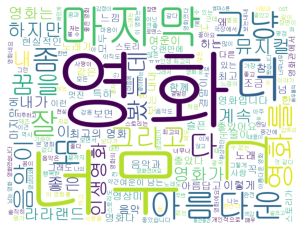

In [54]:
wd = WordCloud(
    font_path='C:/Windows/Fonts/gulim.ttc',
    background_color='white',
    width=800,
    height=600,
    stopwords=stopwords
    ).generate(text)

plt.imshow(wd)
# 좌표축 수치 표시 제거
plt.axis('off')

## 추출한 명사로 워드클라우드 그리기

In [52]:
# 불용어 처리
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add('정말')
stopwords.add('다시')
stopwords.add('보고')
stopwords.add('부분')
stopwords.add('진짜')

(-0.5, 799.5, 599.5, -0.5)

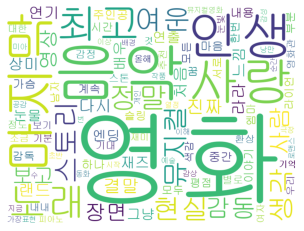

In [50]:
noun_list = count.most_common(100)

wd = WordCloud(
    font_path='C:/Windows/Fonts/gulim.ttc',
    background_color='white',
    width=800,
    height=600
    # generate_from_frequencies : 단어의 빈도수를 이용하여 워드클라우드 생성
    ).generate_from_frequencies(dict(noun_list))

# 워드클라우드 이미지로 저장
wd.to_file('라라랜드_워드클라우드.png')
plt.imshow(wd)
# 좌표축 수치 표시 제거
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

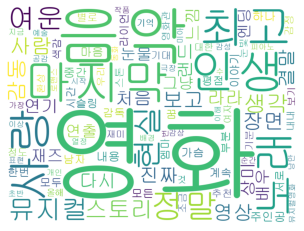

In [53]:
noun_list = count.most_common(100)

# 불용어 적용
wd = WordCloud(
    font_path='C:/Windows/Fonts/gulim.ttc',
    background_color='white',
    width=800,
    height=600,
    stopwords=stopwords
    # generate_from_frequencies : 단어의 빈도수를 이용하여 워드클라우드 생성
    ).generate_from_frequencies(dict(noun_list))

# 워드클라우드 이미지로 저장
wd.to_file('라라랜드_워드클라우드.png')
plt.imshow(wd)
# 좌표축 수치 표시 제거
plt.axis('off')

## 워드클라우드 마스크 이미지 적용

(-0.5, 499.5, 499.5, -0.5)

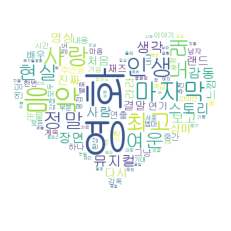

In [57]:
import numpy as np
from PIL import Image

heart_mask = np.array(Image.open('heart.jpg'))

noun_list = count.most_common(100)

# 불용어 적용
wd = WordCloud(
    font_path='C:/Windows/Fonts/gulim.ttc',
    background_color='white',
    width=800,
    height=600,
    mask=heart_mask
    # generate_from_frequencies : 단어의 빈도수를 이용하여 워드클라우드 생성
    ).generate_from_frequencies(dict(noun_list))

# 워드클라우드 이미지로 저장
wd.to_file('라라랜드_워드클라우드.png')
plt.imshow(wd)
# 좌표축 수치 표시 제거
plt.axis('off')

## 워드클라우드 색 적용

In [58]:
# 팔레트 모듈 설치
!pip install palettable

In [76]:
from palettable.colorbrewer.qualitative import Dark2_8
from palettable.colorbrewer.qualitative import Paired_4
import random

def color_func(**kwargs):
    return tuple(Paired_4.colors[random.randint(0,3)])

In [74]:
color_list = [
    [255, 201, 104], [210, 10, 200], [201, 50, 10]
]

def color_func1(**kwargs):
    return tuple(color_list[random.randint(0,2)])

(-0.5, 499.5, 499.5, -0.5)

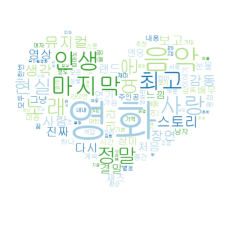

In [77]:
noun_list = count.most_common(100)

# 불용어 적용
wd = WordCloud(
    font_path='C:/Windows/Fonts/gulim.ttc',
    background_color='white',
    width=800,
    height=600,
    mask=heart_mask
    # generate_from_frequencies : 단어의 빈도수를 이용하여 워드클라우드 생성
    ).generate_from_frequencies(dict(noun_list))

# 워드클라우드 색 적용하기
wd.recolor(color_func=color_func)
plt.imshow(wd)
# 좌표축 수치 표시 제거
plt.axis('off')